<a href="https://colab.research.google.com/github/UserJunC/Privacy-Preserving-Machine-Learning-with-Homomorphic-Encryption-for-Diabetes-Mellitus-Detection/blob/main/Homomorphic%20Encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#Load data

In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/JC dataset/diabetes.csv')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

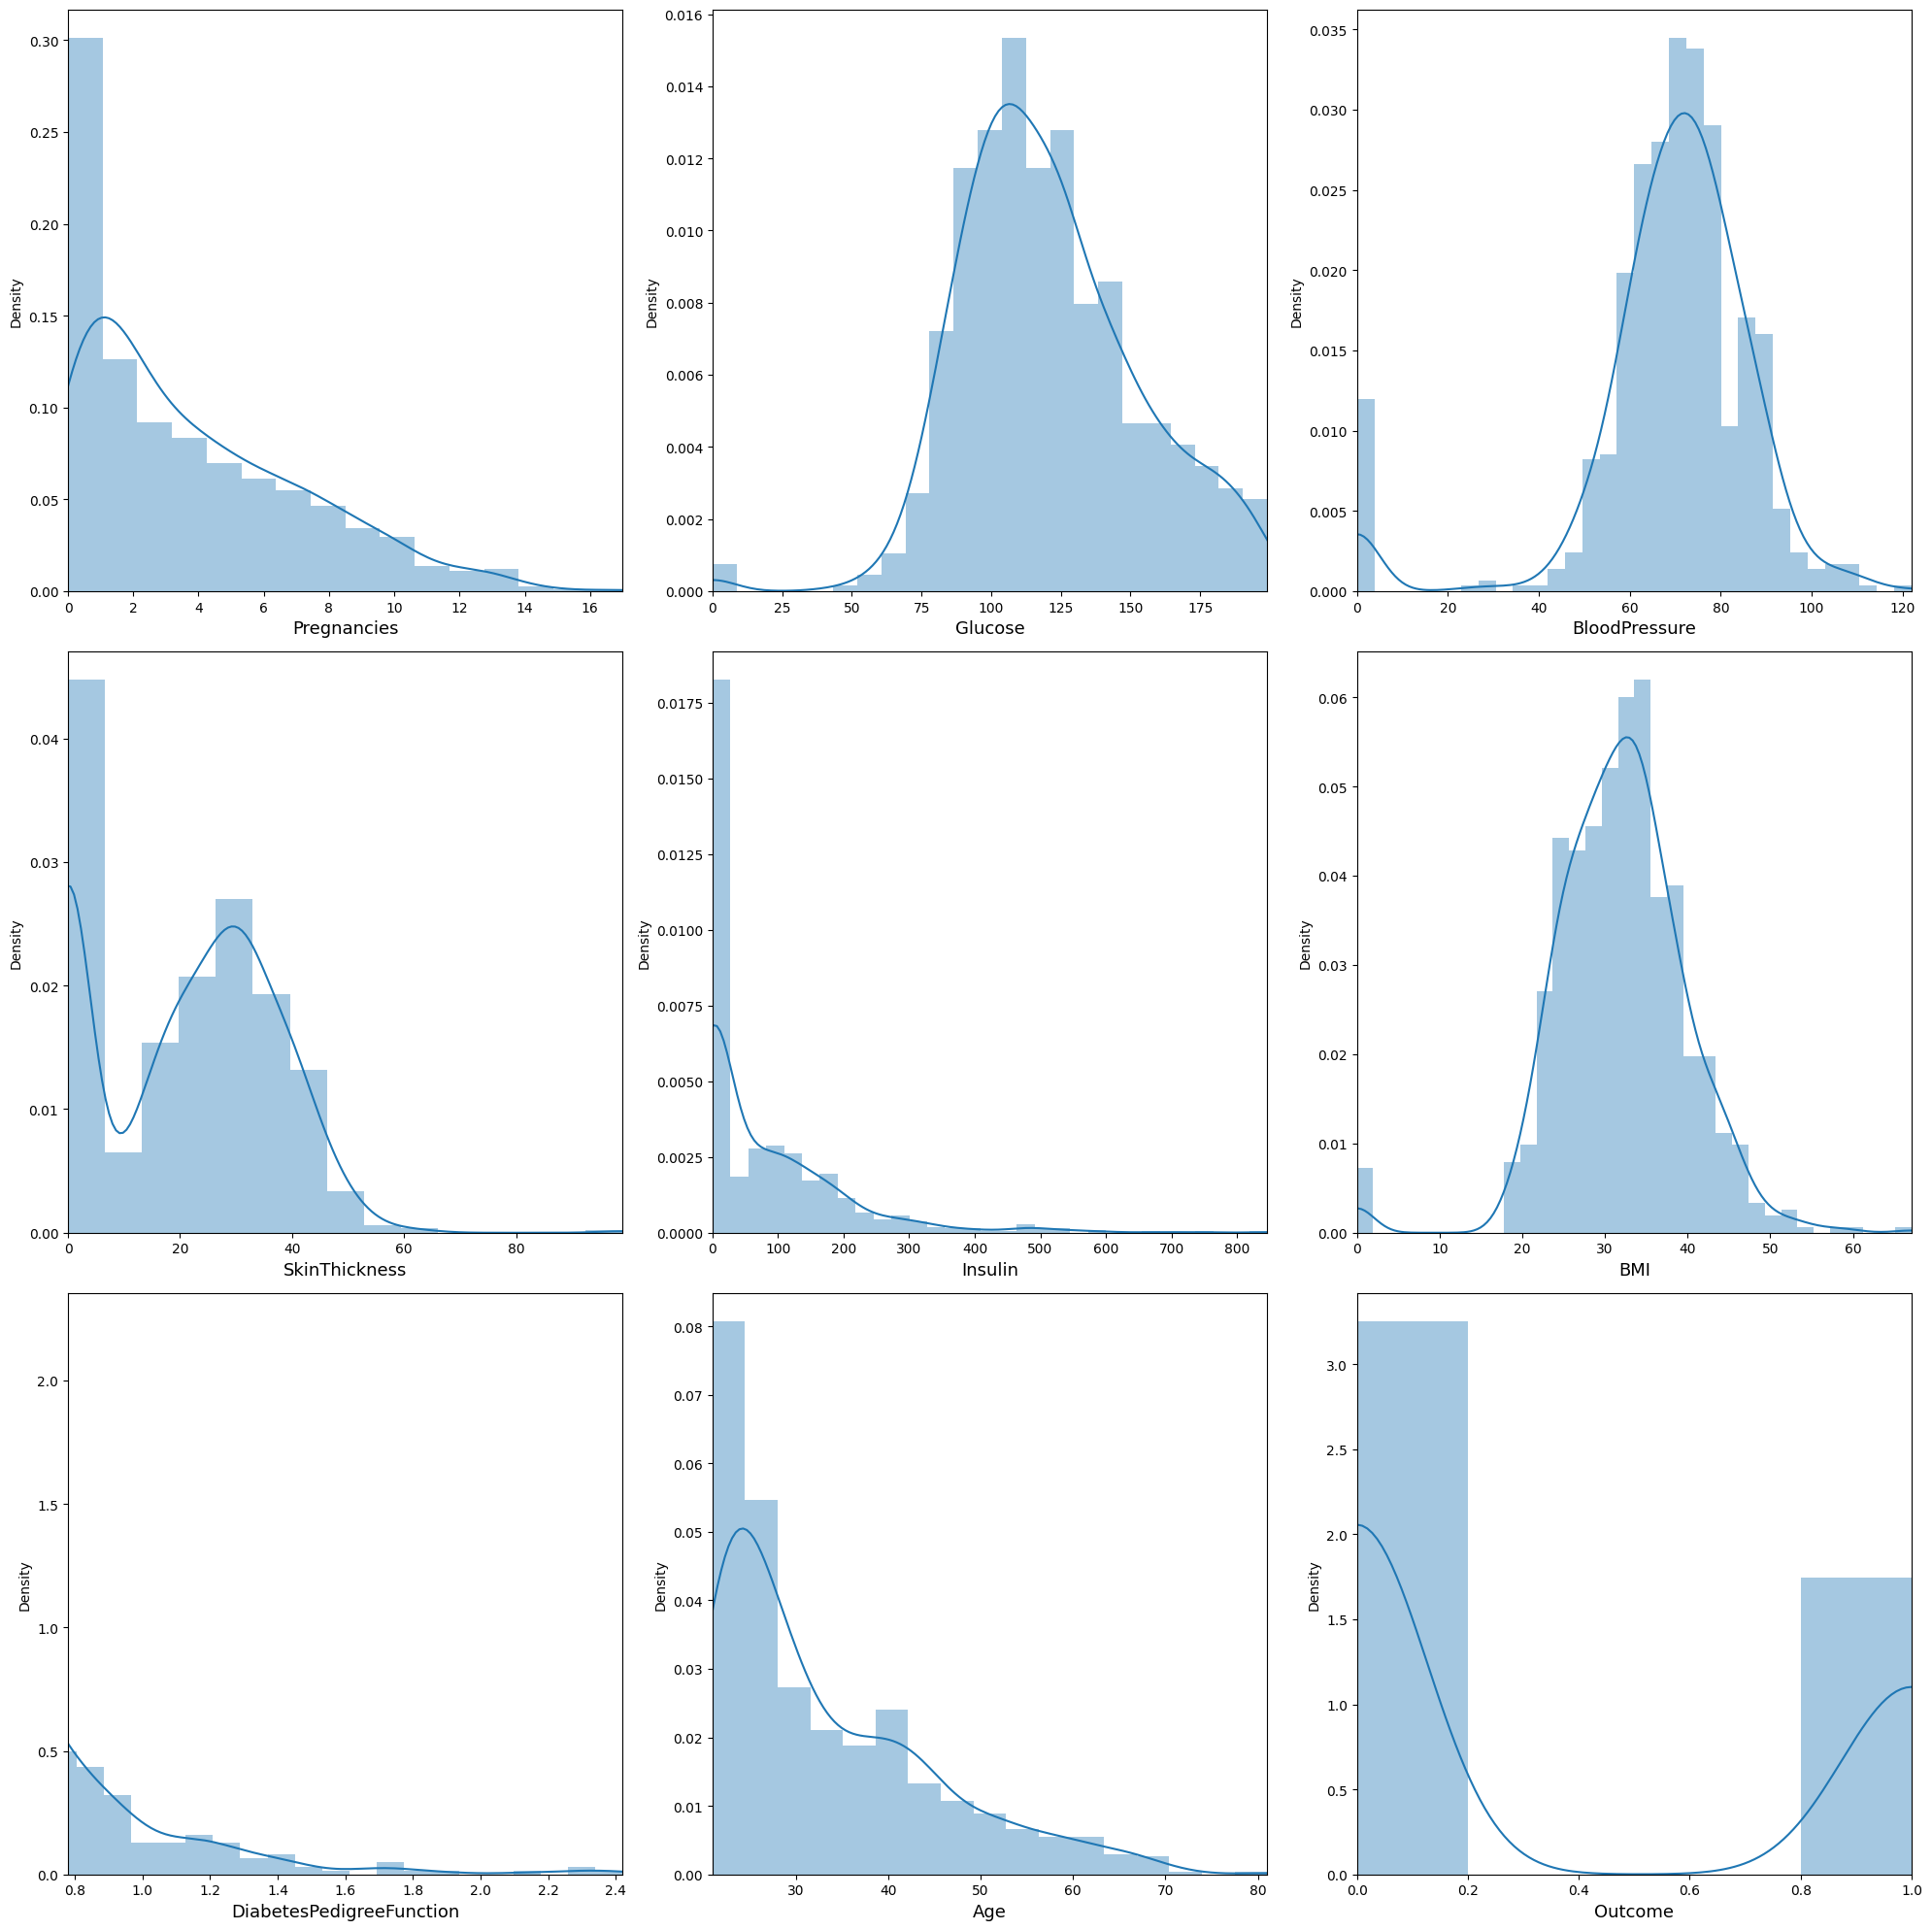

In [ ]:
plt.figure(figsize = (20, 20))
num_columns = len(data.columns)
num_plots = min(num_columns, 9)

axes_limits = {
    'Pregnancies': (0, 17),
    'Glucose': (0, 199),
    'BloodPressure': (0, 122),
    'SkinThickness': (0, 99),
    'Insulin': (0, 846),
    'BMI': (0, 67.1),
    'DiabetesPedigreeFunction': (0.78, 2.42),
    'Age': (21,81),
    'Outcome': (0, 1)
}

plotnumber = 1
for column in data.columns:
  if plotnumber <= num_plots:
    ax = plt.subplot(3, 3, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 13)
    ax.set_xlim(axes_limits[column])
    plotnumber += 1

plt.tight_layout()
plt.show()

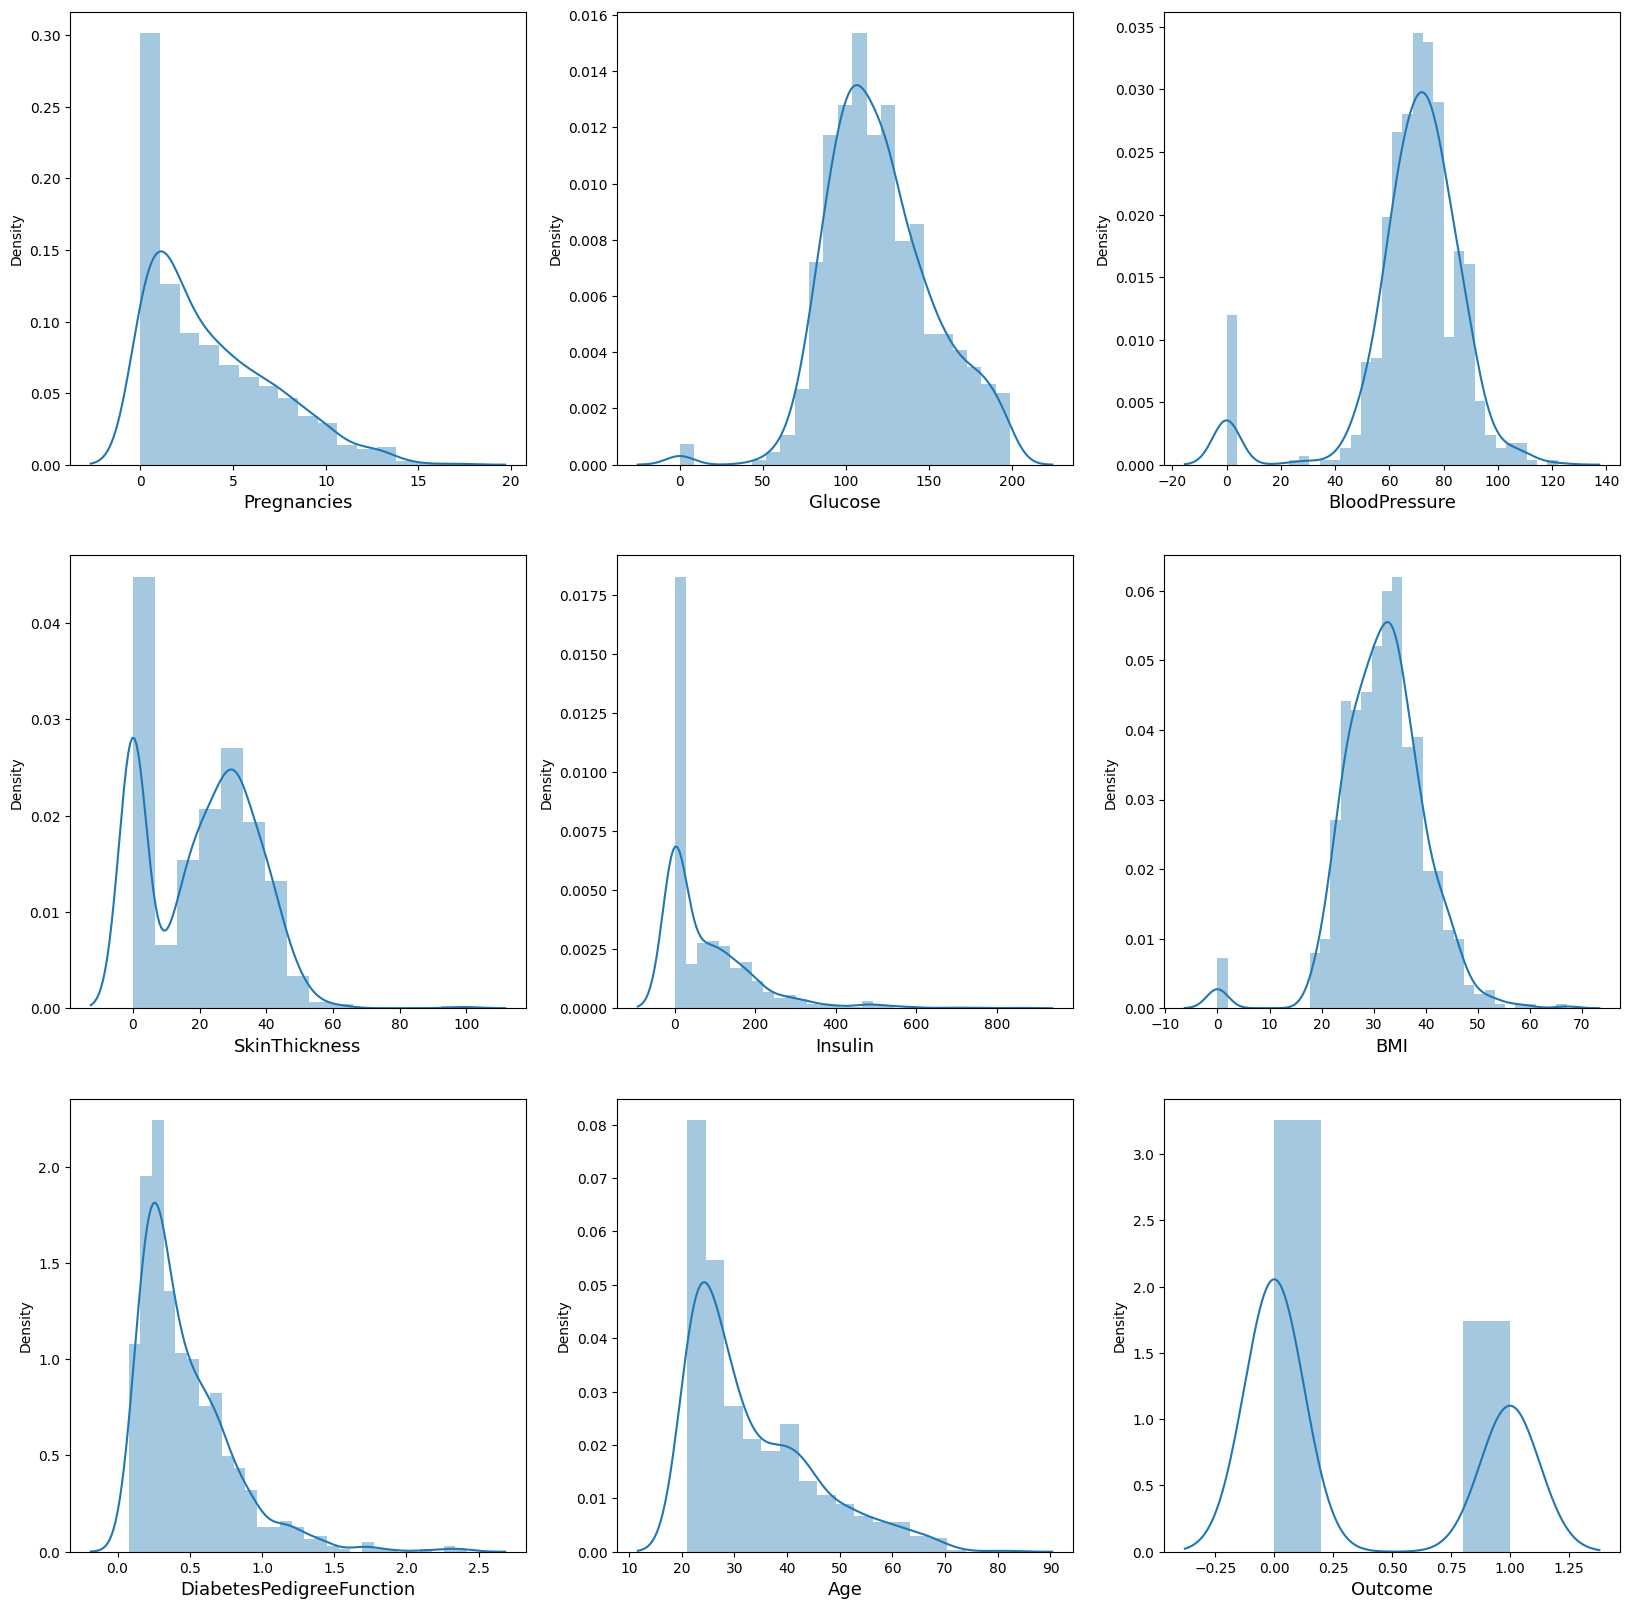

In [ ]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in data:
  if plotnumber <= 9:
    ax = plt.subplot(3, 3, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 13)

  plotnumber += 1
plt.show()

#Preprocessing Data

In [ ]:
data ['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data ['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data ['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data ['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

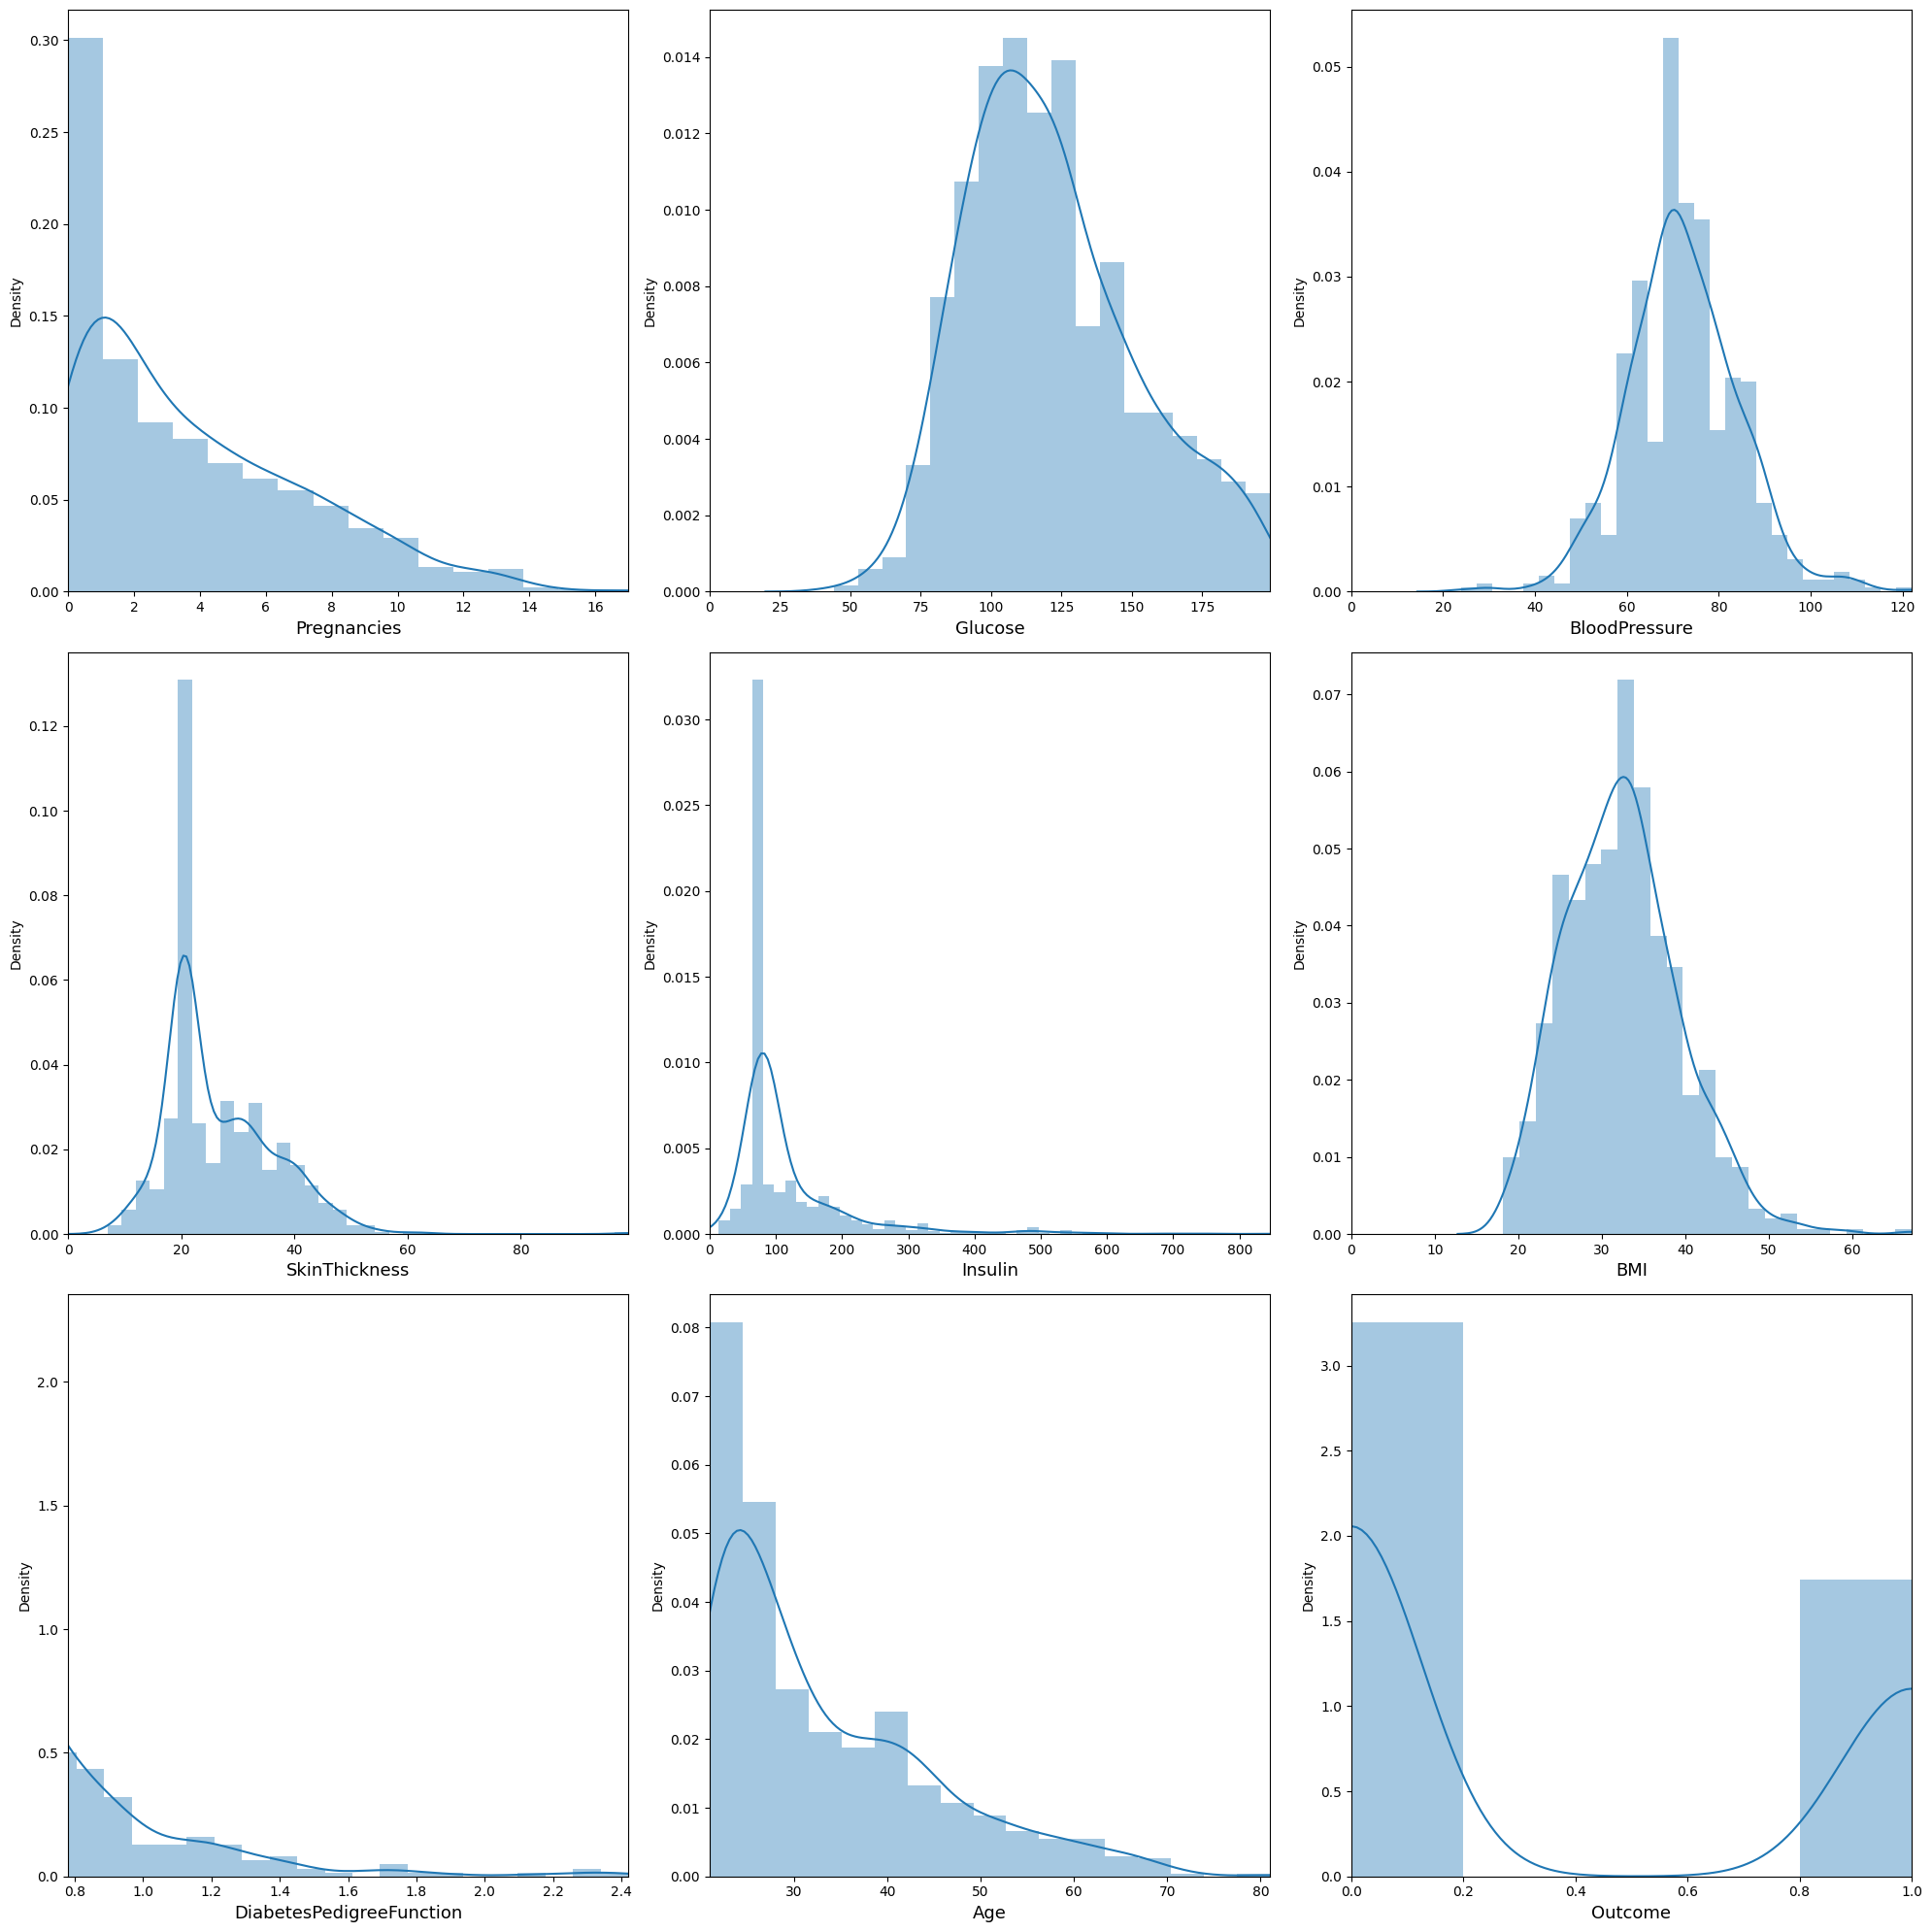

In [ ]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in data.columns:
  if plotnumber <= num_plots:
    ax = plt.subplot(3, 3, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 13)
    ax.set_xlim(axes_limits[column])
    plotnumber += 1

plt.tight_layout()
plt.show()

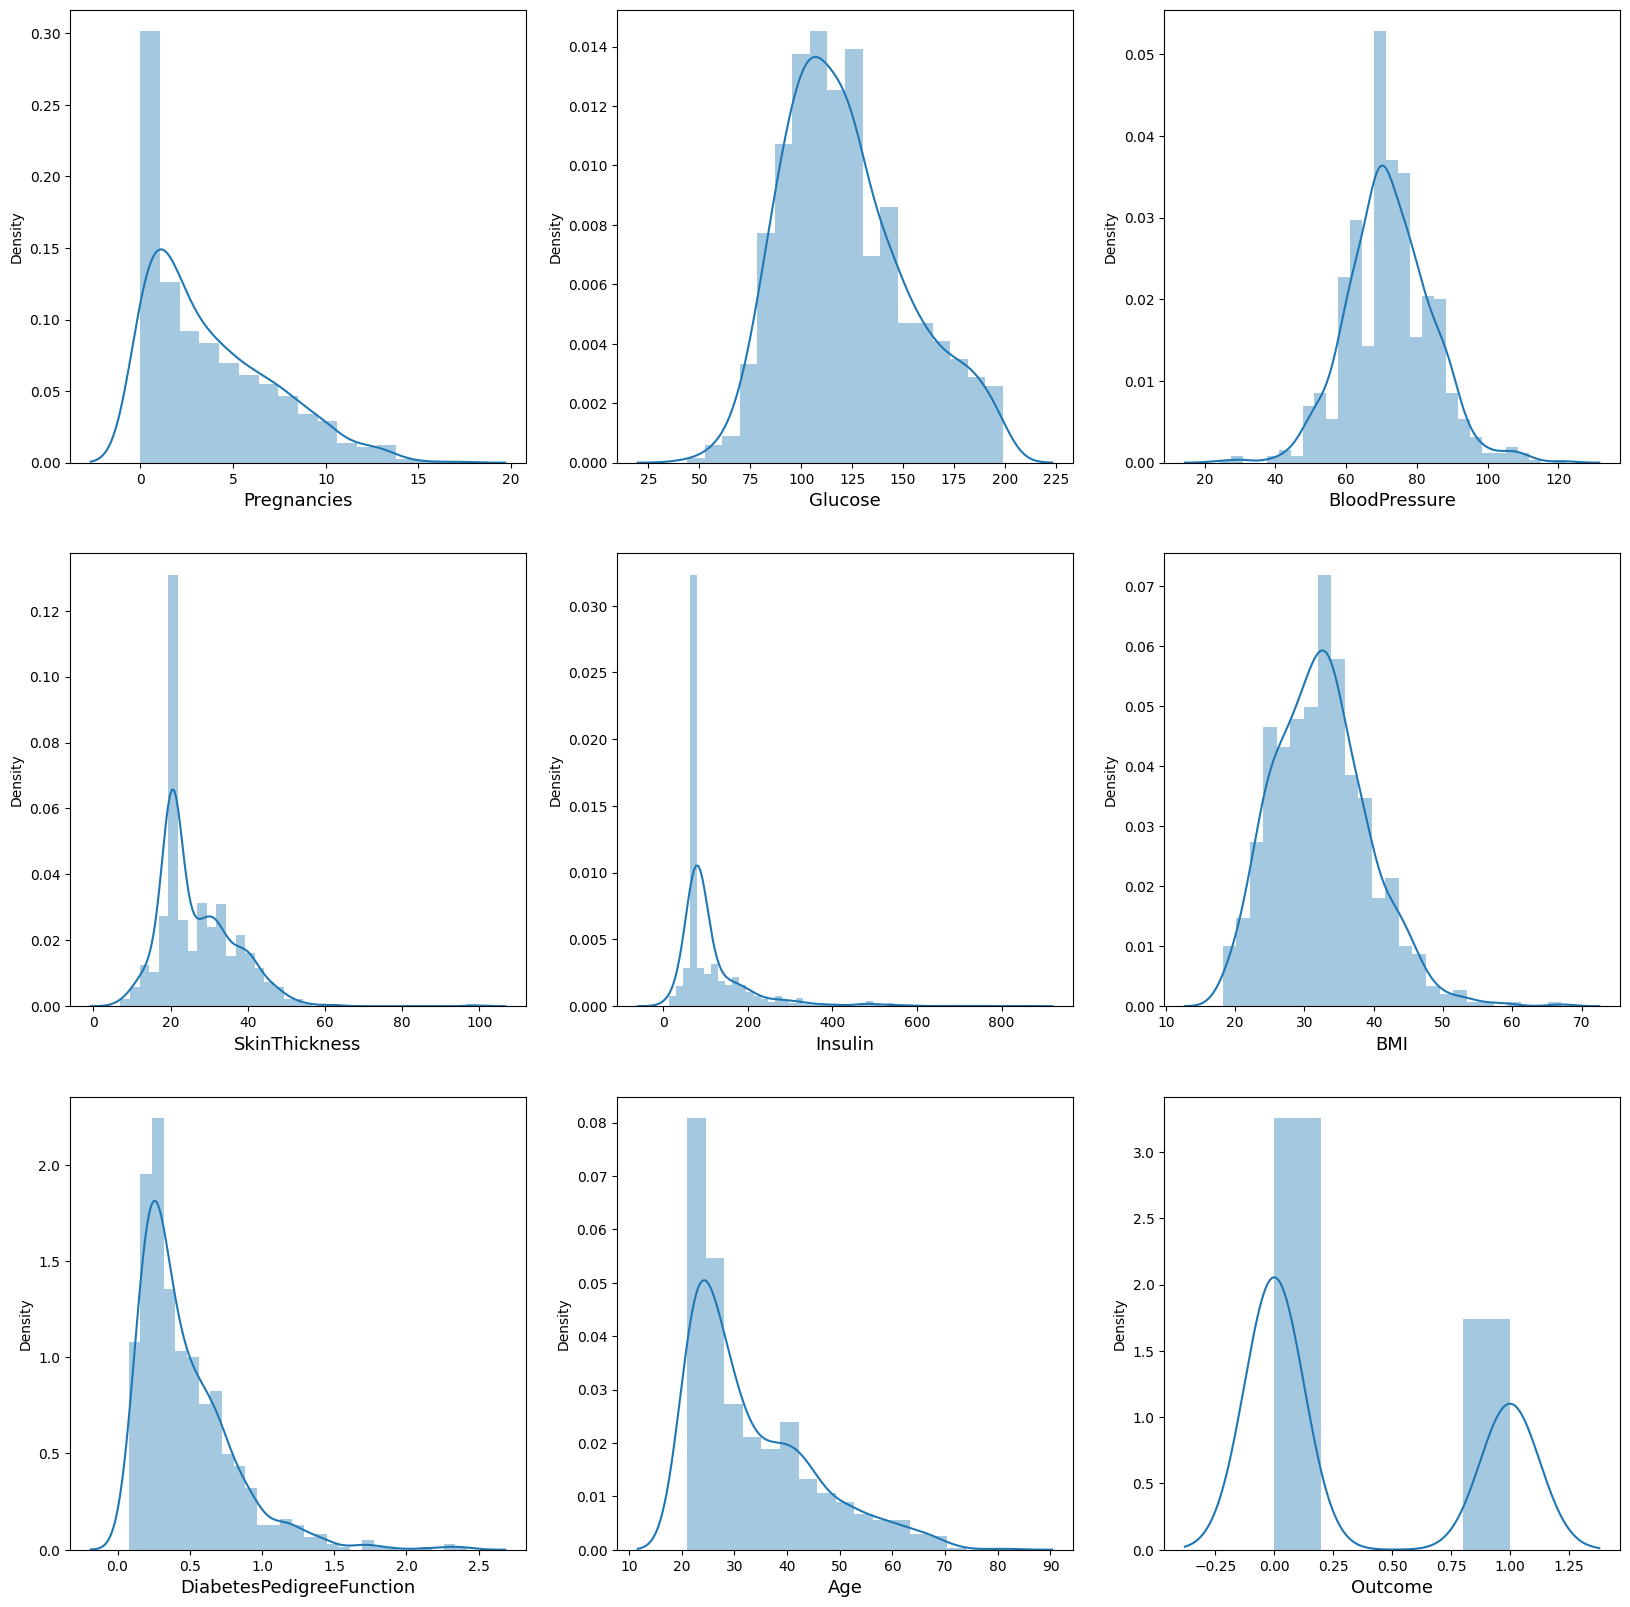

In [ ]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in data:
  if plotnumber <= 9:
    ax = plt.subplot(3, 3, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 13)

  plotnumber += 1
plt.show()

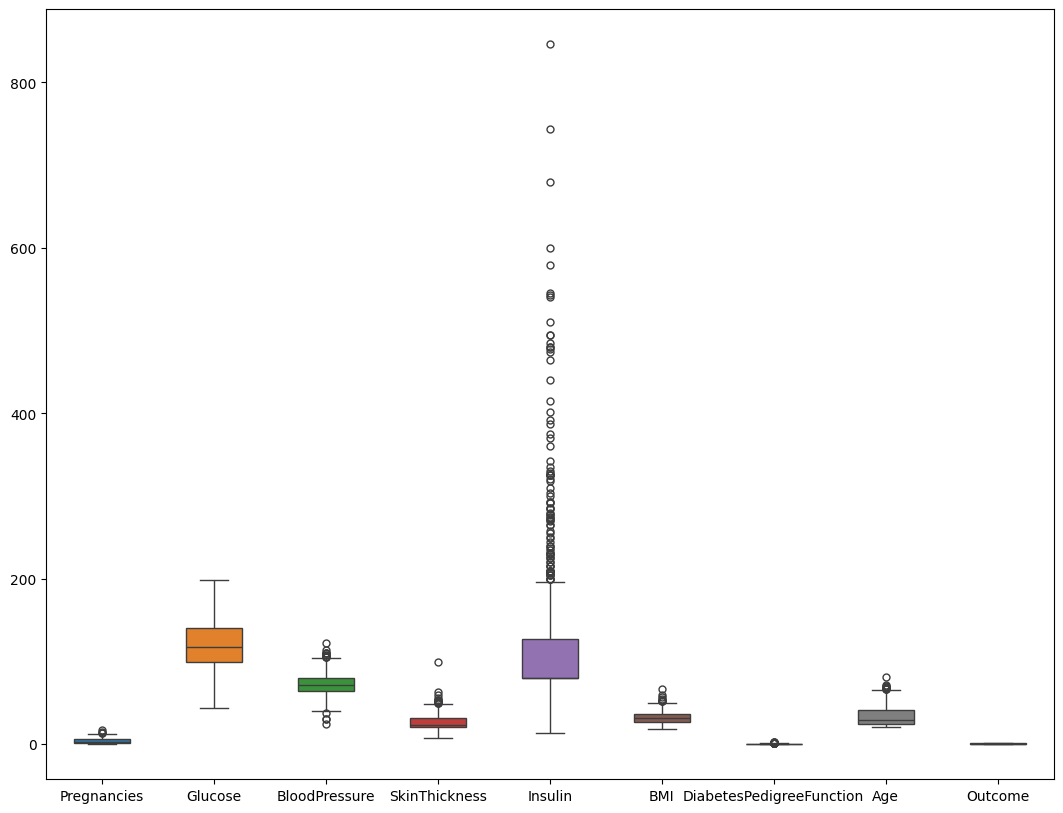

In [ ]:
fig, ax = plt.subplots(figsize = (13, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 5)
plt.show()

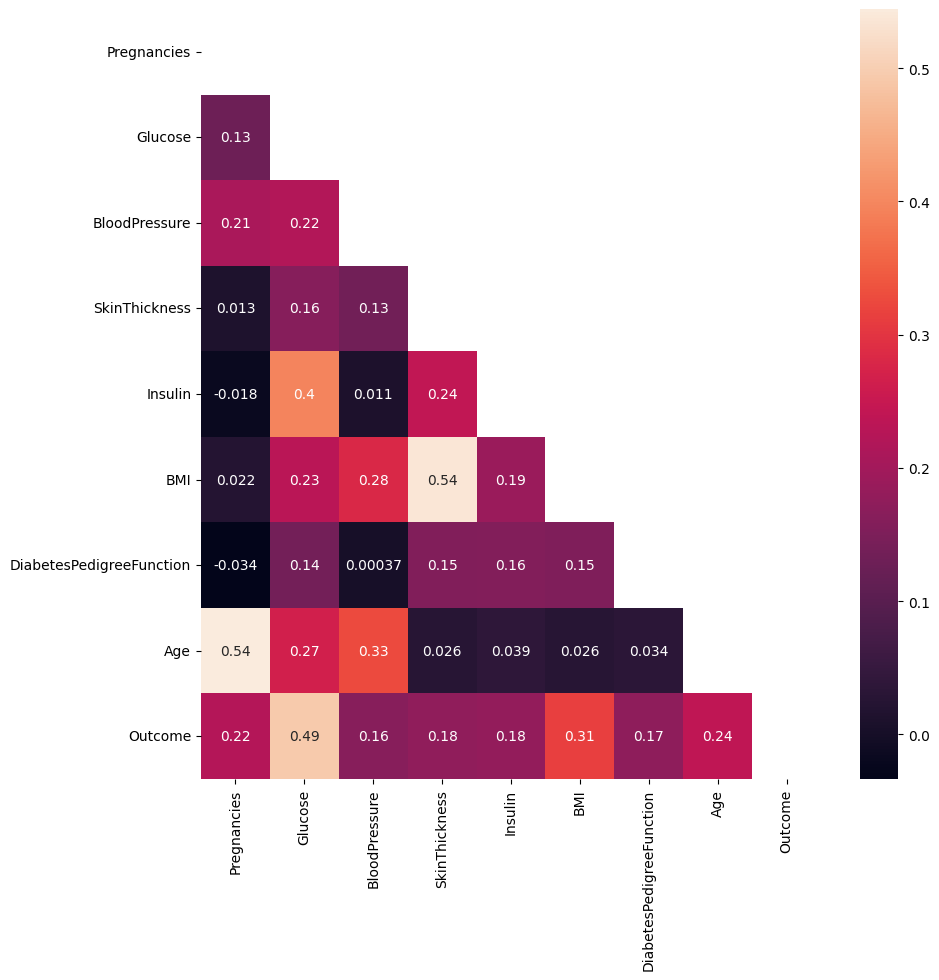

In [ ]:
import numpy as np
plt.figure (figsize = (10, 10))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True)
plt.show()

In [ ]:
outlier = data['Pregnancies'].quantile(0.98)
data = data[data['Pregnancies']<outlier]

outlier = data['SkinThickness'].quantile(0.99)
data = data[data['SkinThickness']<outlier]

outlier = data['Insulin'].quantile(0.95)
data = data[data['Insulin']<outlier]

outlier = data['BMI'].quantile(0.99)
data = data[data['BMI']<outlier]

outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
data = data[data['Age']<outlier]

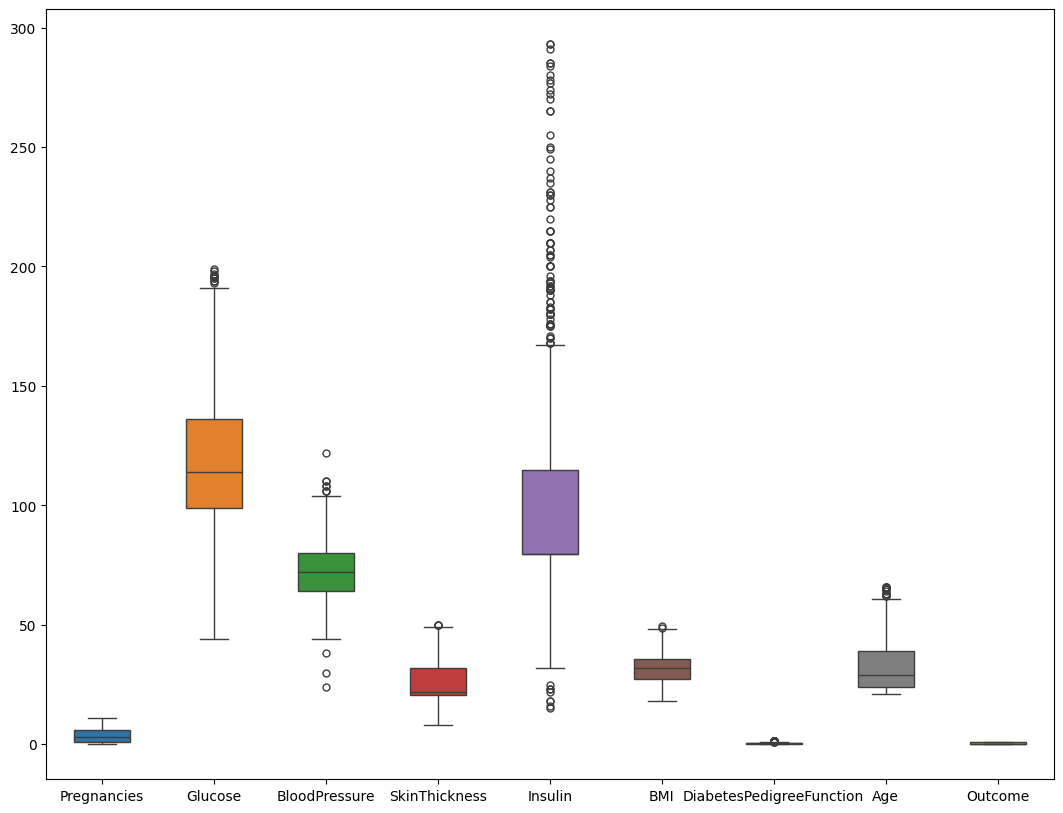

In [ ]:
fig, ax = plt.subplots(figsize = (13, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 5)
plt.show()

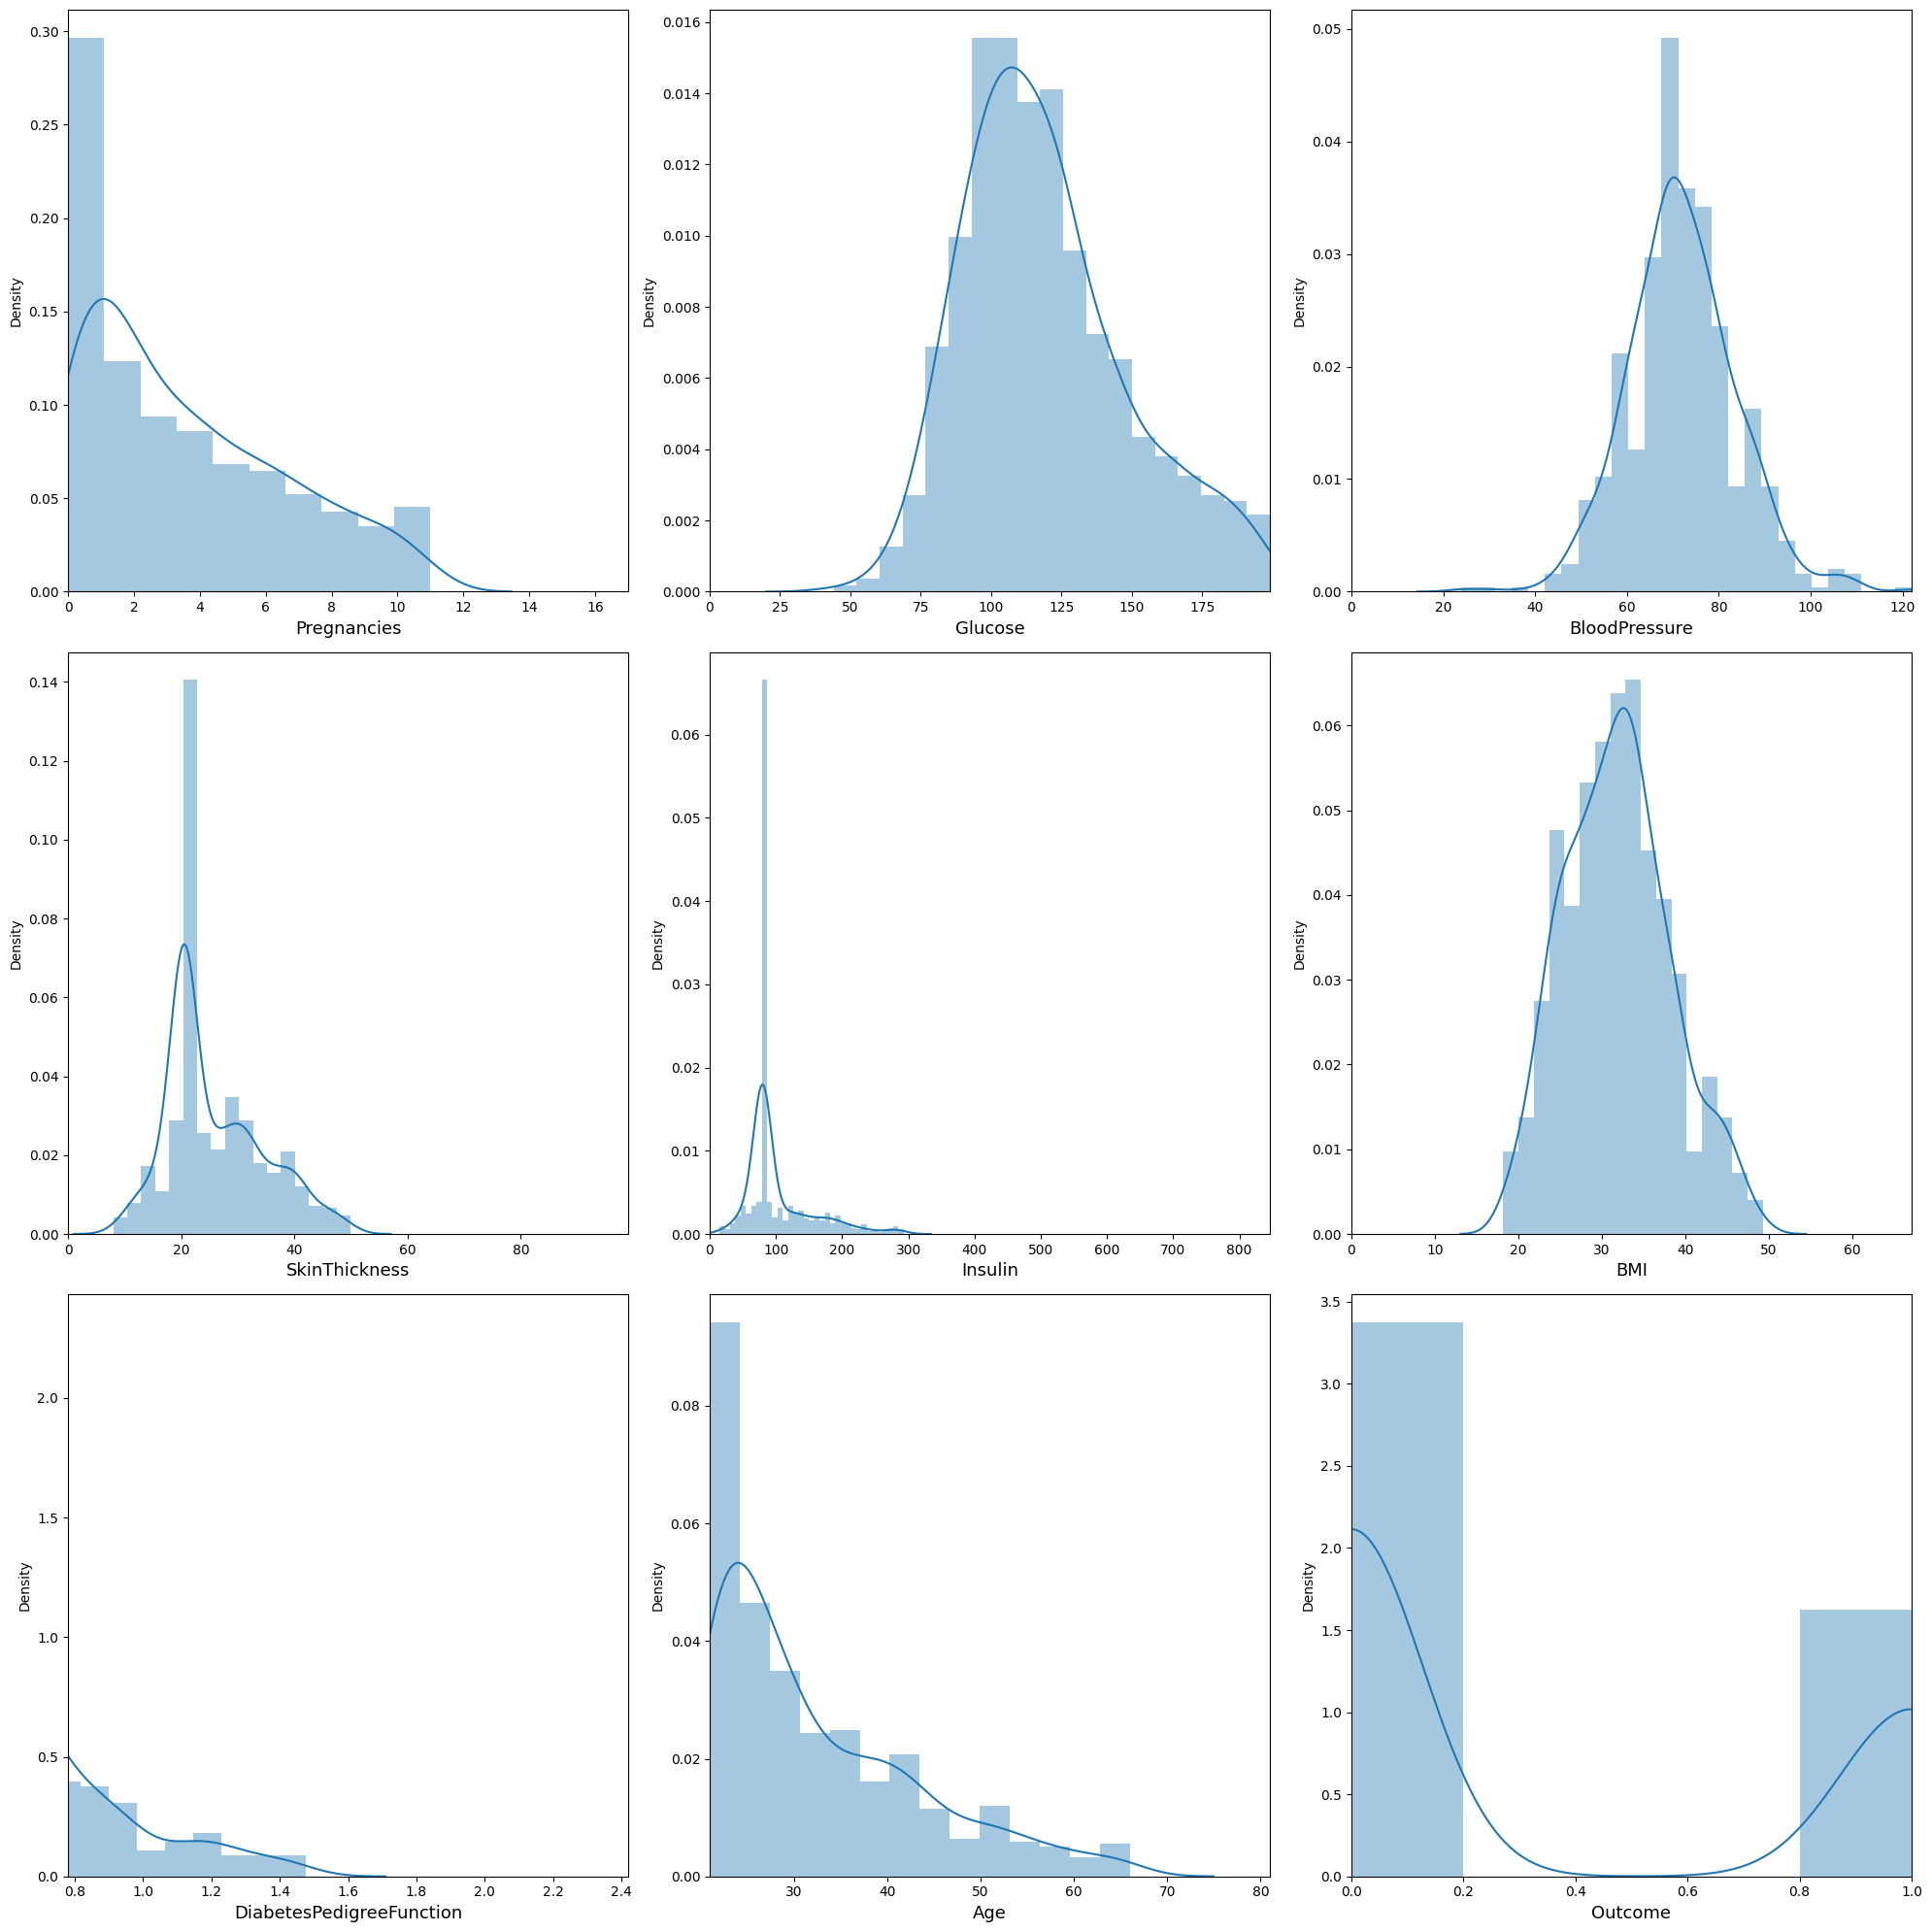

In [ ]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in data.columns:
  if plotnumber <= num_plots:
    ax = plt.subplot(3, 3, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 13)
    ax.set_xlim(axes_limits[column])
    plotnumber += 1

plt.tight_layout()
plt.show()

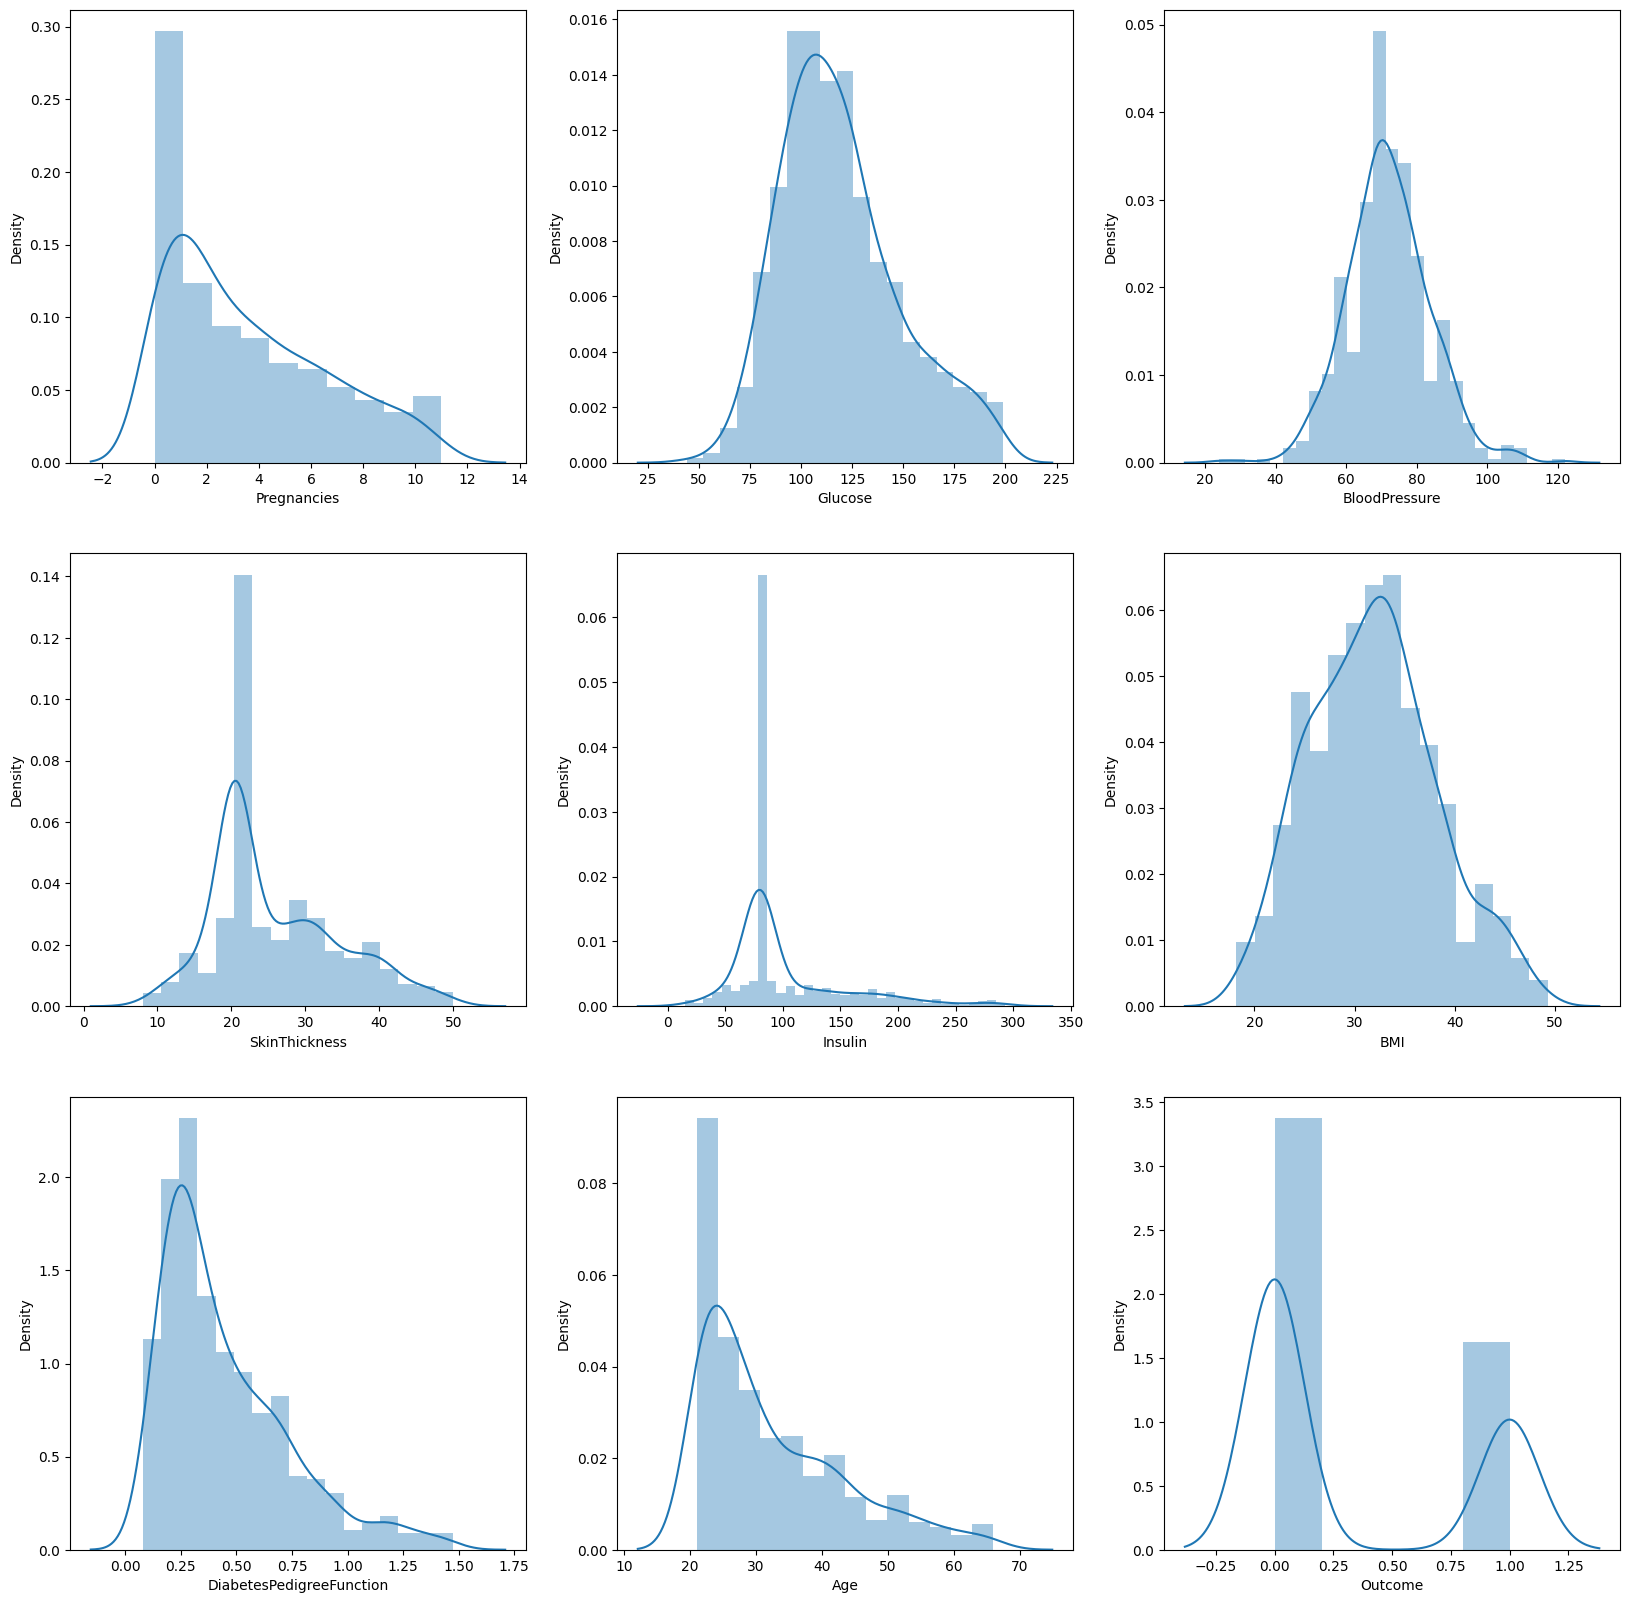

In [ ]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in data:
  if plotnumber <= 9:
    ax = plt.subplot(3, 3, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 10)

  plotnumber += 1
plt.show()

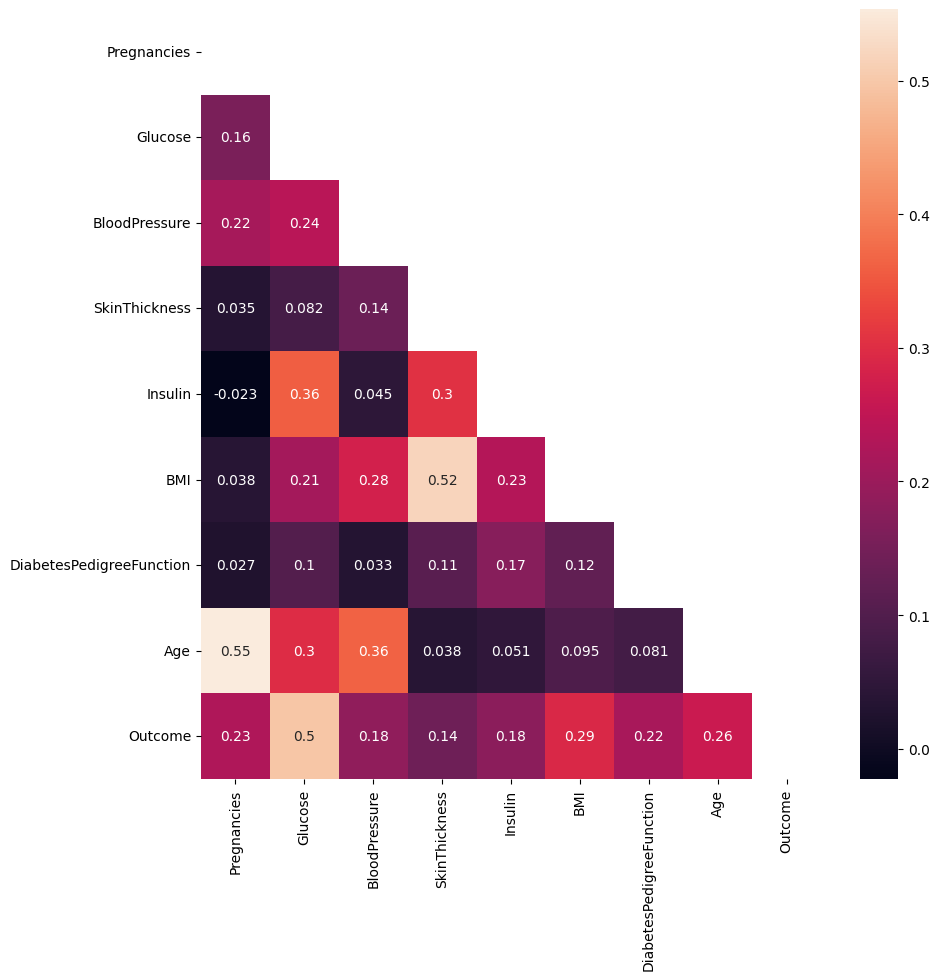

In [ ]:
plt.figure (figsize = (10, 10))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True)
plt.show()

#Sampling

In [ ]:
class_count_0, class_count_1 = data['Outcome'].value_counts()

In [ ]:
class_0 = data[data['Outcome'] == 0]
class_1 = data[data['Outcome'] == 1]
print('Class 0', class_0.shape)
print('Class 1', class_1.shape)

Class 0 (457, 9)
Class 1 (220, 9)


##Random Over-Sampling

- might cause overfitting and poor generalization to test set

Total class of 0 and 1: Outcome
1    457
0    457
Name: count, dtype: int64


<Axes: title={'center': 'count(target)'}, xlabel='Outcome'>

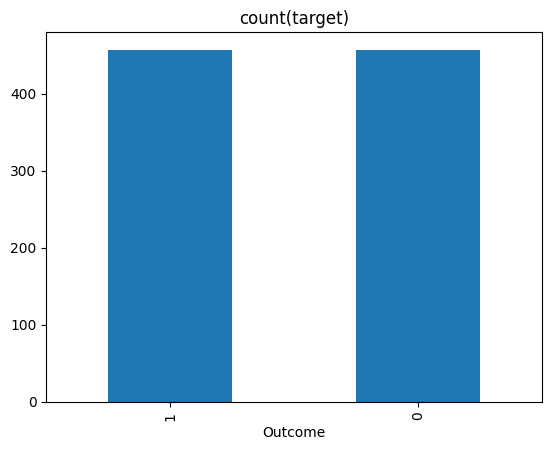

In [ ]:
class_1_over = class_1.sample(class_count_0, replace = True)

test_over = pd.concat([class_1_over, class_0], axis = 0)

print('Total class of 0 and 1:', test_over['Outcome'].value_counts())
test_over['Outcome'].value_counts().plot(kind = 'bar', title = 'count(target)')

##Random Under Samping with Imblearn

In [ ]:
import imblearn
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [ ]:
len(X), len(y)

(677, 677)

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42, replacement = True)
X_rus, y_rus = rus.fit_resample(X, y)

print(f'Original dataset shape: {Counter(y)}')
print(f'Resample dataset shape: {Counter(y_rus)}')

Original dataset shape: Counter({0: 457, 1: 220})
Resample dataset shape: Counter({0: 220, 1: 220})


##Random Over Sampling with Imblearn

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = rus.fit_resample(X, y)

print(f'Original dataset shape: {Counter(y)}')
print(f'Resample dataset shape: {Counter(y_ros)}')

Original dataset shape: Counter({0: 457, 1: 220})
Resample dataset shape: Counter({0: 220, 1: 220})


##Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = 'majority')
X_tl, y_tl = tl.fit_resample(X, y)

print(f'Original dataset shape: {Counter(y)}')
print(f'Resample dataset shape: {Counter(y_tl)}')

Original dataset shape: Counter({0: 457, 1: 220})
Resample dataset shape: Counter({0: 414, 1: 220})


##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print(f'Original dataset shape: {Counter(y)}')
print(f'Resample dataset shape: {Counter(y_smote)}')

Original dataset shape: Counter({0: 457, 1: 220})
Resample dataset shape: Counter({1: 457, 0: 457})


##Near Miss

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y)

print(f'Original dataset shape: {Counter(y)}')
print(f'Resample dataset shape: {Counter(y_nm)}')

Original dataset shape: Counter({0: 457, 1: 220})
Resample dataset shape: Counter({0: 220, 1: 220})


#Evaluate suitable method for resampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

!pip install scikit-plot
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_cumulative_gain, plot_lift_curve

from numpy import argmax
import numpy as np

In [ ]:
def build_and_test(X_tr, y_tr, X_te, y_te, class_weight = None, threshold = False):
  pca = PCA(n_components = 2)
  pca.fit(X_tr)
  X_pca = pca.transform(X_tr)

  plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_tr, cmap = plt.cm.prism, edgecolor = 'k', alpha = 0.7)
  plt.show()

  if class_weight:
    model = DecisionTreeClassifier(class_weight = class_weight)
  else:
    model = DecisionTreeClassifier()
  model.fit(X_tr, y_tr)

  y_pred = model.predict(X_te)
  print('Precision score %s' % precision_score(y_te, y_pred))
  print('Recall score %s' % recall_score(y_te, y_pred))
  print('F1-score score %s' % f1_score(y_te, y_pred))
  print('Accuracy score %s' % accuracy_score(y_te, y_pred))

  y_score = model.predict_proba(X_te)
  fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
  roc_auc0 = auc(fpr0, tpr0)

  best_threshold = None
  if threshold:
    J = tpr0 - fpr0
    ix = argmax(J)
    best_threshold = thresholds[ix]
    y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])

  plot_roc(y_te, y_score)
  plt.show()

  plot_precision_recall(y_te, y_score)
  plt.show()

  plot_cumulative_gain(y_te, y_score)
  plt.show()

  plot_lift_curve(y_te, y_score)
  plt.show()

  print(classification_report(y_te, y_pred))
  return roc_auc0, fpr0, tpr0, best_threshold

##Original Dataset

In [ ]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(541, 136, 541, 136)

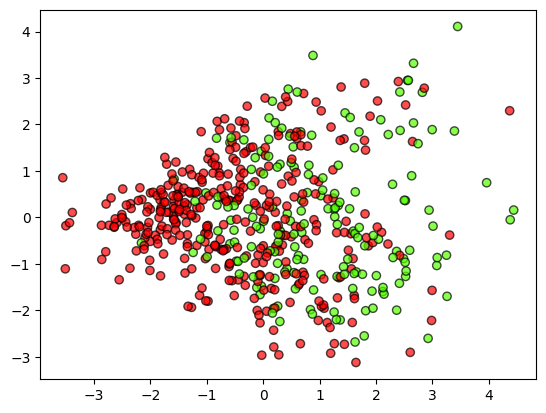

Precision score 0.509090909090909
Recall score 0.6086956521739131
F1-score score 0.5544554455445544
Accuracy score 0.6691176470588235


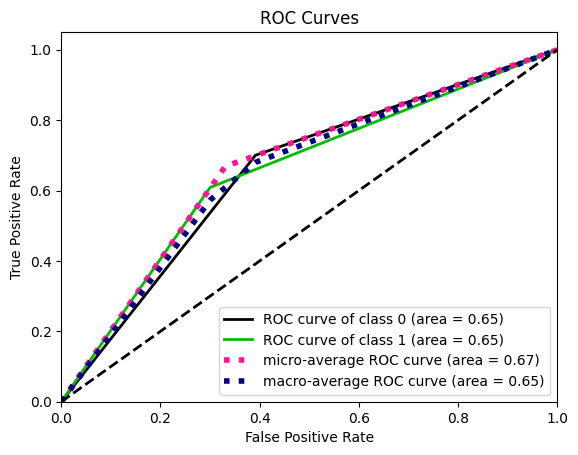

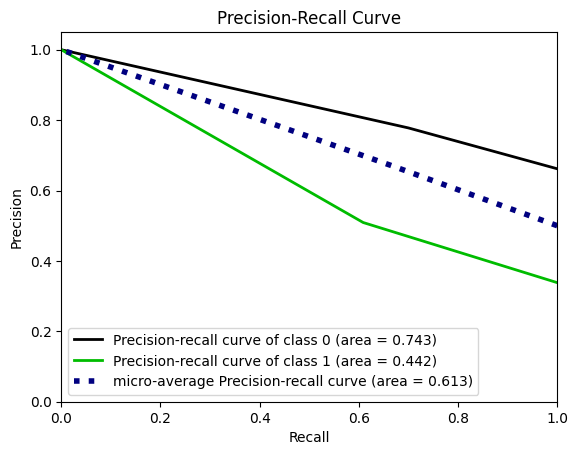

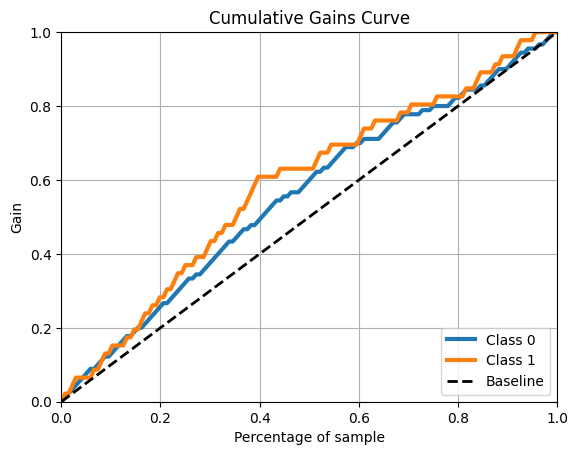

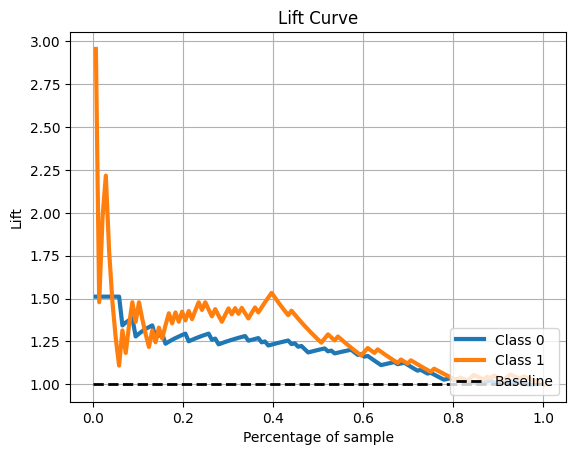

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        90
           1       0.51      0.61      0.55        46

    accuracy                           0.67       136
   macro avg       0.64      0.65      0.65       136
weighted avg       0.69      0.67      0.68       136



In [ ]:
roc_auc_imb, fpr_imb, tpr_imb, _ = build_and_test(X_train, y_train, X_test, y_test)

##Random Over Sampling

##Random Under Sampling with Imblearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(352, 88, 352, 88)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

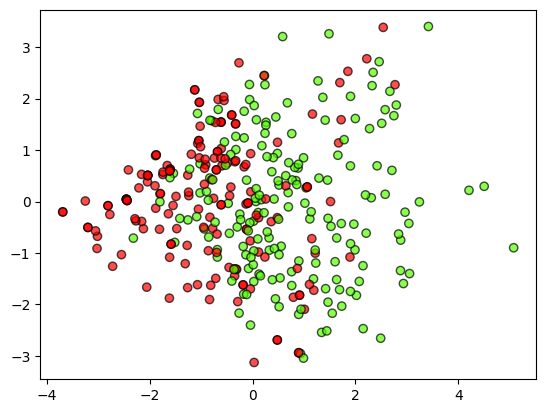

Precision score 0.7435897435897436
Recall score 0.7837837837837838
F1-score score 0.7631578947368421
Accuracy score 0.7954545454545454


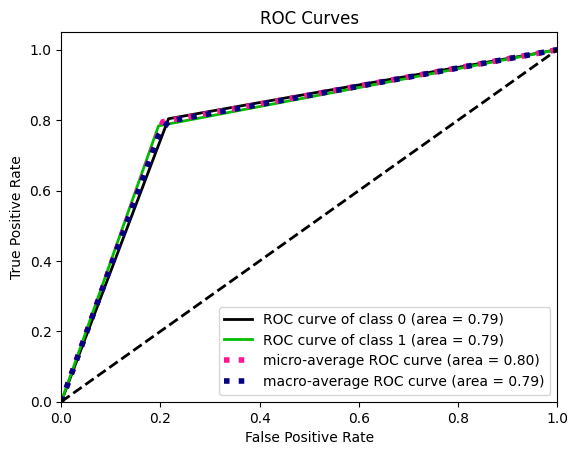

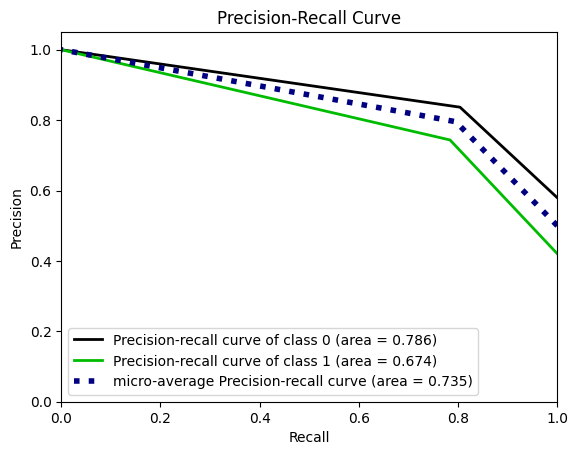

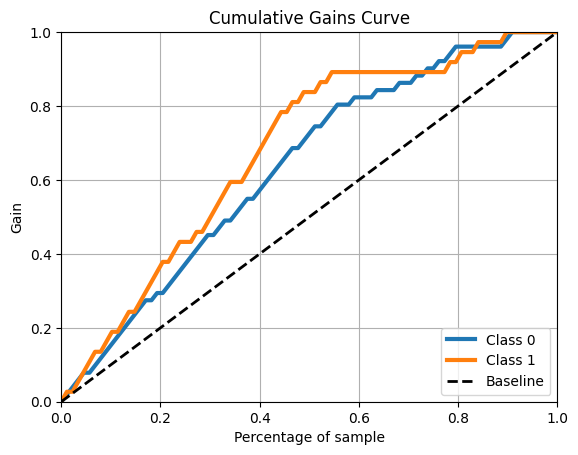

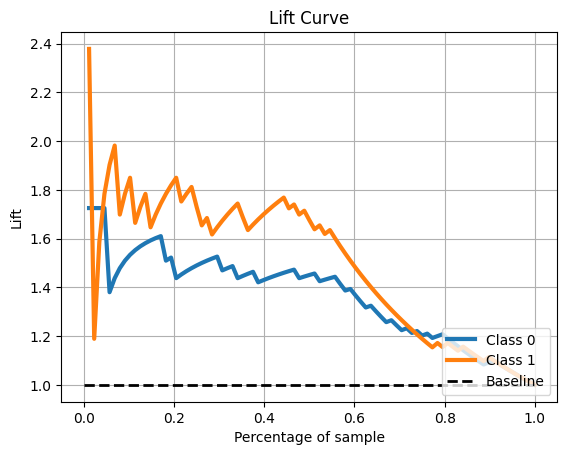

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        51
           1       0.74      0.78      0.76        37

    accuracy                           0.80        88
   macro avg       0.79      0.79      0.79        88
weighted avg       0.80      0.80      0.80        88



In [ ]:
roc_auc_rus, fpr_rus, tpr_rus, _ = build_and_test(X_train, y_train, X_test, y_test)

##Random Over Sampling with Imblearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(352, 88, 352, 88)

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

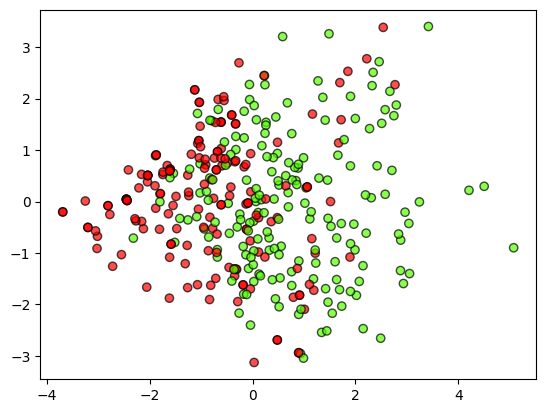

Precision score 0.7368421052631579
Recall score 0.7567567567567568
F1-score score 0.7466666666666667
Accuracy score 0.7840909090909091


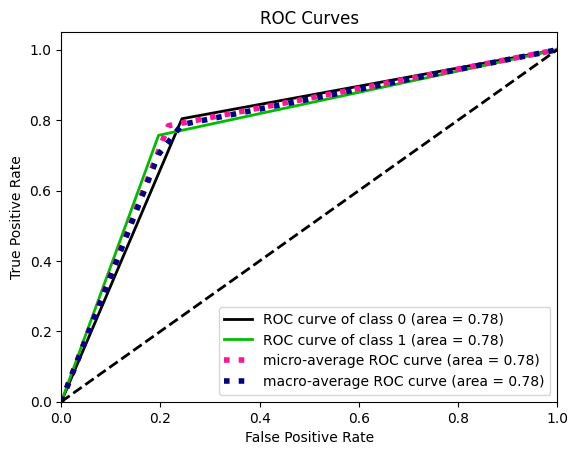

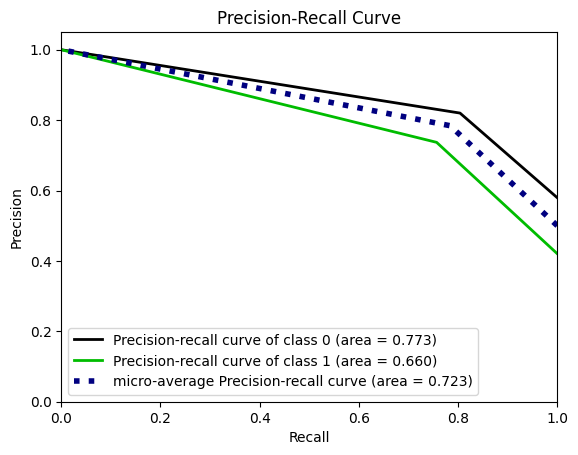

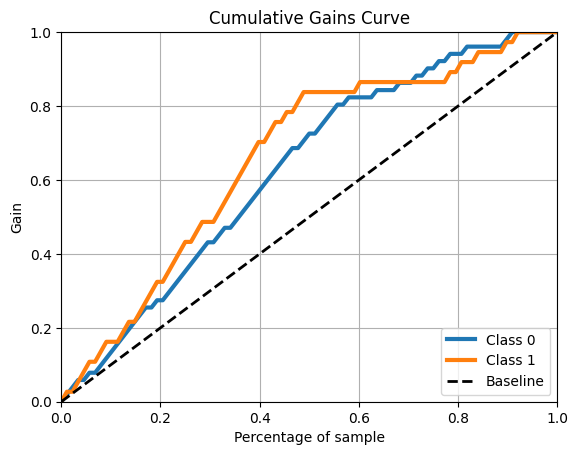

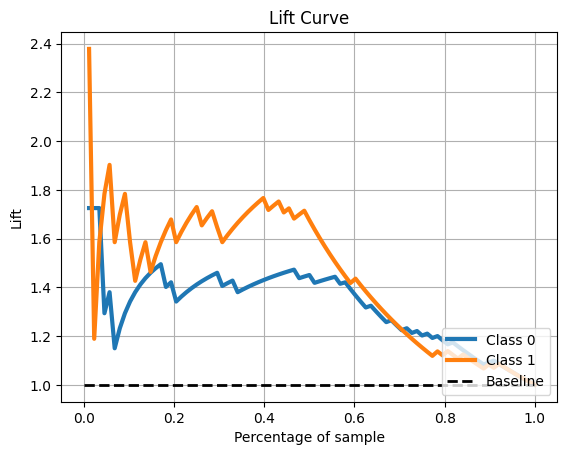

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        51
           1       0.74      0.76      0.75        37

    accuracy                           0.78        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.79      0.78      0.78        88



In [ ]:
roc_auc_ros, fpr_ros, tpr_ros, _ = build_and_test(X_train, y_train, X_test, y_test)

##Tomek Links

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(507, 127, 507, 127)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

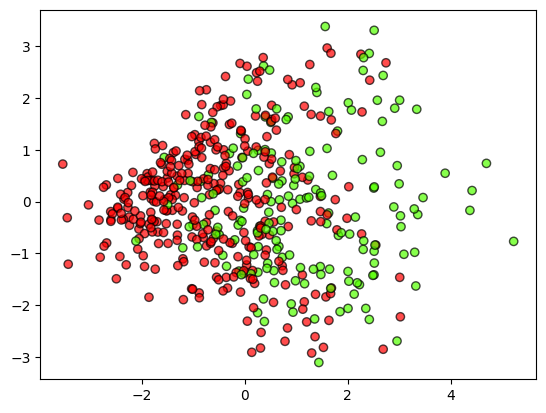

Precision score 0.6938775510204082
Recall score 0.723404255319149
F1-score score 0.7083333333333333
Accuracy score 0.7795275590551181


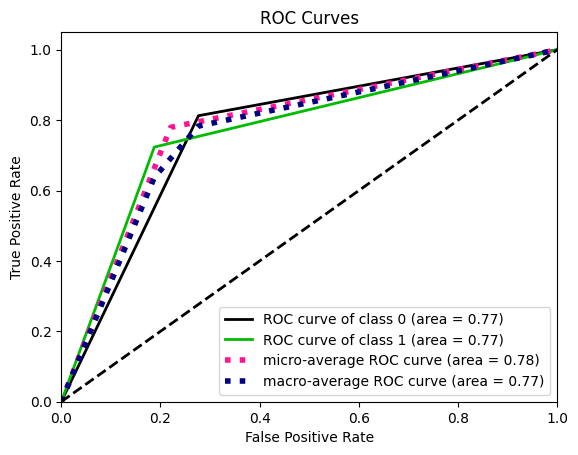

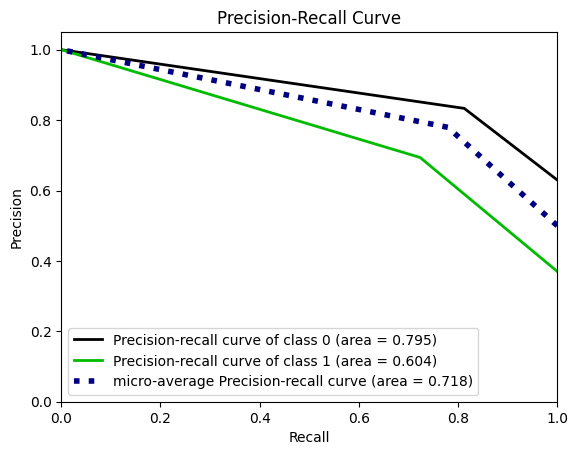

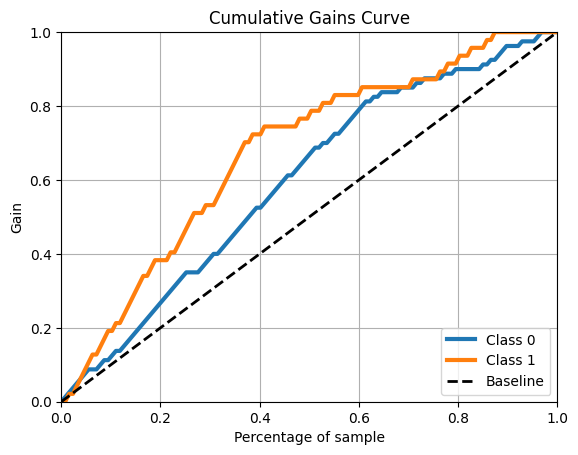

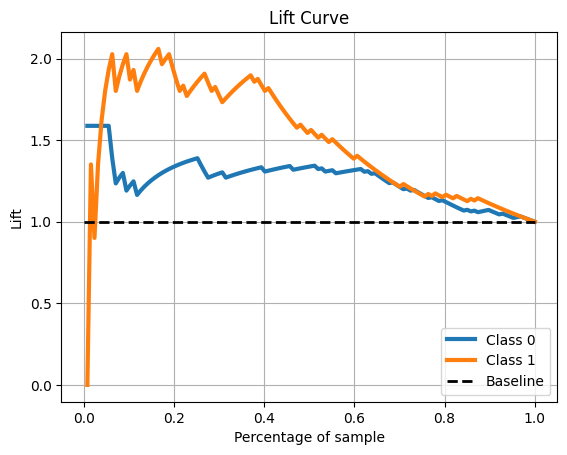

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        80
           1       0.69      0.72      0.71        47

    accuracy                           0.78       127
   macro avg       0.76      0.77      0.77       127
weighted avg       0.78      0.78      0.78       127



In [ ]:
roc_auc_tl, fpr_tl, tpr_tl, _ = build_and_test(X_train, y_train, X_test, y_test)

##SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(731, 183, 731, 183)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

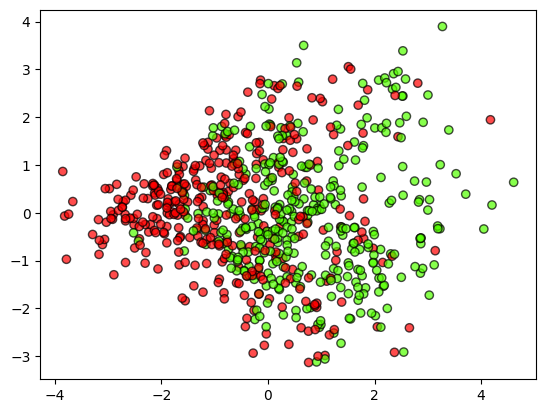

Precision score 0.7346938775510204
Recall score 0.782608695652174
F1-score score 0.7578947368421053
Accuracy score 0.7486338797814208


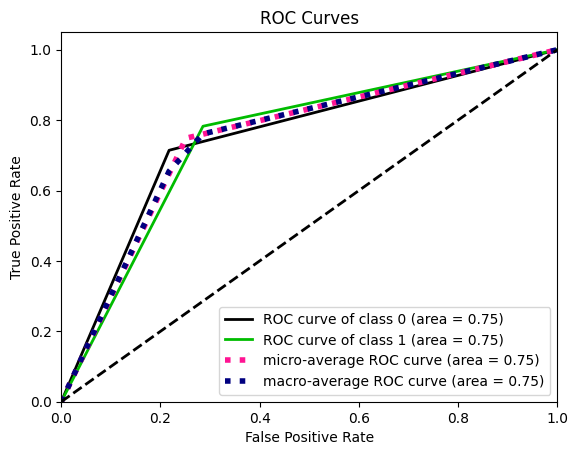

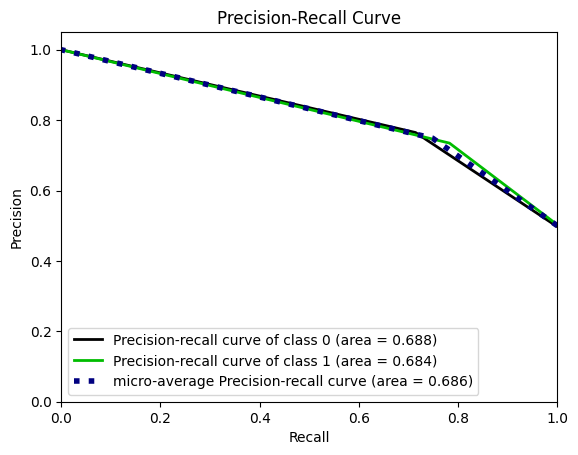

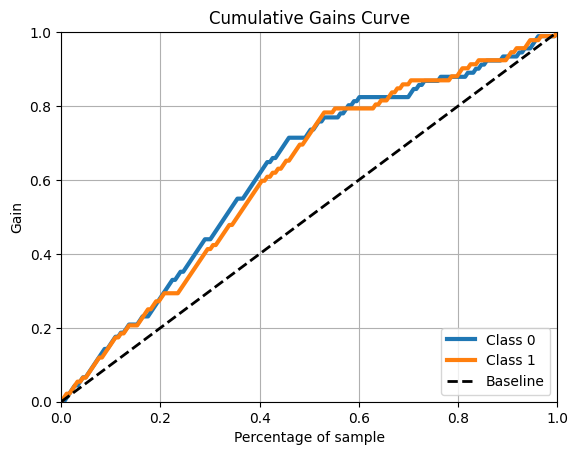

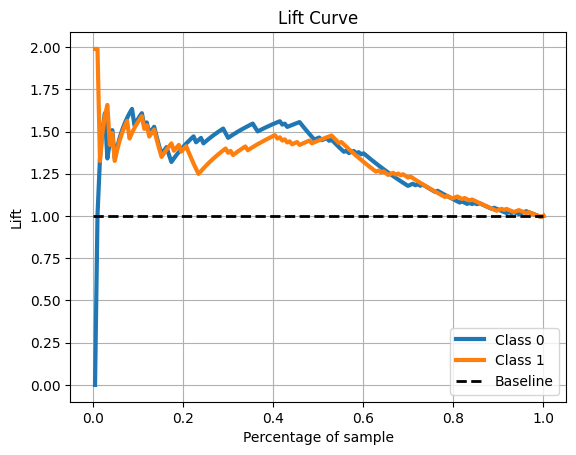

              precision    recall  f1-score   support

           0       0.76      0.71      0.74        91
           1       0.73      0.78      0.76        92

    accuracy                           0.75       183
   macro avg       0.75      0.75      0.75       183
weighted avg       0.75      0.75      0.75       183



In [ ]:
roc_auc_smote, fpr_smote, tpr_smote, _ = build_and_test(X_train, y_train, X_test, y_test)

##Near Miss

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(352, 88, 352, 88)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

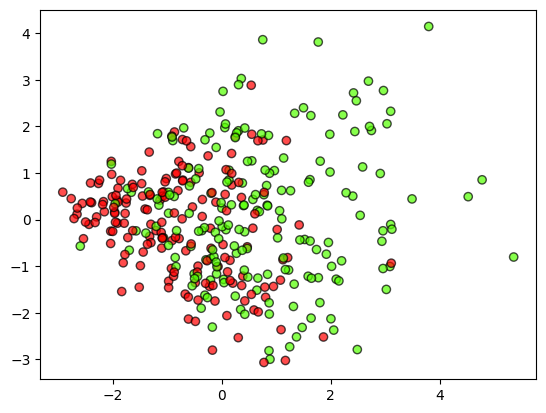

Precision score 0.5897435897435898
Recall score 0.6216216216216216
F1-score score 0.6052631578947368
Accuracy score 0.6590909090909091


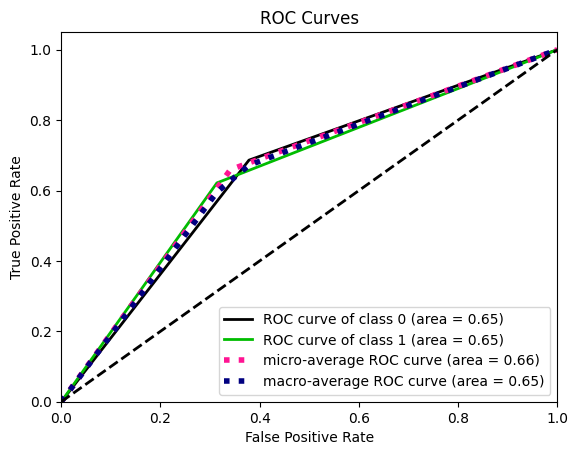

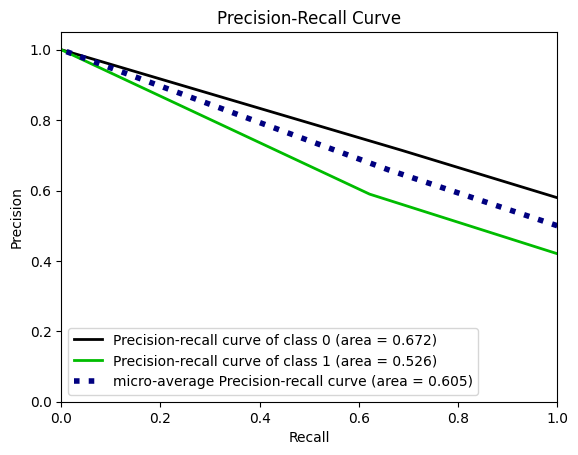

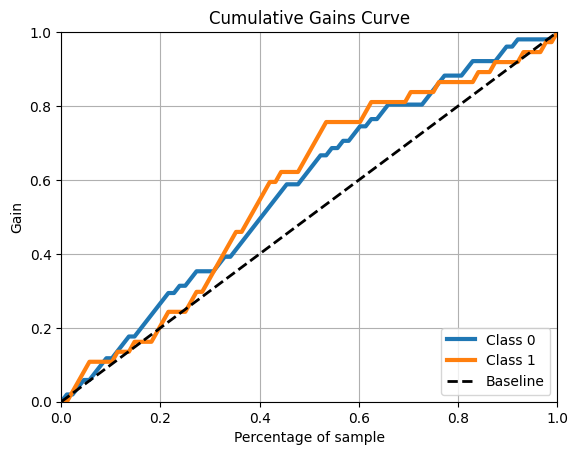

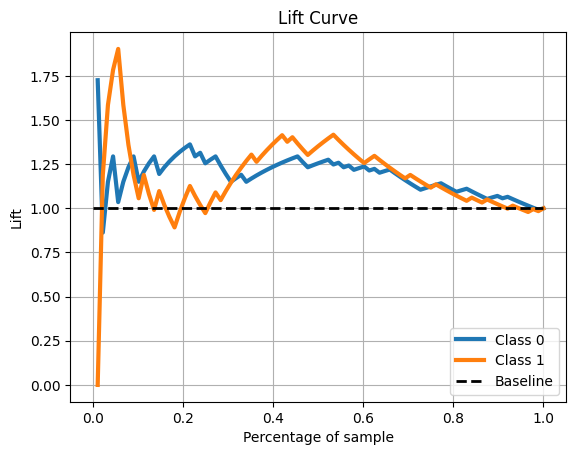

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        51
           1       0.59      0.62      0.61        37

    accuracy                           0.66        88
   macro avg       0.65      0.65      0.65        88
weighted avg       0.66      0.66      0.66        88



In [ ]:
roc_auc_nm, fpr_nm, tpr_nm, _ = build_and_test(X_train, y_train, X_test, y_test)

#Plotting all together

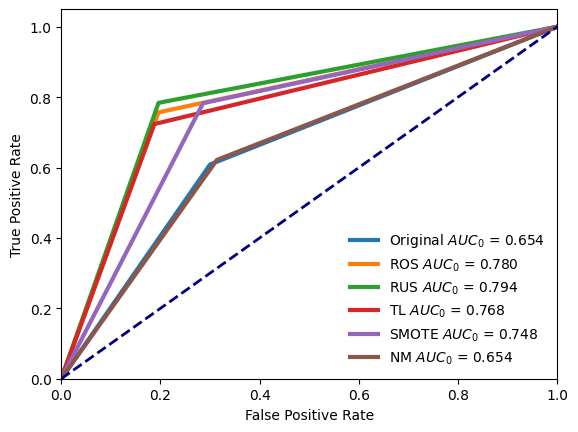

In [ ]:
plt.plot(fpr_imb, tpr_imb, lw = 3, label = 'Original $AUC_0$ = %.3f' % (roc_auc_imb))
plt.plot(fpr_ros, tpr_ros, lw = 3, label = 'ROS $AUC_0$ = %.3f' % (roc_auc_ros))
plt.plot(fpr_rus, tpr_rus, lw = 3, label = 'RUS $AUC_0$ = %.3f' % (roc_auc_rus))
plt.plot(fpr_tl, tpr_tl, lw = 3, label = 'TL $AUC_0$ = %.3f' % (roc_auc_tl))
plt.plot(fpr_smote, tpr_smote, lw = 3, label = 'SMOTE $AUC_0$ = %.3f' % (roc_auc_smote))
plt.plot(fpr_nm, tpr_nm, lw = 3, label = 'NM $AUC_0$ = %.3f' % (roc_auc_nm))
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 10)
plt.legend(loc = 'lower right', fontsize = 10, frameon = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.show()

#Highest AUC value -> RUS

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_rus, y_rus, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
len(X_train), len(X_val), len(X_test), len(y_train), len(y_val), len(y_test)

(352, 44, 44, 352, 44, 44)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
len(X_test), len(y_test)

(44, 44)

In [ ]:
len(X_train), len(y_train)

(352, 352)

In [ ]:
len(X_val), len(y_val)

(44, 44)

#ML models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr_model.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)
lr_train_prec = precision_score(y_train, lr_model.predict(X_train))
lr_test_prec = precision_score(y_test, y_pred)
lr_train_rec = recall_score(y_train, lr_model.predict(X_train))
lr_test_rec = recall_score(y_test, y_pred)
lr_train_f1 = f1_score(y_train, lr_model.predict(X_train))
lr_test_f1 = f1_score(y_test, y_pred)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_patient_accuracies = lr_conf_matrix.diagonal() / lr_conf_matrix.sum(axis = 1)
for i, acc in enumerate(lr_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

lr_average_patient_accuracy =lr_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {lr_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {lr_train_acc:.2%} | Testing acc: {lr_test_acc:.2%}')
print(f'Training precision: {lr_train_prec:.2%} | Testing precision: {lr_test_prec:.2%}')
print(f'Training recall: {lr_train_rec:.2%} | Testing recall: {lr_test_rec:.2%}')
print(f'Training F1 score: {lr_train_f1:.2%} | Testing F1 score: {lr_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 65.00%
Patient 2 Accuracy: 79.17%
Average Patient-Level Accuracy: 72.08%

               precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.73      0.79      0.76        24

    accuracy                           0.73        44
   macro avg       0.73      0.72      0.72        44
weighted avg       0.73      0.73      0.73        44

Training acc: 75.28% | Testing acc: 72.73%
Training precision: 76.97% | Testing precision: 73.08%
Training recall: 74.86% | Testing recall: 79.17%
Training F1 score: 75.90% | Testing F1 score: 76.00%


array([[13,  7],
       [ 5, 19]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'solver': ['newton-cg', 'lbfgs', 'liblinear'],
  'penalty': ['l2'],
  'C': [100, 10, 1.0, 0.1, 0.01]
}
lr_model = LogisticRegression()

grid_search = GridSearchCV(lr_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best mean cv accuracy: 75.86%
Validation accuracy: 75.00%


In [ ]:
lr_grid_model = LogisticRegression(solver = 'newton-cg',
                                   C = 0.01,
                                   penalty = 'l2')
lr_grid_model = lr_grid_model.fit(X_train, y_train)
y_pred = lr_grid_model.predict(X_test)

lr_grid_train_acc = accuracy_score(y_train, lr_grid_model.predict(X_train))
lr_grid_test_acc = accuracy_score(y_test, y_pred)
lr_grid_train_prec = precision_score(y_train, lr_grid_model.predict(X_train))
lr_grid_test_prec = precision_score(y_test, y_pred)
lr_grid_train_rec = recall_score(y_train, lr_grid_model.predict(X_train))
lr_grid_test_rec = recall_score(y_test, y_pred)
lr_grid_train_f1 = f1_score(y_train, lr_grid_model.predict(X_train))
lr_grid_test_f1 = f1_score(y_test, y_pred)

lr_grid_conf_matrix = confusion_matrix(y_test, y_pred)
lr_grid_patient_accuracies = lr_grid_conf_matrix.diagonal() / lr_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(lr_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

lr_grid_average_patient_accuracy= lr_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {lr_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {lr_grid_train_acc:.2%} | Testing acc: {lr_grid_test_acc:.2%}')
print(f'Training precision: {lr_grid_train_prec:.2%} | Testing precision: {lr_grid_test_prec:.2%}')
print(f'Training recall: {lr_grid_train_rec:.2%} | Testing recall: {lr_grid_test_rec:.2%}')
print(f'Training F1 score: {lr_grid_train_f1:.2%} | Testing F1 score: {lr_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 75.00%
Patient 2 Accuracy: 75.00%
Average Patient-Level Accuracy: 75.00%

               precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.78      0.75      0.77        24

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.75      0.75      0.75        44

Training acc: 75.85% | Testing acc: 75.00%
Training precision: 76.34% | Testing precision: 78.26%
Training recall: 77.60% | Testing recall: 75.00%
Training F1 score: 76.96% | Testing F1 score: 76.60%


array([[15,  5],
       [ 6, 18]])

###Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

rand_params = {
  'solver': ['newton-cg', 'lbfgs', 'liblinear'],
  'penalty': ['l2'],
  'C': loguniform(1e-5, 100)
}
lr_model = LogisticRegression()
random_seed = 42

random_search = RandomizedSearchCV(lr_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = 42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b3068f7dff0>,
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'C': 0.004185822729546971, 'penalty': 'l2', 'solver': 'newton-cg'}
Best mean cv accuracy: 76.15%
Validation accuracy: 75.00%


In [ ]:
lr_random_model = LogisticRegression(solver = 'liblinear',
                                     C = 0.004,
                                     penalty = 'l2')
lr_random_model = lr_random_model.fit(X_train, y_train)
y_pred = lr_random_model.predict(X_test)

lr_random_train_acc = accuracy_score(y_train, lr_random_model.predict(X_train))
lr_random_test_acc = accuracy_score(y_test, y_pred)
lr_random_train_prec = precision_score(y_train, lr_random_model.predict(X_train))
lr_random_test_prec = precision_score(y_test, y_pred)
lr_random_train_rec = recall_score(y_train, lr_random_model.predict(X_train))
lr_random_test_rec = recall_score(y_test, y_pred)
lr_random_train_f1 = f1_score(y_train, lr_random_model.predict(X_train))
lr_random_test_f1 = f1_score(y_test, y_pred)

lr_random_conf_matrix = confusion_matrix(y_test, y_pred)
lr_random_patient_accuracies = lr_random_conf_matrix.diagonal() / lr_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(lr_random_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

lr_random_average_patient_accuracy = lr_random_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {lr_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {lr_random_train_acc:.2%} | Testing acc: {lr_random_test_acc:.2%}')
print(f'Training precision: {lr_random_train_prec:.2%} | Testing precision: {lr_random_test_prec:.2%}')
print(f'Training recall: {lr_random_train_rec:.2%} | Testing recall: {lr_random_test_rec:.2%}')
print(f'Training F1 score: {lr_random_train_f1:.2%} | Testing F1 score: {lr_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 80.00%
Patient 2 Accuracy: 75.00%
Average Patient-Level Accuracy: 77.50%

               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.82      0.75      0.78        24

    accuracy                           0.77        44
   macro avg       0.77      0.78      0.77        44
weighted avg       0.78      0.77      0.77        44

Training acc: 75.28% | Testing acc: 77.27%
Training precision: 76.97% | Testing precision: 81.82%
Training recall: 74.86% | Testing recall: 75.00%
Training F1 score: 75.90% | Testing F1 score: 78.26%


array([[16,  4],
       [ 6, 18]])

###Combined both

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

rand_params = {
  'solver': ['newton-cg', 'lbfgs', 'liblinear'],
  'penalty': ['l2'],
  'C': loguniform(1e-5, 100)
}
lr_model = LogisticRegression()
random_seed = 42

random_search = RandomizedSearchCV(lr_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = 42)
random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_

from sklearn.model_selection import GridSearchCV

grid_params = {
    'solver': [best_params_random['solver']],
    'penalty': [best_params_random['penalty']],
    'C': [best_params_random['C'], best_params_random['C']*10, best_params_random['C']*0.1,]
}

grid_search = GridSearchCV(lr_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
best_model_random = grid_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'C': 0.004185822729546971, 'penalty': 'l2', 'solver': 'newton-cg'}
Best mean cv accuracy: 76.15%
Validation accuracy: 75.00%


In [ ]:
lr_combined_model = LogisticRegression(solver = 'newton-cg',
                                     C = 0.004,
                                     penalty = 'l2')
lr_combined_model = lr_combined_model.fit(X_train, y_train)
y_pred = lr_combined_model.predict(X_test)

lr_combined_train_acc = accuracy_score(y_train, lr_combined_model.predict(X_train))
lr_combined_test_acc = accuracy_score(y_test, y_pred)
lr_combined_train_prec = precision_score(y_train, lr_combined_model.predict(X_train))
lr_combined_test_prec = precision_score(y_test, y_pred)
lr_combined_train_rec = recall_score(y_train, lr_combined_model.predict(X_train))
lr_combined_test_rec = recall_score(y_test, y_pred)
lr_combined_train_f1 = f1_score(y_train, lr_combined_model.predict(X_train))
lr_combined_test_f1 = f1_score(y_test, y_pred)

lr_combined_conf_matrix = confusion_matrix(y_test, y_pred)
lr_combined_patient_accuracies = lr_combined_conf_matrix.diagonal() / lr_combined_conf_matrix.sum(axis = 1)
for i, acc in enumerate(lr_combined_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

lr_combined_average_patient_accuracy = lr_combined_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {lr_combined_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {lr_combined_train_acc:.2%} | Testing acc: {lr_combined_test_acc:.2%}')
print(f'Training precision: {lr_combined_train_prec:.2%} | Testing precision: {lr_combined_test_prec:.2%}')
print(f'Training recall: {lr_combined_train_rec:.2%} | Testing recall: {lr_combined_test_rec:.2%}')
print(f'Training F1: {lr_combined_train_f1:.2%} | Testing F1: {lr_combined_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 79.17%
Average Patient-Level Accuracy: 74.58%

               precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.76      0.79      0.78        24

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.75      0.75      0.75        44

Training acc: 76.70% | Testing acc: 75.00%
Training precision: 76.17% | Testing precision: 76.00%
Training recall: 80.33% | Testing recall: 79.17%
Training F1: 78.19% | Testing F1: 77.55%


array([[14,  6],
       [ 5, 19]])

In [ ]:
import pandas as pd

lr_results = {
      'Model': [lr_model, lr_grid_model, lr_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [lr_train_acc, lr_grid_train_acc, lr_random_train_acc],
      'Test Accuracy': [lr_test_acc, lr_grid_test_acc, lr_random_test_acc],
      'Train Precision': [lr_train_prec, lr_grid_train_prec, lr_random_train_prec],
      'Test Precision': [lr_test_prec, lr_grid_test_prec, lr_random_test_prec],
      'Train Recall': [lr_train_rec, lr_grid_train_rec, lr_random_train_rec],
      'Test Recall': [lr_test_rec, lr_grid_test_rec, lr_random_test_rec],
      'Train F1 Score': [lr_train_f1, lr_grid_train_f1, lr_random_train_f1],
      'Test F1 Score': [lr_test_f1, lr_grid_test_f1, lr_random_test_f1],
      'Confusion Matrix': [lr_conf_matrix, lr_grid_conf_matrix, lr_random_conf_matrix],
      'Average Patient-level Accuracy': [lr_average_patient_accuracy, lr_grid_average_patient_accuracy, lr_random_average_patient_accuracy]
}

df_lr_results = pd.DataFrame(lr_results)
df_lr_results

Model    Model Types  \
0                             LogisticRegression()       Original   
1   LogisticRegression(C=0.01, solver='newton-cg')    Grid Search   
2  LogisticRegression(C=0.004, solver='liblinear')  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.752841       0.727273         0.769663        0.730769   
1        0.758523       0.750000         0.763441        0.782609   
2        0.752841       0.772727         0.769663        0.818182   

   Train Recall  Test Recall  Train F1 Score  Test F1 Score  \
0      0.748634     0.791667        0.759003       0.760000   
1      0.775956     0.750000        0.769648       0.765957   
2      0.748634     0.750000        0.759003       0.782609   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[13, 7], [5, 19]]                        0.720833  
1  [[15, 5], [6, 18]]                        0.750000  
2  [[16, 4], [6, 18]]                        0.775000

##kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier() #n_neighbors default = 5
knn_model = knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)
knn_train_rec = recall_score(y_train, knn_model.predict(X_train))
knn_train_prec = precision_score(y_train, knn_model.predict(X_train))
knn_test_prec = precision_score(y_test, y_pred)
knn_test_rec = recall_score(y_test, y_pred)
knn_train_f1 = f1_score(y_train, knn_model.predict(X_train))
knn_test_f1 = f1_score(y_test, y_pred)

knn_conf_matrix = confusion_matrix(y_test, y_pred)
knn_patient_accuracies = knn_conf_matrix.diagonal() / knn_conf_matrix.sum(axis = 1)
for i, acc in enumerate(knn_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

knn_average_patient_accuracy = knn_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {knn_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {knn_train_acc:.2%} | Testing acc: {knn_test_acc:.2%}')
print(f'Training precision: {knn_train_prec:.2%} | Testing precision: {knn_test_prec:.2%}')
print(f'Training recall: {knn_train_rec:.2%} | Testing recall: {knn_test_rec:.2%}')
print(f'Training F1 score: {knn_train_f1:.2%} | Testing F1 score: {knn_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 65.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 76.25%

               precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.75      0.88      0.81        24

    accuracy                           0.77        44
   macro avg       0.78      0.76      0.76        44
weighted avg       0.78      0.77      0.77        44

Training acc: 80.11% | Testing acc: 77.27%
Training precision: 81.22% | Testing precision: 75.00%
Training recall: 80.33% | Testing recall: 87.50%
Training F1 score: 80.77% | Testing F1 score: 80.77%


array([[13,  7],
       [ 3, 21]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'n_neighbors': range(1, 21, 1),
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best mean cv accuracy: 79.01%
Validation accuracy: 84.09%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_grid_model = KNeighborsClassifier(metric = 'manhattan',
                                      n_neighbors = 17,
                                      weights = 'distance')
knn_grid_model = knn_grid_model.fit(X_train, y_train)
y_pred = knn_grid_model.predict(X_test)

knn_grid_train_acc = accuracy_score(y_train, knn_grid_model.predict(X_train))
knn_grid_test_acc = accuracy_score(y_test, y_pred)
knn_grid_train_prec = precision_score(y_train, knn_grid_model.predict(X_train))
knn_grid_test_prec = precision_score(y_test, y_pred)
knn_grid_train_rec = recall_score(y_train, knn_grid_model.predict(X_train))
knn_grid_test_rec = recall_score(y_test, y_pred)
knn_grid_train_f1 = f1_score(y_train, knn_grid_model.predict(X_train))
knn_grid_test_f1 = f1_score(y_test, y_pred)

knn_grid_conf_matrix = confusion_matrix(y_test, y_pred)
knn_grid_patient_accuracies = knn_grid_conf_matrix.diagonal() / knn_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(knn_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

knn_grid_average_patient_accuracy = knn_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {knn_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {knn_grid_train_acc:.2%} | Testing acc: {knn_grid_test_acc:.2%}')
print(f'Training precision: {knn_grid_train_prec:.2%} | Testing precision: {knn_grid_test_prec:.2%}')
print(f'Training recall: {knn_grid_train_rec:.2%} | Testing recall: {knn_grid_test_rec:.2%}')
print(f'Training F1 score: {knn_grid_train_f1:.2%} | Testing F1 score: {knn_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 78.75%

               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.78      0.88      0.82        24

    accuracy                           0.80        44
   macro avg       0.80      0.79      0.79        44
weighted avg       0.80      0.80      0.79        44

Training acc: 100.00% | Testing acc: 79.55%
Training precision: 100.00% | Testing precision: 77.78%
Training recall: 100.00% | Testing recall: 87.50%
Training F1 score: 100.00% | Testing F1 score: 82.35%


array([[14,  6],
       [ 3, 21]])

###Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rand_params = {
  'n_neighbors': randint(1, 21),
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_model = KNeighborsClassifier()
random_seed = 42

random_search = RandomizedSearchCV(knn_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3069443550>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best mean cv accuracy: 77.57%
Validation accuracy: 84.09%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_random_model = KNeighborsClassifier(metric = 'euclidean',
                                        n_neighbors = 10,
                                        weights = 'distance')
knn_random_model = knn_random_model.fit(X_train, y_train)
y_pred = knn_random_model.predict(X_test)

knn_random_train_acc = accuracy_score(y_train, knn_random_model.predict(X_train))
knn_random_test_acc = accuracy_score(y_test, y_pred)
knn_random_train_prec = precision_score(y_train, knn_random_model.predict(X_train))
knn_random_test_prec = precision_score(y_test, y_pred)
knn_random_train_rec = recall_score(y_train, knn_random_model.predict(X_train))
knn_random_test_rec = recall_score(y_test, y_pred)
knn_random_train_f1 = f1_score(y_train, knn_random_model.predict(X_train))
knn_random_test_f1 = f1_score(y_test, y_pred)

knn_random_conf_matrix = confusion_matrix(y_test, y_pred)
knn_random_patient_accuracies = knn_random_conf_matrix.diagonal() / knn_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(knn_random_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

knn_random_average_patient_accuracy = knn_random_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {knn_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {knn_random_train_acc:.2%} | Testing acc: {knn_random_test_acc:.2%}')
print(f'Training precision: {knn_random_train_prec:.2%} | Testing precision: {knn_random_test_prec:.2%}')
print(f'Training recall: {knn_random_train_rec:.2%} | Testing recall: {knn_random_test_rec:.2%}')
print(f'Training F1 score: {knn_random_train_f1:.2%} | Testing F1 score: {knn_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 78.75%

               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.78      0.88      0.82        24

    accuracy                           0.80        44
   macro avg       0.80      0.79      0.79        44
weighted avg       0.80      0.80      0.79        44

Training acc: 100.00% | Testing acc: 79.55%
Training precision: 100.00% | Testing precision: 77.78%
Training recall: 100.00% | Testing recall: 87.50%
Training F1 score: 100.00% | Testing F1 score: 82.35%


array([[14,  6],
       [ 3, 21]])

In [ ]:
import pandas as pd

knn_results = {
      'Model': [knn_model, knn_grid_model, knn_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [knn_train_acc, knn_grid_train_acc, knn_random_train_acc],
      'Test Accuracy': [knn_test_acc, knn_grid_test_acc, knn_random_test_acc],
      'Train Precision': [knn_train_prec, knn_grid_train_prec, knn_random_train_prec],
      'Test Precision': [knn_test_prec, knn_grid_test_prec, knn_random_test_prec],
      'Train Recall': [knn_train_rec, knn_grid_train_rec, knn_random_train_rec],
      'Test Recall': [knn_test_rec, knn_grid_test_rec, knn_random_test_rec],
      'Train F1 Score': [knn_train_f1, knn_grid_train_f1, knn_random_train_f1],
      'Test F1 Score': [knn_test_f1, knn_grid_test_f1, knn_random_test_f1],
      'Confusion Matrix': [knn_conf_matrix, knn_grid_conf_matrix, knn_random_conf_matrix],
      'Average Patient-level Accuracy': [knn_average_patient_accuracy, knn_grid_average_patient_accuracy, knn_random_average_patient_accuracy]
}

df_knn_results = pd.DataFrame(knn_results)
df_knn_results

Model    Model Types  \
0                             KNeighborsClassifier()       Original   
1  KNeighborsClassifier(metric='manhattan', n_nei...    Grid Search   
2  KNeighborsClassifier(metric='euclidean', n_nei...  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.801136       0.772727         0.812155        0.750000   
1        1.000000       0.795455         1.000000        0.777778   
2        1.000000       0.795455         1.000000        0.777778   

   Train Recall  Test Recall  Train F1 Score  Test F1 Score  \
0      0.803279        0.875        0.807692       0.807692   
1      1.000000        0.875        1.000000       0.823529   
2      1.000000        0.875        1.000000       0.823529   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[13, 7], [3, 21]]                          0.7625  
1  [[14, 6], [3, 21]]                          0.7875  
2  [[14, 6], [3, 21]]                          0.7875

##Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)
svc_train_prec = precision_score(y_train, svc_model.predict(X_train))
svc_test_prec = precision_score(y_test, y_pred)
svc_train_rec = recall_score(y_train, svc_model.predict(X_train))
svc_test_rec = recall_score(y_test, y_pred)
svc_train_f1 = f1_score(y_train, svc_model.predict(X_train))
svc_test_f1 = f1_score(y_test, y_pred)

svc_conf_matrix = confusion_matrix(y_test, y_pred)
svc_patient_accuracies = svc_conf_matrix.diagonal() / svc_conf_matrix.sum(axis = 1)
for i, acc in enumerate(svc_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

svc_average_patient_accuracy = svc_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {svc_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {svc_train_acc:.2%} | Testing acc: {svc_test_acc:.2%}')
print(f'Training precision: {svc_train_prec:.2%} | Testing precision: {svc_test_prec:.2%}')
print(f'Training recall: {svc_train_rec:.2%} | Testing recall: {svc_test_rec:.2%}')
print(f'Training F1 score: {svc_train_f1:.2%} | Testing F1 score: {svc_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 60.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 73.75%

               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.72      0.88      0.79        24

    accuracy                           0.75        44
   macro avg       0.76      0.74      0.74        44
weighted avg       0.76      0.75      0.74        44

Training acc: 82.67% | Testing acc: 75.00%
Training precision: 82.11% | Testing precision: 72.41%
Training recall: 85.25% | Testing recall: 87.50%
Training F1 score: 83.65% | Testing F1 score: 79.25%


array([[12,  8],
       [ 3, 21]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'kernel': ['poly', 'rbf', 'sigmoid'],
  'gamma': ['scale'],
  'C': [100, 10, 1.0, 0.1, 0.01]
}
svc_model = SVC()

grid_search = GridSearchCV(svc_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best mean cv accuracy: 76.73%
Validation accuracy: 75.00%


In [ ]:
from sklearn.svm import SVC

svc_grid_model = SVC(C = 1.0,
                     gamma = 'scale',
                     kernel = 'rbf')
svc_grid_model = svc_grid_model.fit(X_train, y_train)
y_pred = svc_grid_model.predict(X_test)

svc_grid_train_acc = accuracy_score(y_train, svc_grid_model.predict(X_train))
svc_grid_test_acc = accuracy_score(y_test, y_pred)
svc_grid_train_prec = precision_score(y_train, svc_grid_model.predict(X_train))
svc_grid_test_prec = precision_score(y_test, y_pred)
svc_grid_train_rec = recall_score(y_train, svc_grid_model.predict(X_train))
svc_grid_test_rec = recall_score(y_test, y_pred)
svc_grid_train_f1 = f1_score(y_train, svc_grid_model.predict(X_train))
svc_grid_test_f1 = f1_score(y_test, y_pred)

svc_grid_conf_matrix = confusion_matrix(y_test, y_pred)
svc_grid_patient_accuracies_grid = svc_grid_conf_matrix.diagonal() / svc_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(svc_grid_patient_accuracies_grid):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

svc_grid_average_patient_accuracy = svc_grid_patient_accuracies_grid.mean()
print(f'Average Patient-Level Accuracy: {svc_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {svc_grid_train_acc:.2%} | Testing acc: {svc_grid_test_acc:.2%}')
print(f'Training precision: {svc_grid_train_prec:.2%} | Testing precision: {svc_grid_test_prec:.2%}')
print(f'Training recall: {svc_grid_train_rec:.2%} | Testing recall: {svc_grid_test_rec:.2%}')
print(f'Training F1 score: {svc_grid_train_f1:.2%} | Testing F1 score: {svc_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 60.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 73.75%

               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.72      0.88      0.79        24

    accuracy                           0.75        44
   macro avg       0.76      0.74      0.74        44
weighted avg       0.76      0.75      0.74        44

Training acc: 82.67% | Testing acc: 75.00%
Training precision: 82.11% | Testing precision: 72.41%
Training recall: 85.25% | Testing recall: 87.50%
Training F1 score: 83.65% | Testing F1 score: 79.25%


array([[12,  8],
       [ 3, 21]])

###Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

rand_params = {
  'kernel': ['poly', 'rbf', 'sigmoid'],
  'gamma': ['scale'],
  'C': loguniform(1e-5, 100)
}
svc_model = SVC()
random_seed = 42

random_search = RandomizedSearchCV(svc_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b306a68b220>,
                                        'gamma': ['scale'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'C': 0.21007315955680625, 'gamma': 'scale', 'kernel': 'rbf'}
Best mean cv accuracy: 77.29%
Validation accuracy: 72.73%


In [ ]:
from sklearn.svm import SVC

svc_random_model = SVC(C = 0.21,
                gamma = 'scale',
                kernel = 'rbf')
svc_random_model = svc_random_model.fit(X_train, y_train)
y_pred = svc_random_model.predict(X_test)

svc_random_train_acc = accuracy_score(y_train, svc_random_model.predict(X_train))
svc_random_test_acc = accuracy_score(y_test, y_pred)
svc_random_train_prec = precision_score(y_train, svc_random_model.predict(X_train))
svc_random_test_prec = precision_score(y_test, y_pred)
svc_random_train_rec = recall_score(y_train, svc_random_model.predict(X_train))
svc_random_test_rec = recall_score(y_test, y_pred)
svc_random_train_f1 = f1_score(y_train, svc_random_model.predict(X_train))
svc_random_test_f1 = f1_score(y_test, y_pred)

svc_random_conf_matrix = confusion_matrix(y_test, y_pred)
svc_random_patient_accuracies_random = svc_random_conf_matrix.diagonal() / svc_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(svc_random_patient_accuracies_random):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

svc_random_average_patient_accuracy = svc_random_patient_accuracies_random.mean()
print(f'Average Patient-Level Accuracy: {svc_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {svc_random_train_acc:.2%} | Testing acc: {svc_random_test_acc:.2%}')
print(f'Training precision: {svc_random_train_prec:.2%} | Testing precision: {svc_random_test_prec:.2%}')
print(f'Training recall: {svc_random_train_rec:.2%} | Testing recall: {svc_random_test_rec:.2%}')
print(f'Training F1 score: {svc_random_train_f1:.2%} | Testing F1 score: {svc_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 55.00%
Patient 2 Accuracy: 83.33%
Average Patient-Level Accuracy: 69.17%

               precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.69      0.83      0.75        24

    accuracy                           0.70        44
   macro avg       0.71      0.69      0.69        44
weighted avg       0.71      0.70      0.70        44

Training acc: 78.69% | Testing acc: 70.45%
Training precision: 77.00% | Testing precision: 68.97%
Training recall: 84.15% | Testing recall: 83.33%
Training F1 score: 80.42% | Testing F1 score: 75.47%


array([[11,  9],
       [ 4, 20]])

In [ ]:
svc_results = {
      'Model' : [svc_model, svc_grid_model, svc_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [svc_train_acc, svc_grid_train_acc, svc_random_train_acc],
      'Test Accuracy': [svc_test_acc, svc_grid_test_acc, svc_random_test_acc],
      'Train Precision': [svc_train_prec, svc_grid_train_prec, svc_random_train_prec],
      'Test Precision': [svc_test_prec, svc_grid_test_prec, svc_random_test_prec],
      'Train Recall': [svc_train_rec, svc_grid_train_rec, svc_random_train_rec],
      'Test Recall': [svc_test_rec, svc_grid_test_rec, svc_random_test_rec],
      'Train F1 score': [svc_train_f1, svc_grid_train_f1, svc_random_train_f1],
      'Test F1 score': [svc_test_f1, svc_grid_test_f1, svc_random_test_f1],
      'Confusion Matrix': [svc_conf_matrix, svc_grid_conf_matrix, svc_random_conf_matrix],
      'Average Patient-level Accuracy': [svc_average_patient_accuracy, svc_grid_average_patient_accuracy, svc_random_average_patient_accuracy]
}

df_svc_results = pd.DataFrame(svc_results)
df_svc_results

Model    Model Types  Train Accuracy  Test Accuracy  Train Precision  \
0        SVC()       Original        0.826705       0.750000         0.821053   
1        SVC()    Grid Search        0.826705       0.750000         0.821053   
2  SVC(C=0.21)  Random Search        0.786932       0.704545         0.770000   

   Test Precision  Train Recall  Test Recall  Train F1 score  Test F1 score  \
0        0.724138      0.852459     0.875000        0.836461       0.792453   
1        0.724138      0.852459     0.875000        0.836461       0.792453   
2        0.689655      0.841530     0.833333        0.804178       0.754717   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[12, 8], [3, 21]]                        0.737500  
1  [[12, 8], [3, 21]]                        0.737500  
2  [[11, 9], [4, 20]]                        0.691667

##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()
dtc_model = dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc_model.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)
dtc_train_prec = precision_score(y_train, dtc_model.predict(X_train))
dtc_test_prec = precision_score(y_test, y_pred)
dtc_train_rec = recall_score(y_train, dtc_model.predict(X_train))
dtc_test_rec = recall_score(y_test, y_pred)
dtc_train_f1 = f1_score(y_train, dtc_model.predict(X_train))
dtc_test_f1 = f1_score(y_test, y_pred)

dtc_conf_matrix = confusion_matrix(y_test, y_pred)
dtc_patient_accuracies = dtc_conf_matrix.diagonal() / dtc_conf_matrix.sum(axis = 1)
for i, acc in enumerate(dtc_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

dtc_average_patient_accuracy = dtc_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {dtc_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {dtc_train_acc:.2%} | Testing acc: {dtc_test_acc:.2%}')
print(f'Training precision: {dtc_train_prec:.2%} | Testing precision: {dtc_test_prec:.2%}')
print(f'Training recall: {dtc_train_rec:.2%} | Testing recall: {dtc_test_rec:.2%}')
print(f'Training F1 score: {dtc_train_f1:.2%} | Testing F1 score: {dtc_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 75.00%
Patient 2 Accuracy: 83.33%
Average Patient-Level Accuracy: 79.17%

               precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.80      0.83      0.82        24

    accuracy                           0.80        44
   macro avg       0.79      0.79      0.79        44
weighted avg       0.80      0.80      0.79        44

Training acc: 100.00% | Testing acc: 79.55%
Training precision: 100.00% | Testing precision: 80.00%
Training recall: 100.00% | Testing recall: 83.33%
Training F1 score: 100.00% | Testing F1 score: 81.63%


array([[15,  5],
       [ 4, 20]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'criterion': ['gini', 'entropy'],
  'max_depth': range(0, 30),
  'min_samples_leaf': range(0, 4),
  'max_features': ['sqrt', 'log2', None],
  'min_samples_split': range(0, 10),
  'splitter': ['best', 'random']
}
dtc_model = DecisionTreeClassifier()

grid_search = GridSearchCV(dtc_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14400 candidates, totalling 72000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 30),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(0, 4),
                         'min_samples_split': range(0, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'criterion': 'gini', 'max_depth': 26, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best mean cv accuracy: 76.43%
Validation accuracy: 70.45%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc_grid_model = DecisionTreeClassifier(criterion = 'gini',
                                        max_depth = 26,
                                        max_features = 'log2',
                                        min_samples_leaf = 1,
                                        min_samples_split = 2,
                                        splitter = 'best')
dtc_grid_model = dtc_grid_model.fit(X_train, y_train)
y_pred = dtc_grid_model.predict(X_test)

dtc_grid_train_acc = accuracy_score(y_train, dtc_grid_model.predict(X_train))
dtc_grid_test_acc = accuracy_score(y_test, y_pred)
dtc_grid_train_prec = precision_score(y_train, dtc_grid_model.predict(X_train))
dtc_grid_test_prec = precision_score(y_test, y_pred)
dtc_grid_train_rec = recall_score(y_train, dtc_grid_model.predict(X_train))
dtc_grid_test_rec = recall_score(y_test, y_pred)
dtc_grid_train_f1 = f1_score(y_train, dtc_grid_model.predict(X_train))
dtc_grid_test_f1 = f1_score(y_test, y_pred)

dtc_grid_conf_matrix = confusion_matrix(y_test, y_pred)
dtc_grid_patient_accuracies = dtc_grid_conf_matrix.diagonal() / dtc_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(dtc_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

dtc_grid_average_patient_accuracy = dtc_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {dtc_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {dtc_grid_train_acc:.2%} | Testing acc: {dtc_grid_test_acc:.2%}')
print(f'Training precision: {dtc_grid_train_prec:.2%} | Testing precision: {dtc_grid_test_prec:.2%}')
print(f'Training recall: {dtc_grid_train_rec:.2%} | Testing recall: {dtc_grid_test_rec:.2%}')
print(f'Training F1 score: {dtc_grid_train_f1:.2%} | Testing F1 score: {dtc_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 75.00%
Patient 2 Accuracy: 75.00%
Average Patient-Level Accuracy: 75.00%

               precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.78      0.75      0.77        24

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.75      0.75      0.75        44

Training acc: 100.00% | Testing acc: 75.00%
Training precision: 100.00% | Testing precision: 78.26%
Training recall: 100.00% | Testing recall: 75.00%
Training F1 score: 100.00% | Testing F1 score: 76.60%


array([[15,  5],
       [ 6, 18]])

###Randomized Grid CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

rand_params = {
  'criterion': ['gini', 'entropy'],
  'max_depth': randint(0, 30),
  'min_samples_leaf': randint(0, 4),
  'max_features': ['sqrt', 'log2', None],
  'min_samples_split': randint(0, 10),
  'splitter': ['best', 'random']
}
dtc_model = DecisionTreeClassifier()
random_seed = 42

random_search = RandomizedSearchCV(dtc_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b306a48e3e0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b306a48fd60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b306a48eb00>,
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'criterion': 'gini', 'max_depth': 27, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'best'}
Best mean cv accuracy: 72.43%
Validation accuracy: 81.82%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc_random_model = DecisionTreeClassifier(criterion = 'gini',
                                          max_depth = 27,
                                          max_features = 'log2',
                                          min_samples_leaf = 1,
                                          min_samples_split = 9,
                                          splitter = 'best')
dtc_random_model = dtc_random_model.fit(X_train, y_train)
y_pred = dtc_random_model.predict(X_test)

dtc_random_train_acc = accuracy_score(y_train, dtc_random_model.predict(X_train))
dtc_random_test_acc = accuracy_score(y_test, y_pred)
dtc_random_train_prec = precision_score(y_train, dtc_random_model.predict(X_train))
dtc_random_test_prec = precision_score(y_test, y_pred)
dtc_random_train_rec = recall_score(y_train, dtc_random_model.predict(X_train))
dtc_random_test_rec = recall_score(y_test, y_pred)
dtc_random_train_f1 = f1_score(y_train, dtc_random_model.predict(X_train))
dtc_random_test_f1 = f1_score(y_test, y_pred)

dtc_random_conf_matrix = confusion_matrix(y_test, y_pred)
dtc_random_patient_accuracies = dtc_random_conf_matrix.diagonal() / dtc_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(dtc_random_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

dtc_random_average_patient_accuracy = dtc_random_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {dtc_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {dtc_random_train_acc:.2%} | Testing acc: {dtc_random_test_acc:.2%}')
print(f'Training precision: {dtc_random_train_prec:.2%} | Testing precision: {dtc_random_test_prec:.2%}')
print(f'Training recall: {dtc_random_train_rec:.2%} | Testing recall: {dtc_random_test_rec:.2%}')
print(f'Training F1 score: {dtc_random_train_f1:.2%} | Testing F1 score: {dtc_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 65.00%
Patient 2 Accuracy: 83.33%
Average Patient-Level Accuracy: 74.17%

               precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.74      0.83      0.78        24

    accuracy                           0.75        44
   macro avg       0.75      0.74      0.74        44
weighted avg       0.75      0.75      0.75        44

Training acc: 92.61% | Testing acc: 75.00%
Training precision: 92.90% | Testing precision: 74.07%
Training recall: 92.90% | Testing recall: 83.33%
Training F1 score: 92.90% | Testing F1 score: 78.43%


array([[13,  7],
       [ 4, 20]])

In [ ]:
dtc_results = {
      'Model' : [dtc_model, dtc_grid_model, dtc_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [dtc_train_acc, dtc_grid_train_acc, dtc_random_train_acc],
      'Test Accuracy': [dtc_test_acc, dtc_grid_test_acc, dtc_random_test_acc],
      'Train Precision': [dtc_train_prec, dtc_grid_train_prec, dtc_random_train_prec],
      'Test Precision': [dtc_test_prec, dtc_grid_test_prec, dtc_random_test_prec],
      'Train Recall': [dtc_train_rec, dtc_grid_train_rec, dtc_random_train_rec],
      'Test Recall': [dtc_test_rec, dtc_grid_test_rec, dtc_random_test_rec],
      'Train F1 score': [dtc_train_f1, dtc_grid_train_f1, dtc_random_train_f1],
      'Test F1 score': [dtc_test_f1, dtc_grid_test_f1, dtc_random_test_f1],
      'Confusion Matrix': [dtc_conf_matrix, dtc_grid_conf_matrix, dtc_random_conf_matrix],
      'Average Patient-level Accuracy': [dtc_average_patient_accuracy, dtc_grid_average_patient_accuracy, dtc_random_average_patient_accuracy]
}

df_dtc_results = pd.DataFrame(dtc_results)
df_dtc_results

Model    Model Types  \
0                           DecisionTreeClassifier()       Original   
1  DecisionTreeClassifier(max_depth=26, max_featu...    Grid Search   
2  DecisionTreeClassifier(max_depth=27, max_featu...  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        1.000000       0.795455         1.000000        0.800000   
1        1.000000       0.750000         1.000000        0.842105   
2        0.943182       0.750000         0.982249        0.782609   

   Train Recall  Test Recall  Train F1 score  Test F1 score  \
0      1.000000     0.833333        1.000000       0.816327   
1      1.000000     0.666667        1.000000       0.744186   
2      0.907104     0.750000        0.943182       0.765957   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[15, 5], [4, 20]]                        0.791667  
1  [[17, 3], [8, 16]]                        0.758333  
2  [[15, 5], [6, 18]]                        0.750000

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc_model = RandomForestClassifier()
rfc_model = rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

rfc_train_acc = accuracy_score(y_train, rfc_model.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)
rfc_train_prec = precision_score(y_train, rfc_model.predict(X_train))
rfc_test_prec = precision_score(y_test, y_pred)
rfc_train_rec = recall_score(y_train, rfc_model.predict(X_train))
rfc_test_rec = recall_score(y_test, y_pred)
rfc_train_f1 = f1_score(y_train, rfc_model.predict(X_train))
rfc_test_f1 = f1_score(y_test, y_pred)

rfc_conf_matrix = confusion_matrix(y_test, y_pred)
rfc_patient_accuracies = rfc_conf_matrix.diagonal() / rfc_conf_matrix.sum(axis = 1)
for i, acc in enumerate(rfc_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

rfc_average_patient_accuracy = rfc_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {rfc_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {rfc_train_acc:.2%} | Testing acc: {rfc_test_acc:.2%}')
print(f'Training precision: {rfc_train_prec:.2%} | Testing precision: {rfc_test_prec:.2%}')
print(f'Training recall: {rfc_train_rec:.2%} | Testing recall: {rfc_test_rec:.2%}')
print(f'Training F1 score: {rfc_train_f1:.2%} | Testing F1 score: {rfc_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 78.75%

               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.78      0.88      0.82        24

    accuracy                           0.80        44
   macro avg       0.80      0.79      0.79        44
weighted avg       0.80      0.80      0.79        44

Training acc: 100.00% | Testing acc: 79.55%
Training precision: 100.00% | Testing precision: 77.78%
Training recall: 100.00% | Testing recall: 87.50%
Training F1 score: 100.00% | Testing F1 score: 82.35%


array([[14,  6],
       [ 3, 21]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'bootstrap': [True, False],
  'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}

rfc_model = RandomForestClassifier()

grid_search = GridSearchCV(rfc_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}
Best mean cv accuracy: 80.70%
Validation accuracy: 81.82%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_grid_model = RandomForestClassifier(bootstrap = True,
                                        max_depth = 30,
                                        max_features = 'sqrt',
                                        min_samples_leaf = 1,
                                        min_samples_split = 2,
                                        n_estimators = 2000)
rfc_grid_model = rfc_grid_model.fit(X_train, y_train)
y_pred = rfc_grid_model.predict(X_test)

rfc_grid_train_acc = accuracy_score(y_train, rfc_grid_model.predict(X_train))
rfc_grid_test_acc = accuracy_score(y_test, y_pred)
rfc_grid_train_prec = precision_score(y_train, rfc_grid_model.predict(X_train))
rfc_grid_test_prec = precision_score(y_test, y_pred)
rfc_grid_train_rec = recall_score(y_train, rfc_grid_model.predict(X_train))
rfc_grid_test_rec = recall_score(y_test, y_pred)
rfc_grid_train_f1 = f1_score(y_train, rfc_grid_model.predict(X_train))
rfc_grid_test_f1 = f1_score(y_test, y_pred)

rfc_grid_conf_matrix = confusion_matrix(y_test, y_pred)
rfc_grid_patient_accuracies = rfc_grid_conf_matrix.diagonal() / rfc_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(rfc_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

rfc_grid_average_patient_accuracy = rfc_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {rfc_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {rfc_grid_train_acc:.2%} | Testing acc: {rfc_grid_test_acc:.2%}')
print(f'Training precision: {rfc_grid_train_prec:.2%} | Testing precision: {rfc_grid_test_prec:.2%}')
print(f'Training recall: {rfc_grid_train_rec:.2%} | Testing recall: {rfc_grid_test_rec:.2%}')
print(f'Training F1 score: {rfc_grid_train_f1:.2%} | Testing F1 score: {rfc_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 78.75%

               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.78      0.88      0.82        24

    accuracy                           0.80        44
   macro avg       0.80      0.79      0.79        44
weighted avg       0.80      0.80      0.79        44

Training acc: 100.00% | Testing acc: 79.55%
Training precision: 100.00% | Testing precision: 77.78%
Training recall: 100.00% | Testing recall: 87.50%
Training F1 score: 100.00% | Testing F1 score: 82.35%


array([[14,  6],
       [ 3, 21]])

###Randomizsed Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rand_params = {
  'bootstrap': [True, False],
  'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}

rfc_model = RandomForestClassifier()
random_seed = 42

random_search = RandomizedSearchCV(rfc_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}
Best mean cv accuracy: 79.57%
Validation accuracy: 81.82%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_random_model = RandomForestClassifier(bootstrap = True,
                                          max_depth = 70,
                                          max_features = 'auto',
                                          min_samples_leaf = 1,
                                          min_samples_split = 5,
                                          n_estimators = 1200)
rfc_random_model = rfc_random_model.fit(X_train, y_train)
y_pred = rfc_random_model.predict(X_test)

rfc_random_train_acc = accuracy_score(y_train, rfc_random_model.predict(X_train))
rfc_random_test_acc = accuracy_score(y_test, y_pred)
rfc_random_train_prec = precision_score(y_train, rfc_random_model.predict(X_train))
rfc_random_test_prec = precision_score(y_test, y_pred)
rfc_random_train_rec = recall_score(y_train, rfc_random_model.predict(X_train))
rfc_random_test_rec = recall_score(y_test, y_pred)
rfc_random_train_f1 = f1_score(y_train, rfc_random_model.predict(X_train))
rfc_random_test_f1 = f1_score(y_test, y_pred)

rfc_random_conf_matrix = confusion_matrix(y_test, y_pred)
rfc_random_patient_accuracies_random = rfc_random_conf_matrix.diagonal() / rfc_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(rfc_random_patient_accuracies_random):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

rfc_random_average_patient_accuracy = rfc_random_patient_accuracies_random.mean()
print(f'Average Patient-Level Accuracy: {rfc_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {rfc_random_train_acc:.2%} | Testing acc: {rfc_random_test_acc:.2%}')
print(f'Training precision: {rfc_random_train_prec:.2%} | Testing precision: {rfc_random_test_prec:.2%}')
print(f'Training recall: {rfc_random_train_rec:.2%} | Testing recall: {rfc_random_test_rec:.2%}')
print(f'Training F1 score: {rfc_random_train_f1:.2%} | Testing F1 score: {rfc_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 78.75%

               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.78      0.88      0.82        24

    accuracy                           0.80        44
   macro avg       0.80      0.79      0.79        44
weighted avg       0.80      0.80      0.79        44

Training acc: 99.72% | Testing acc: 79.55%
Training precision: 99.46% | Testing precision: 77.78%
Training recall: 100.00% | Testing recall: 87.50%
Training F1 score: 99.73% | Testing F1 score: 82.35%


array([[14,  6],
       [ 3, 21]])

In [ ]:
rfc_results = {
      'Model' : [rfc_model, rfc_grid_model, rfc_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [rfc_train_acc, rfc_grid_train_acc, rfc_random_train_acc],
      'Test Accuracy': [rfc_test_acc, rfc_grid_test_acc, rfc_random_test_acc],
      'Train Precision': [rfc_train_prec, rfc_grid_train_prec, rfc_random_train_prec],
      'Test Precision': [rfc_test_prec, rfc_grid_test_prec, rfc_random_test_prec],
      'Train Recall': [rfc_train_rec, rfc_grid_train_rec, rfc_random_train_rec],
      'Test Recall': [rfc_test_rec, rfc_grid_test_rec, rfc_random_test_rec],
      'Train F1 score': [rfc_train_f1, rfc_grid_train_f1, rfc_random_train_f1],
      'Test F1 score': [rfc_test_f1, rfc_grid_test_f1, rfc_random_test_f1],
      'Confusion Matrix': [rfc_conf_matrix, rfc_grid_conf_matrix, rfc_random_conf_matrix],
      'Average Patient-level Accuracy': [rfc_average_patient_accuracy, rfc_grid_average_patient_accuracy, rfc_random_average_patient_accuracy]
}

df_rfc_results = pd.DataFrame(rfc_results)
df_rfc_results

Model    Model Types  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       Original   
1  (DecisionTreeClassifier(max_depth=30, max_feat...    Grid Search   
2  (DecisionTreeClassifier(max_depth=70, max_feat...  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        1.000000       0.863636         1.000000        0.821429   
1        1.000000       0.795455         1.000000        0.777778   
2        0.994318       0.795455         0.994536        0.777778   

   Train Recall  Test Recall  Train F1 score  Test F1 score  \
0      1.000000     0.958333        1.000000       0.884615   
1      1.000000     0.875000        1.000000       0.823529   
2      0.994536     0.875000        0.994536       0.823529   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[15, 5], [1, 23]]                        0.854167  
1  [[14, 6], [3, 21]]                        0.787500  
2  [[14, 6], [3, 21]]                        0.787500

##ADA Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

ada_model = AdaBoostClassifier()
ada_model = ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

ada_train_acc = accuracy_score(y_train, ada_model.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)
ada_train_prec = precision_score(y_train, ada_model.predict(X_train))
ada_test_prec = precision_score(y_test, y_pred)
ada_train_rec = recall_score(y_train, ada_model.predict(X_train))
ada_test_rec = recall_score(y_test, y_pred)
ada_train_f1 = f1_score(y_train, ada_model.predict(X_train))
ada_test_f1 = f1_score(y_test, y_pred)

ada_conf_matrix = confusion_matrix(y_test, y_pred)
ada_patient_accuracies = ada_conf_matrix.diagonal() / ada_conf_matrix.sum(axis = 1)
for i, acc in enumerate(ada_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

ada_average_patient_accuracy = ada_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {ada_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {ada_train_acc:.2%} | Testing acc: {ada_test_acc:.2%}')
print(f'Training precision: {ada_train_prec:.2%} | Testing precision: {ada_test_prec:.2%}')
print(f'Training recall: {ada_train_rec:.2%} | Testing recall: {ada_test_rec:.2%}')
print(f'Training F1 score: {ada_train_f1:.2%} | Testing F1 score: {ada_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 75.00%
Average Patient-Level Accuracy: 72.50%

               precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.75      0.75      0.75        24

    accuracy                           0.73        44
   macro avg       0.72      0.72      0.72        44
weighted avg       0.73      0.73      0.73        44

Training acc: 90.06% | Testing acc: 72.73%
Training precision: 89.36% | Testing precision: 75.00%
Training recall: 91.80% | Testing recall: 75.00%
Training F1 score: 90.57% | Testing F1 score: 75.00%


array([[14,  6],
       [ 6, 18]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'n_estimators': [50, 100, 150],
  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
}

ada_model = AdaBoostClassifier()

grid_search = GridSearchCV(ada_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best mean cv accuracy: 75.87%
Validation accuracy: 79.55%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_grid_model =  AdaBoostClassifier(learning_rate = 0.1,
                                     n_estimators = 50)
ada_grid_model = ada_grid_model.fit(X_train, y_train)
y_pred = ada_grid_model.predict(X_test)

ada_grid_train_acc = accuracy_score(y_train, ada_grid_model.predict(X_train))
ada_grid_test_acc = accuracy_score(y_test, y_pred)
ada_grid_train_prec = precision_score(y_train, ada_grid_model.predict(X_train))
ada_grid_test_prec = precision_score(y_test, y_pred)
ada_grid_train_rec = recall_score(y_train, ada_grid_model.predict(X_train))
ada_grid_test_rec = recall_score(y_test, y_pred)
ada_grid_train_f1 = f1_score(y_train, ada_grid_model.predict(X_train))
ada_grid_test_f1 = f1_score(y_test, y_pred)

ada_grid_conf_matrix = confusion_matrix(y_test, y_pred)
ada_grid_patient_accuracies = ada_grid_conf_matrix.diagonal() / ada_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(ada_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

ada_grid_average_patient_accuracy = ada_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {ada_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {ada_grid_train_acc:.2%} | Testing acc: {ada_grid_test_acc:.2%}')
print(f'Training precision: {ada_grid_train_prec:.2%} | Testing precision: {ada_grid_test_prec:.2%}')
print(f'Training recall: {ada_grid_train_rec:.2%} | Testing recall: {ada_grid_test_rec:.2%}')
print(f'Training F1 score: {ada_grid_train_f1:.2%} | Testing F1 score: {ada_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 65.00%
Patient 2 Accuracy: 79.17%
Average Patient-Level Accuracy: 72.08%

               precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.73      0.79      0.76        24

    accuracy                           0.73        44
   macro avg       0.73      0.72      0.72        44
weighted avg       0.73      0.73      0.73        44

Training acc: 83.52% | Testing acc: 72.73%
Training precision: 83.42% | Testing precision: 73.08%
Training recall: 85.25% | Testing recall: 79.17%
Training F1 score: 84.32% | Testing F1 score: 76.00%


array([[13,  7],
       [ 5, 19]])

###Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

rand_params = {
  'n_estimators': [50, 100, 150],
  'learning_rate': loguniform(0.001, 10)
}

ada_model = AdaBoostClassifier()
random_seed = 42

random_search = RandomizedSearchCV(ada_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd8635c9b10>,
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'learning_rate': 0.068706142826133, 'n_estimators': 50}
Best mean cv accuracy: 78.14%
Validation accuracy: 79.55%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_random_model = AdaBoostClassifier(learning_rate = 0.069,
                                      n_estimators = 50)
ada_random_model = ada_random_model.fit(X_train, y_train)
y_pred = ada_random_model.predict(X_test)

ada_random_train_acc = accuracy_score(y_train, ada_random_model.predict(X_train))
ada_random_test_acc = accuracy_score(y_test, y_pred)
ada_random_train_prec = precision_score(y_train, ada_random_model.predict(X_train))
ada_random_test_prec = precision_score(y_test, y_pred)
ada_random_train_rec = recall_score(y_train, ada_random_model.predict(X_train))
ada_random_test_rec = recall_score(y_test, y_pred)
ada_random_train_f1 = f1_score(y_train, ada_random_model.predict(X_train))
ada_random_test_f1 = f1_score(y_test, y_pred)

ada_random_conf_matrix = confusion_matrix(y_test, y_pred)
ada_random_patient_accuracies_random = ada_random_conf_matrix.diagonal() / ada_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(ada_random_patient_accuracies_random):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

ada_random_average_patient_accuracy = ada_random_patient_accuracies_random.mean()
print(f'Average Patient-Level Accuracy: {ada_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {ada_random_train_acc:.2%} | Testing acc: {ada_random_test_acc:.2%}')
print(f'Training precision: {ada_random_train_prec:.2%} | Testing precision: {ada_random_test_prec:.2%}')
print(f'Training recall: {ada_random_train_rec:.2%} | Testing recall: {ada_random_test_rec:.2%}')
print(f'Training F1 score: {ada_random_train_f1:.2%} | Testing F1 score: {ada_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 65.00%
Patient 2 Accuracy: 83.33%
Average Patient-Level Accuracy: 74.17%

               precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.74      0.83      0.78        24

    accuracy                           0.75        44
   macro avg       0.75      0.74      0.74        44
weighted avg       0.75      0.75      0.75        44

Training acc: 83.52% | Testing acc: 75.00%
Training precision: 83.42% | Testing precision: 74.07%
Training recall: 85.25% | Testing recall: 83.33%
Training F1 score: 84.32% | Testing F1 score: 78.43%


array([[13,  7],
       [ 4, 20]])

In [ ]:
ada_results = {
      'Model' : [ada_model, ada_grid_model, ada_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [ada_train_acc, ada_grid_train_acc, ada_random_train_acc],
      'Test Accuracy': [ada_test_acc, ada_grid_test_acc, ada_random_test_acc],
      'Train Precision': [ada_train_prec, ada_grid_train_prec, ada_random_train_prec],
      'Test Precision': [ada_test_prec, ada_grid_test_prec, ada_random_test_prec],
      'Train Recall': [ada_train_rec, ada_grid_train_rec, ada_random_train_rec],
      'Test Recall': [ada_test_rec, ada_grid_test_rec, ada_random_test_rec],
      'Train F1 score': [ada_train_f1, ada_grid_train_f1, ada_random_train_f1],
      'Test F1 score': [ada_test_f1, ada_grid_test_f1, ada_random_test_f1],
      'Confusion Matrix': [ada_conf_matrix, ada_grid_conf_matrix, ada_random_conf_matrix],
      'Average Patient-level Accuracy': [ada_average_patient_accuracy, ada_grid_average_patient_accuracy, ada_random_average_patient_accuracy]
}

df_ada_results = pd.DataFrame(ada_results)
df_ada_results

Model    Model Types  \
0                               AdaBoostClassifier()       Original   
1  (DecisionTreeClassifier(max_depth=1, random_st...    Grid Search   
2  (DecisionTreeClassifier(max_depth=1, random_st...  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.900568       0.727273         0.893617        0.750000   
1        0.835227       0.727273         0.834225        0.730769   
2        0.835227       0.750000         0.834225        0.740741   

   Train Recall  Test Recall  Train F1 score  Test F1 score  \
0      0.918033     0.750000        0.905660       0.750000   
1      0.852459     0.791667        0.843243       0.760000   
2      0.852459     0.833333        0.843243       0.784314   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[14, 6], [6, 18]]                        0.725000  
1  [[13, 7], [5, 19]]                        0.720833  
2  [[13, 7], [4, 20]]                        0.741667

##Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

gb_model = GradientBoostingClassifier()
gb_model = gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

gb_train_acc = accuracy_score(y_train, gb_model.predict(X_train))
gb_test_acc = accuracy_score(y_test, y_pred)
gb_train_prec = precision_score(y_train, gb_model.predict(X_train))
gb_test_prec = precision_score(y_test, y_pred)
gb_train_rec = recall_score(y_train, gb_model.predict(X_train))
gb_test_rec = recall_score(y_test, y_pred)
gb_train_f1 = f1_score(y_train, gb_model.predict(X_train))
gb_test_f1 = f1_score(y_test, y_pred)

gb_conf_matrix = confusion_matrix(y_test, y_pred)
gb_patient_accuracies = gb_conf_matrix.diagonal() / gb_conf_matrix.sum(axis = 1)
for i, acc in enumerate(gb_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

gb_average_patient_accuracy = gb_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {gb_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {gb_train_acc:.2%} | Testing acc: {gb_test_acc:.2%}')
print(f'Training precision: {gb_train_prec:.2%} | Testing precision: {gb_test_prec:.2%}')
print(f'Training recall: {gb_train_rec:.2%} | Testing recall: {gb_test_rec:.2%}')
print(f'Training F1 score: {gb_train_f1:.2%} | Testing F1 score: {gb_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 83.33%
Average Patient-Level Accuracy: 76.67%

               precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.77      0.83      0.80        24

    accuracy                           0.77        44
   macro avg       0.77      0.77      0.77        44
weighted avg       0.77      0.77      0.77        44

Training acc: 98.58% | Testing acc: 77.27%
Training precision: 97.85% | Testing precision: 76.92%
Training recall: 99.45% | Testing recall: 83.33%
Training F1 score: 98.64% | Testing F1 score: 80.00%


array([[14,  6],
       [ 4, 20]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'n_estimators': [3, 10, 30, 100, 300, 1000],
  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
  'max_depth': [2, 5, 10, 20, 50, 100],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': [None, 'sqrt', 'log2']
}

gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(gb_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_depth': [2, 5, 10, 20, 50, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [3, 10, 30, 100, 300, 1000]},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'learning_rate': 1.0, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best mean cv accuracy: 79.84%
Validation accuracy: 72.73%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_grid_model = GradientBoostingClassifier(learning_rate = 1.0,
                                           max_depth = 5,
                                           max_features = 'sqrt',
                                           min_samples_leaf = 2,
                                           min_samples_split = 2,
                                           n_estimators = 100)
gb_grid_model = gb_grid_model.fit(X_train, y_train)
y_pred = gb_grid_model.predict(X_test)

gb_grid_train_acc = accuracy_score(y_train, gb_grid_model.predict(X_train))
gb_grid_test_acc = accuracy_score(y_test, y_pred)
gb_grid_train_prec = precision_score(y_train, gb_grid_model.predict(X_train))
gb_grid_test_prec = precision_score(y_test, y_pred)
gb_grid_train_rec = recall_score(y_train, gb_grid_model.predict(X_train))
gb_grid_test_rec = recall_score(y_test, y_pred)
gb_grid_train_f1 = f1_score(y_train, gb_grid_model.predict(X_train))
gb_grid_test_f1 = f1_score(y_test, y_pred)

gb_grid_conf_matrix = confusion_matrix(y_test, y_pred)
gb_grid_patient_accuracies = gb_grid_conf_matrix.diagonal() / gb_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(gb_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

gb_grid_average_patient_accuracy = gb_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {gb_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {gb_grid_train_acc:.2%} | Testing acc: {gb_grid_test_acc:.2%}')
print(f'Training precision: {gb_grid_train_prec:.2%} | Testing precision: {gb_grid_test_prec:.2%}')
print(f'Training recall: {gb_grid_train_rec:.2%} | Testing recall: {gb_grid_test_rec:.2%}')
print(f'Training F1 score: {gb_grid_train_f1:.2%} | Testing F1 score: {gb_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 83.33%
Average Patient-Level Accuracy: 76.67%

               precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.77      0.83      0.80        24

    accuracy                           0.77        44
   macro avg       0.77      0.77      0.77        44
weighted avg       0.77      0.77      0.77        44

Training acc: 100.00% | Testing acc: 77.27%
Training precision: 100.00% | Testing precision: 76.92%
Training recall: 100.00% | Testing recall: 83.33%
Training F1 score: 100.00% | Testing F1 score: 80.00%


array([[14,  6],
       [ 4, 20]])

###Randomized Search CV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

rand_params = {
  'n_estimators': [3, 10, 30, 100, 300, 1000],
  'learning_rate': loguniform(0.001, 10),
  'max_depth':range(1, 100),
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': [None, 'sqrt', 'log2'],
}

gb_model = GradientBoostingClassifier()
random_seed = 42

random_search = RandomizedSearchCV(gb_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd85921e3b0>,
                                        'max_depth': range(1, 100),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [3, 10, 30, 100, 300,
                                                         1000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'learning_rate': 0.004207988669606638, 'max_depth': 83, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best mean cv accuracy: 77.86%
Validation accuracy: 81.82%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_random_model = GradientBoostingClassifier(learning_rate = 0.004,
                                             max_depth = 83,
                                             max_features = 'log2',
                                             min_samples_leaf = 4,
                                             min_samples_split = 10,
                                             n_estimators = 300)
gb_random_model = gb_random_model.fit(X_train, y_train)
y_pred = gb_random_model.predict(X_test)

gb_random_train_acc = accuracy_score(y_train, gb_random_model.predict(X_train))
gb_random_test_acc = accuracy_score(y_test, y_pred)
gb_random_train_prec = precision_score(y_train, gb_random_model.predict(X_train))
gb_random_test_prec = precision_score(y_test, y_pred)
gb_random_train_rec = recall_score(y_train, gb_random_model.predict(X_train))
gb_random_test_rec = recall_score(y_test, y_pred)
gb_random_train_f1 = f1_score(y_train, gb_random_model.predict(X_train))
gb_random_test_f1 = f1_score(y_test, y_pred)

gb_random_conf_matrix = confusion_matrix(y_test, y_pred)
gb_random_patient_accuracies_random = gb_random_conf_matrix.diagonal() / gb_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(gb_random_patient_accuracies_random):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

gb_random_average_patient_accuracy = gb_random_patient_accuracies_random.mean()
print(f'Average Patient-Level Accuracy: {gb_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {gb_random_train_acc:.2%} | Testing acc: {gb_random_test_acc:.2%}')
print(f'Training precision: {gb_random_train_prec:.2%} | Testing precision: {gb_random_test_prec:.2%}')
print(f'Training recall: {gb_random_train_rec:.2%} | Testing recall: {gb_random_test_rec:.2%}')
print(f'Training F1 score: {gb_random_train_f1:.2%} | Testing F1 score: {gb_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 91.67%
Average Patient-Level Accuracy: 80.83%

               precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.79      0.92      0.85        24

    accuracy                           0.82        44
   macro avg       0.83      0.81      0.81        44
weighted avg       0.83      0.82      0.82        44

Training acc: 99.72% | Testing acc: 81.82%
Training precision: 100.00% | Testing precision: 78.57%
Training recall: 99.45% | Testing recall: 91.67%
Training F1 score: 99.73% | Testing F1 score: 84.62%


array([[14,  6],
       [ 2, 22]])

In [ ]:
gb_results = {
      'Model' : [gb_model, gb_grid_model, gb_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [gb_train_acc, gb_grid_train_acc, gb_random_train_acc],
      'Test Accuracy': [gb_test_acc, gb_grid_test_acc, gb_random_test_acc],
      'Train Precision': [gb_train_prec, gb_grid_train_prec, gb_random_train_prec],
      'Test Precision': [gb_test_prec, gb_grid_test_prec, gb_random_test_prec],
      'Train Recall': [gb_train_rec, gb_grid_train_rec, gb_random_train_rec],
      'Test Recall': [gb_test_rec, gb_grid_test_rec, gb_random_test_rec],
      'Train F1 score': [gb_train_f1, gb_grid_train_f1, gb_random_train_f1],
      'Test F1 score': [gb_test_f1, gb_grid_test_f1, gb_random_test_f1],
      'Confusion Matrix': [gb_conf_matrix, gb_grid_conf_matrix, gb_random_conf_matrix],
      'Average Patient-level Accuracy': [gb_average_patient_accuracy, gb_grid_average_patient_accuracy, gb_random_average_patient_accuracy]
}

df_gb_results = pd.DataFrame(gb_results)
df_gb_results

Model    Model Types  \
0  ([DecisionTreeRegressor(criterion='friedman_ms...       Original   
1  ([DecisionTreeRegressor(criterion='friedman_ms...    Grid Search   
2  ([DecisionTreeRegressor(criterion='friedman_ms...  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.985795       0.772727         0.978495        0.769231   
1        1.000000       0.772727         1.000000        0.769231   
2        0.997159       0.795455         0.994565        0.777778   

   Train Recall  Test Recall  Train F1 score  Test F1 score  \
0      0.994536     0.833333        0.986450       0.800000   
1      1.000000     0.833333        1.000000       0.800000   
2      1.000000     0.875000        0.997275       0.823529   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[14, 6], [4, 20]]                        0.766667  
1  [[14, 6], [4, 20]]                        0.766667  
2  [[14, 6], [3, 21]]                        0.787500

##Cat Boost Classifier

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix

cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)

cat_train_acc = accuracy_score(y_train, cat_model.predict(X_train))
cat_test_acc = accuracy_score(y_test, y_pred)
cat_train_prec = precision_score(y_train, cat_model.predict(X_train))
cat_test_prec = precision_score(y_test, y_pred)
cat_train_rec = recall_score(y_train, cat_model.predict(X_train))
cat_test_rec = recall_score(y_test, y_pred)
cat_train_f1 = f1_score(y_train, cat_model.predict(X_train))
cat_test_f1 = f1_score(y_test, y_pred)

cat_conf_matrix = confusion_matrix(y_test, y_pred)
cat_patient_accuracies = cat_conf_matrix.diagonal() / cat_conf_matrix.sum(axis = 1)
for i, acc in enumerate(cat_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

cat_average_patient_accuracy = cat_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {cat_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {cat_train_acc:.2%} | Testing acc: {cat_test_acc:.2%}')
print(f'Training precision: {cat_train_prec:.2%} | Testing precision: {cat_test_prec:.2%}')
print(f'Training recall: {cat_train_rec:.2%} | Testing recall: {cat_test_rec:.2%}')
print(f'Training F1 score: {cat_train_f1:.2%} | Testing F1 score: {cat_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Learning rate set to 0.006596
0:	learn: 0.6896695	total: 49ms	remaining: 49s
1:	learn: 0.6872787	total: 50.3ms	remaining: 25.1s
2:	learn: 0.6843631	total: 51.7ms	remaining: 17.2s
3:	learn: 0.6812262	total: 53ms	remaining: 13.2s
4:	learn: 0.6776001	total: 54.3ms	remaining: 10.8s
5:	learn: 0.6740458	total: 55.6ms	remaining: 9.22s
6:	learn: 0.6716525	total: 57.1ms	remaining: 8.1s
7:	learn: 0.6685232	total: 58.5ms	remaining: 7.25s
8:	learn: 0.6657840	total: 59.8ms	remaining: 6.58s
9:	learn: 0.6627486	total: 61.1ms	remaining: 6.04s
10:	learn: 0.6594918	total: 62.5ms	remaining: 5.62s
11:	learn: 0.6574259	total: 63.8ms	remaining: 5.26s
12:	learn: 0.6552877	total: 65.2ms	remaining: 4.95s
13:	learn: 0.6526112	total: 66.5ms	remaining: 4.68s
14:	learn: 0.6489861	total: 67.8ms	remaining: 4.46s
15:	learn: 0.6461794	total: 69.2ms	remaining: 4.26s
16:	learn: 0.6438587	total: 70.6ms	remaining: 4.08s
17:	learn: 0.6411562	total: 71.9ms	remaining: 3.92s
18:	learn: 0.6384821	total: 73.2ms	remaining: 3.78s

array([[13,  7],
       [ 5, 19]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
  'depth': range(1, 10),
  'l2_leaf_reg': range(1, 10)
}

cat_model = CatBoostClassifier()

grid_search = GridSearchCV(cat_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
0:	learn: 0.5198631	total: 2.61ms	remaining: 2.61s
1:	learn: 0.4698429	total: 7.56ms	remaining: 3.77s
2:	learn: 0.4425748	total: 8.9ms	remaining: 2.96s
3:	learn: 0.4104203	total: 10.1ms	remaining: 2.52s
4:	learn: 0.3834699	total: 11.3ms	remaining: 2.25s
5:	learn: 0.3486352	total: 12.4ms	remaining: 2.05s
6:	learn: 0.2942598	total: 13.4ms	remaining: 1.9s
7:	learn: 0.2651299	total: 14.5ms	remaining: 1.8s
8:	learn: 0.2334865	total: 15.5ms	remaining: 1.71s
9:	learn: 0.2089833	total: 16.5ms	remaining: 1.64s
10:	learn: 0.1794662	total: 17.4ms	remaining: 1.57s
11:	learn: 0.1655020	total: 18.3ms	remaining: 1.5s
12:	learn: 0.1548058	total: 19.2ms	remaining: 1.46s
13:	learn: 0.1439072	total: 20.1ms	remaining: 1.41s
14:	learn: 0.1305619	total: 21.8ms	remaining: 1.43s
15:	learn: 0.1209460	total: 22.7ms	remaining: 1.4s
16:	learn: 0.1112145	total: 23.8ms	remaining: 1.38s
17:	learn: 0.0971569	total: 24.8ms	remaining: 1.35s
18:	learn: 0.08

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7bd858772020>,
             n_jobs=-1,
             param_grid={'depth': range(1, 10), 'l2_leaf_reg': range(1, 10),
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 1.0}
Best mean cv accuracy: 79.56%
Validation accuracy: 79.55%


In [ ]:
from catboost import CatBoostClassifier

cat_grid_model =  CatBoostClassifier(learning_rate = 1.0,
                                     depth = 4,
                                     l2_leaf_reg = 1)
cat_grid_model = cat_grid_model.fit(X_train, y_train)
y_pred = cat_grid_model.predict(X_test)

cat_grid_train_acc = accuracy_score(y_train, cat_grid_model.predict(X_train))
cat_grid_test_acc = accuracy_score(y_test, y_pred)
cat_grid_train_prec = precision_score(y_train, cat_grid_model.predict(X_train))
cat_grid_test_prec = precision_score(y_test, y_pred)
cat_grid_train_rec = recall_score(y_train, cat_grid_model.predict(X_train))
cat_grid_test_rec = recall_score(y_test, y_pred)
cat_grid_train_f1 = f1_score(y_train, cat_grid_model.predict(X_train))
cat_grid_test_f1 = f1_score(y_test, y_pred)

cat_grid_conf_matrix = confusion_matrix(y_test, y_pred)
cat_grid_patient_accuracies = cat_grid_conf_matrix.diagonal() / cat_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(cat_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

cat_grid_average_patient_accuracy = cat_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {cat_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {cat_grid_train_acc:.2%} | Testing acc: {cat_grid_test_acc:.2%}')
print(f'Training precision: {cat_grid_train_prec:.2%} | Testing precision: {cat_grid_test_prec:.2%}')
print(f'Training recall: {cat_grid_train_rec:.2%} | Testing recall: {cat_grid_test_rec:.2%}')
print(f'Training F1 score: {cat_grid_train_f1:.2%} | Testing F1: {cat_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

0:	learn: 0.5198631	total: 48.6ms	remaining: 48.6s
1:	learn: 0.4698429	total: 49.5ms	remaining: 24.7s
2:	learn: 0.4425748	total: 50.5ms	remaining: 16.8s
3:	learn: 0.4104203	total: 51.3ms	remaining: 12.8s
4:	learn: 0.3834699	total: 52.1ms	remaining: 10.4s
5:	learn: 0.3486352	total: 60.6ms	remaining: 10s
6:	learn: 0.2942598	total: 61.6ms	remaining: 8.74s
7:	learn: 0.2651299	total: 62.5ms	remaining: 7.75s
8:	learn: 0.2334865	total: 64.6ms	remaining: 7.12s
9:	learn: 0.2089833	total: 66.2ms	remaining: 6.55s
10:	learn: 0.1794662	total: 74.8ms	remaining: 6.72s
11:	learn: 0.1655020	total: 75.8ms	remaining: 6.24s
12:	learn: 0.1548058	total: 76.6ms	remaining: 5.82s
13:	learn: 0.1439072	total: 77.9ms	remaining: 5.49s
14:	learn: 0.1305619	total: 78.7ms	remaining: 5.17s
15:	learn: 0.1209460	total: 81.9ms	remaining: 5.04s
16:	learn: 0.1112145	total: 83.3ms	remaining: 4.82s
17:	learn: 0.0971569	total: 90.8ms	remaining: 4.95s
18:	learn: 0.0862165	total: 91.7ms	remaining: 4.74s
19:	learn: 0.0819232	tot

array([[16,  4],
       [ 3, 21]])

###Randomzied Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

rand_params = {
  'learning_rate': loguniform(0.001, 10),
  'depth': range(1, 10),
  'l2_leaf_reg': range(1, 10)
}

cat_model = CatBoostClassifier()
random_seed = 42

random_search = RandomizedSearchCV(cat_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6901438	total: 1.82ms	remaining: 1.82s
1:	learn: 0.6880754	total: 4.01ms	remaining: 2s
2:	learn: 0.6855915	total: 5.69ms	remaining: 1.89s
3:	learn: 0.6829234	total: 7.29ms	remaining: 1.81s
4:	learn: 0.6798427	total: 8.89ms	remaining: 1.77s
5:	learn: 0.6767572	total: 10.4ms	remaining: 1.73s
6:	learn: 0.6743491	total: 12ms	remaining: 1.71s
7:	learn: 0.6715928	total: 13.7ms	remaining: 1.7s
8:	learn: 0.6692878	total: 15.4ms	remaining: 1.69s
9:	learn: 0.6666633	total: 17ms	remaining: 1.69s
10:	learn: 0.6638397	total: 18.7ms	remaining: 1.68s
11:	learn: 0.6620840	total: 20.3ms	remaining: 1.67s
12:	learn: 0.6595897	total: 21.7ms	remaining: 1.65s
13:	learn: 0.6573054	total: 23.4ms	remaining: 1.65s
14:	learn: 0.6541665	total: 25.1ms	remaining: 1.65s
15:	learn: 0.6516483	total: 26.7ms	remaining: 1.64s
16:	learn: 0.6496051	total: 28.3ms	remaining: 1.64s
17:	learn: 0.6466314	total: 29.8ms	remaining: 1.63s
18:	learn: 0.6437210	

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7bd8633296c0>,
                   n_jobs=-1,
                   param_distributions={'depth': range(1, 10),
                                        'l2_leaf_reg': range(1, 10),
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd862663eb0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'depth': 6, 'l2_leaf_reg': 2, 'learning_rate': 0.005337032762603957}
Best mean cv accuracy: 77.59%
Validation accuracy: 84.09%


In [ ]:
from catboost import CatBoostClassifier

cat_random_model = CatBoostClassifier(depth = 6,
                                      learning_rate = 0.005,
                                      l2_leaf_reg = 2)
cat_random_model = cat_random_model.fit(X_train, y_train)
y_pred = cat_random_model.predict(X_test)

cat_random_train_acc = accuracy_score(y_train, cat_random_model.predict(X_train))
cat_random_test_acc = accuracy_score(y_test, y_pred)
cat_random_train_prec = precision_score(y_train, cat_random_model.predict(X_train))
cat_random_test_prec = precision_score(y_test, y_pred)
cat_random_train_rec = recall_score(y_train, cat_random_model.predict(X_train))
cat_random_test_rec = recall_score(y_test, y_pred)
cat_random_train_f1 = f1_score(y_train, cat_random_model.predict(X_train))
cat_random_test_f1 = f1_score(y_test, y_pred)

cat_random_conf_matrix = confusion_matrix(y_test, y_pred)
cat_random_patient_accuracies_random = cat_random_conf_matrix.diagonal() / cat_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(cat_random_patient_accuracies_random):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

cat_random_average_patient_accuracy = cat_random_patient_accuracies_random.mean()
print(f'Average Patient-Level Accuracy: {cat_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {cat_random_train_acc:.2%} | Testing acc: {cat_random_test_acc:.2%}')
print(f'Training precision: {cat_random_train_prec:.2%} | Testing precision: {cat_random_test_prec:.2%}')
print(f'Training recall: {cat_random_train_rec:.2%} | Testing recall: {cat_random_test_rec:.2%}')
print(f'Training F1: {cat_random_train_f1:.2%} | Testing F1: {cat_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

0:	learn: 0.6903325	total: 1.5ms	remaining: 1.5s
1:	learn: 0.6883938	total: 2.65ms	remaining: 1.32s
2:	learn: 0.6860624	total: 3.92ms	remaining: 1.3s
3:	learn: 0.6835583	total: 7.04ms	remaining: 1.75s
4:	learn: 0.6806663	total: 8.14ms	remaining: 1.62s
5:	learn: 0.6777675	total: 9.33ms	remaining: 1.55s
6:	learn: 0.6758538	total: 11.2ms	remaining: 1.59s
7:	learn: 0.6732562	total: 14.2ms	remaining: 1.76s
8:	learn: 0.6710841	total: 15.8ms	remaining: 1.74s
9:	learn: 0.6686106	total: 17.5ms	remaining: 1.73s
10:	learn: 0.6662543	total: 18.7ms	remaining: 1.68s
11:	learn: 0.6645941	total: 20.2ms	remaining: 1.67s
12:	learn: 0.6622374	total: 21.9ms	remaining: 1.66s
13:	learn: 0.6600745	total: 24ms	remaining: 1.69s
14:	learn: 0.6571065	total: 25.5ms	remaining: 1.67s
15:	learn: 0.6547213	total: 26.8ms	remaining: 1.65s
16:	learn: 0.6527859	total: 29.2ms	remaining: 1.69s
17:	learn: 0.6507385	total: 30.8ms	remaining: 1.68s
18:	learn: 0.6479769	total: 33.1ms	remaining: 1.71s
19:	learn: 0.6457056	total:

array([[14,  6],
       [ 5, 19]])

In [ ]:
cat_results = {
      'Model' : [cat_model, cat_grid_model, cat_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [cat_train_acc, cat_grid_train_acc, cat_random_train_acc],
      'Test Accuracy': [cat_test_acc, cat_grid_test_acc, cat_random_test_acc],
      'Train Precision': [cat_train_prec, cat_grid_train_prec, cat_random_train_prec],
      'Test Precision': [cat_test_prec, cat_grid_test_prec, cat_random_test_prec],
      'Train Recall': [cat_train_rec, cat_grid_train_rec, cat_random_train_rec],
      'Test Recall': [cat_test_rec, cat_grid_test_rec, cat_random_test_rec],
      'Train F1 score': [cat_train_f1, cat_grid_train_f1, cat_random_train_f1],
      'Test F1 score': [cat_test_f1, cat_grid_test_f1, cat_random_test_f1],
      'Confusion Matrix': [cat_conf_matrix, cat_grid_conf_matrix, cat_random_conf_matrix],
      'Average Patient-level Accuracy': [cat_average_patient_accuracy, cat_grid_average_patient_accuracy, cat_random_average_patient_accuracy]
}

df_cat_results = pd.DataFrame(cat_results)
df_cat_results

Model    Model Types  \
0  <catboost.core.CatBoostClassifier object at 0x...       Original   
1  <catboost.core.CatBoostClassifier object at 0x...    Grid Search   
2  <catboost.core.CatBoostClassifier object at 0x...  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.982955       0.727273         0.978378        0.730769   
1        1.000000       0.840909         1.000000        0.840000   
2        0.968750       0.750000         0.972527        0.760000   

   Train Recall  Test Recall  Train F1 score  Test F1 score  \
0      0.989071     0.791667        0.983696       0.760000   
1      1.000000     0.875000        1.000000       0.857143   
2      0.967213     0.791667        0.969863       0.775510   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[13, 7], [5, 19]]                        0.720833  
1  [[16, 4], [3, 21]]                        0.837500  
2  [[14, 6], [5, 19]]                        0.745833

##Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

xgb_model = XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb_model.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)
xgb_train_prec = precision_score(y_train, xgb_model.predict(X_train))
xgb_test_prec = precision_score(y_test, y_pred)
xgb_train_rec = recall_score(y_train, xgb_model.predict(X_train))
xgb_test_rec = recall_score(y_test, y_pred)
xgb_train_f1 = f1_score(y_train, xgb_model.predict(X_train))
xgb_test_f1 = f1_score(y_test, y_pred)

xgb_conf_matrix = confusion_matrix(y_test, y_pred)
xgb_patient_accuracies = xgb_conf_matrix.diagonal() / xgb_conf_matrix.sum(axis = 1)
for i, acc in enumerate(xgb_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

xgb_average_patient_accuracy = xgb_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {xgb_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {xgb_train_acc:.2%} | Testing acc: {xgb_test_acc:.2%}')
print(f'Training precision: {xgb_train_prec:.2%} | Testing precision: {xgb_test_prec:.2%}')
print(f'Training recall: {xgb_train_rec:.2%} | Testing recall: {xgb_test_rec:.2%}')
print(f'Training F1: {xgb_train_f1:.2%} | Testing F1: {xgb_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 80.00%
Patient 2 Accuracy: 79.17%
Average Patient-Level Accuracy: 79.58%

               precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.83      0.79      0.81        24

    accuracy                           0.80        44
   macro avg       0.79      0.80      0.79        44
weighted avg       0.80      0.80      0.80        44

Training acc: 100.00% | Testing acc: 79.55%
Training precision: 100.00% | Testing precision: 82.61%
Training recall: 100.00% | Testing recall: 79.17%
Training F1: 100.00% | Testing F1: 80.85%


array([[16,  4],
       [ 5, 19]])

###Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'learning_rate': [0.001, 0.01, 0.1, 1.0],
  'n_estimators': range(50, 1000, 50),
  'max_depth': range(3, 10),
  'colsample_bytree': range(0, 1),
  'min_child_weight': range(1, 10),
  'gamma': range(1, 10),
  'subsample': range(0, 1)
}

xgb_model = XGBClassifier()

grid_search = GridSearchCV(xgb_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 43092 candidates, totalling 215460 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': range(0, 1), 'gamma': range(1, 10),
                         'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': range(3, 10),
                         'min_child_weight': range(1, 10),
                         'n_estimators': range(50, 1000, 50),
                         'subsample': range(0, 1)},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(X_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'colsample_bytree': 0, 'gamma': 1, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0}
Best mean cv accuracy: 51.99%
Validation accuracy: 29.55%


In [ ]:
from xgboost import XGBClassifier

xgb_grid_model =  XGBClassifier(learning_rate = 0.001,
                                colsample_bytree = 0,
                                gamma = 1,
                                max_depth = 3,
                                min_child_weight = 1,
                                n_estimators = 50,
                                subsample = 0)
xgb_grid_model = xgb_grid_model.fit(X_train, y_train)
y_pred = xgb_grid_model.predict(X_test)

xgb_grid_train_acc = accuracy_score(y_train, xgb_grid_model.predict(X_train))
xgb_grid_test_acc = accuracy_score(y_test, y_pred)
xgb_grid_train_prec = precision_score(y_train, xgb_grid_model.predict(X_train))
xgb_grid_test_prec = precision_score(y_test, y_pred)
xgb_grid_train_rec = recall_score(y_train, xgb_grid_model.predict(X_train))
xgb_grid_test_rec = recall_score(y_test, y_pred)
xgb_grid_train_f1 = f1_score(y_train, xgb_grid_model.predict(X_train))
xgb_grid_test_f1 = f1_score(y_test, y_pred)

xgb_grid_conf_matrix = confusion_matrix(y_test, y_pred)
xgb_grid_patient_accuracies = xgb_grid_conf_matrix.diagonal() / xgb_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(xgb_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

xgb_grid_average_patient_accuracy = xgb_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {xgb_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {xgb_grid_train_acc:.2%} | Testing acc: {xgb_grid_test_acc:.2%}')
print(f'Training precision: {xgb_grid_train_prec:.2%} | Testing precision: {xgb_grid_test_prec:.2%}')
print(f'Training recall: {xgb_grid_train_rec:.2%} | Testing recall: {xgb_grid_test_rec:.2%}')
print(f'Training F1 score: {xgb_grid_train_f1:.2%} | Testing F1 score: {xgb_grid_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 0.00%
Patient 2 Accuracy: 100.00%
Average Patient-Level Accuracy: 50.00%

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.55      1.00      0.71        24

    accuracy                           0.55        44
   macro avg       0.27      0.50      0.35        44
weighted avg       0.30      0.55      0.39        44

Training acc: 51.99% | Testing acc: 54.55%
Training precision: 51.99% | Testing precision: 54.55%
Training recall: 100.00% | Testing recall: 100.00%
Training F1 score: 68.41% | Testing F1 score: 70.59%


array([[ 0, 20],
       [ 0, 24]])

###Randomizsed Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

rand_params = {
  'learning_rate': loguniform(0.001, 10),
  'n_estimators': range(50, 1000, 50),
  'max_depth': range(3, 10),
  'colsample_bytree': range(0, 1),
  'min_child_weight': range(1, 10),
  'gamma': range(1, 10),
  'subsample': loguniform(0.1, 1)
}
random_seed = 42
xgb_model = XGBClassifier()

random_search = RandomizedSearchCV(xgb_model, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': range(0, 1),
                                        'gamma': range(1, 10),
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd862908100>,
                                        'max_depth': range(3, 10),
                                        'min_child_weight': range(1, 10),
                                        'n_estimators': range(50, 1000, 50),
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd862909c60>},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(X_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'colsample_bytree': 0, 'gamma': 2, 'learning_rate': 0.034806953267852714, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.48331806324884646}
Best mean cv accuracy: 76.14%
Validation accuracy: 70.45%


In [ ]:
from xgboost import XGBClassifier

xgb_random_model = XGBClassifier(colsample_bytree = 0,
                                 gamma = 2,
                                 learning_rate = 0.035,
                                 max_depth = 4,
                                 min_child_weight = 5,
                                 n_estimators = 100,
                                 subsample = 0.48)
xgb_random_model = xgb_random_model.fit(X_train, y_train)
y_pred = xgb_random_model.predict(X_test)

xgb_random_train_acc = accuracy_score(y_train, xgb_random_model.predict(X_train))
xgb_random_test_acc = accuracy_score(y_test, y_pred)
xgb_random_train_prec = precision_score(y_train, xgb_random_model.predict(X_train))
xgb_random_test_prec = precision_score(y_test, y_pred)
xgb_random_train_rec = recall_score(y_train, xgb_random_model.predict(X_train))
xgb_random_test_rec = recall_score(y_test, y_pred)
xgb_random_train_f1 = f1_score(y_train, xgb_random_model.predict(X_train))
xgb_random_test_f1 = f1_score(y_test, y_pred)

xgb_random_conf_matrix = confusion_matrix(y_test, y_pred)
xgb_random_patient_accuracies_random = xgb_random_conf_matrix.diagonal() / xgb_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(xgb_random_patient_accuracies_random):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

xgb_random_average_patient_accuracy = xgb_random_patient_accuracies_random.mean()
print(f'Average Patient-Level Accuracy: {xgb_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, y_pred))
print(f'Training acc: {xgb_random_train_acc:.2%} | Testing acc: {xgb_random_test_acc:.2%}')
print(f'Training precision: {xgb_random_train_prec:.2%} | Testing precision: {xgb_random_test_prec:.2%}')
print(f'Training recall: {xgb_random_train_rec:.2%} | Testing recall: {xgb_random_test_rec:.2%}')
print(f'Training F1 score: {xgb_random_train_f1:.2%} | Testing F1 score: {xgb_random_test_f1:.2%}')
confusion_matrix(y_test, y_pred)

Patient 1 Accuracy: 65.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 76.25%

               precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.75      0.88      0.81        24

    accuracy                           0.77        44
   macro avg       0.78      0.76      0.76        44
weighted avg       0.78      0.77      0.77        44

Training acc: 80.97% | Testing acc: 77.27%
Training precision: 78.43% | Testing precision: 75.00%
Training recall: 87.43% | Testing recall: 87.50%
Training F1 score: 82.69% | Testing F1 score: 80.77%


array([[13,  7],
       [ 3, 21]])

In [ ]:
xgb_results = {
      'Model' : [xgb_model, xgb_grid_model, xgb_random_model],
      'Model Types': ['Original', 'Grid Search', 'Randomized Search'],
      'Train Accuracy': [xgb_train_acc, xgb_grid_train_acc, xgb_random_train_acc],
      'Test Accuracy': [xgb_test_acc, xgb_grid_test_acc, xgb_random_test_acc],
      'Train Precision': [xgb_train_prec, xgb_grid_train_prec, xgb_random_train_prec],
      'Test Precision': [xgb_test_prec, xgb_grid_test_prec, xgb_random_test_prec],
      'Train Recall': [xgb_train_rec, xgb_grid_train_rec, xgb_random_train_rec],
      'Test Recall': [xgb_test_rec, xgb_grid_test_rec, xgb_random_test_rec],
      'Train F1 score': [xgb_train_f1, xgb_grid_train_f1, xgb_random_train_f1],
      'Test F1 score': [xgb_test_f1, xgb_grid_test_f1, xgb_random_test_f1],
      'Confusion Matrix': [xgb_conf_matrix, xgb_grid_conf_matrix, xgb_random_conf_matrix],
      'Average Patient-level Accuracy': [xgb_average_patient_accuracy, xgb_grid_average_patient_accuracy, xgb_random_average_patient_accuracy]
}

df_xgb_results = pd.DataFrame(xgb_results)
df_xgb_results

Model        Model Types  \
0  XGBClassifier(base_score=None, booster=None, c...           Original   
1  XGBClassifier(base_score=None, booster=None, c...        Grid Search   
2  XGBClassifier(base_score=None, booster=None, c...  Randomized Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        1.000000       0.795455         1.000000        0.826087   
1        0.519886       0.545455         0.519886        0.545455   
2        0.809659       0.772727         0.784314        0.750000   

   Train Recall  Test Recall  Train F1 score  Test F1 score  \
0      1.000000     0.791667        1.000000       0.808511   
1      1.000000     1.000000        0.684112       0.705882   
2      0.874317     0.875000        0.826873       0.807692   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[16, 4], [5, 19]]                        0.795833  
1  [[0, 20], [0, 24]]                        0.500000  
2  [[13, 7], [3, 21]]                        0.762500

##Stacking

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
predict_train1 = lr.predict(X_train)
predict_train2 = svc.predict(X_train)
predict_train = np.column_stack((predict_train1, predict_train2))

In [ ]:
predict_val1 = lr.predict(X_val)
predict_val2 = svc.predict(X_val)
predict_val = np.column_stack((predict_val1, predict_val2))

In [ ]:
predict_test1 = lr.predict(X_test)
predict_test2 = svc.predict(X_test)
predict_test = np.column_stack((predict_test1, predict_test2))

In [ ]:
rand_clf = RandomForestClassifier()

rand_clf.fit(predict_test, y_test)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix

stack_model = RandomForestClassifier()
stack_model = rand_clf.fit(predict_test, y_test)
predict_test = stack_model.predict(predict_test)

stack_train_acc = accuracy_score(y_train, stack_model.predict(predict_train))
stack_test_acc = accuracy_score(y_test, predict_test)
stack_train_prec = precision_score(y_train, stack_model.predict(predict_train))
stack_test_prec = precision_score(y_test, predict_test)
stack_train_rec = recall_score(y_train, stack_model.predict(predict_train))
stack_test_rec = recall_score(y_test, predict_test)
stack_train_f1 = f1_score(y_train, stack_model.predict(predict_train))
stack_test_f1 = f1_score(y_test, predict_test)

stack_conf_matrix = confusion_matrix(y_test, predict_test)
stack_patient_accuracies = stack_conf_matrix.diagonal() / stack_conf_matrix.sum(axis = 1)
for i, acc in enumerate(stack_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

stack_average_patient_accuracy = stack_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {stack_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, predict_test))
print(f'Training acc: {stack_train_acc:.2%} | Testing acc: {stack_test_acc:.2%}')
print(f'Training precision: {stack_train_prec:.2%} | Testing precision: {stack_test_prec:.2%}')
print(f'Training recall: {stack_train_rec:.2%} | Testing recall: {stack_test_rec:.2%}')
print(f'Training F1 score: {stack_train_f1:.2%} | Testing F1 score: {stack_test_f1:.2%}')


confusion_matrix(y_test, predict_test)

Patient 1 Accuracy: 60.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 73.75%

               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.72      0.88      0.79        24

    accuracy                           0.75        44
   macro avg       0.76      0.74      0.74        44
weighted avg       0.76      0.75      0.74        44

Training acc: 82.67% | Testing acc: 75.00%
Training precision: 82.11% | Testing precision: 72.41%
Training recall: 85.25% | Testing recall: 87.50%
Training F1 score: 83.65% | Testing F1 score: 79.25%


array([[12,  8],
       [ 3, 21]])

###Grid Search

In [ ]:
lr_grid_model = LogisticRegression(solver = 'newton-cg',
                                  C = 0.01,
                                  penalty = 'l2')
lr_grid_model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [ ]:
svc_grid_model = SVC()
svc_grid_model.fit(X_train, y_train)

SVC()

In [ ]:
grid_predict_train1 = lr_grid_model.predict(X_train)
grid_predict_train2 = svc_grid_model.predict(X_train)
grid_predict_train = np.column_stack((grid_predict_train1, grid_predict_train2))

In [ ]:
grid_predict_val1 = lr_grid_model.predict(X_val)
grid_predict_val2 = svc_grid_model.predict(X_val)
grid_predict_val = np.column_stack((grid_predict_val1, grid_predict_val2))

In [ ]:
grid_predict_test1 = lr_grid_model.predict(X_test)
grid_predict_test2 = svc_grid_model.predict(X_test)
grid_predict_test = np.column_stack((grid_predict_test1, grid_predict_test2))

In [ ]:
from sklearn.model_selection import GridSearchCV

rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, y_val)
grid_params = {
  'bootstrap': [True, False],
  'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}

grid_search = GridSearchCV(rand_clf, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(predict_val, y_val)

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(predict_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Best mean cv accuracy: 70.83%
Validation accuracy: 75.00%


In [ ]:
from sklearn.metrics import confusion_matrix

stack_grid_model = RandomForestClassifier(bootstrap = True,
                                          max_depth = 10,
                                          max_features = 'auto',
                                          min_samples_leaf = 1,
                                          min_samples_split = 2,
                                          n_estimators = 800)
stack_grid_model.fit(grid_predict_test, y_test)
grid_predict_test = stack_grid_model.predict(grid_predict_test)

stack_grid_train_acc = accuracy_score(y_train, stack_grid_model.predict(grid_predict_train))
stack_grid_test_acc = accuracy_score(y_test, grid_predict_test)
stack_grid_train_prec = precision_score(y_train, stack_grid_model.predict(grid_predict_train))
stack_grid_test_prec = precision_score(y_test, grid_predict_test)
stack_grid_train_rec = recall_score(y_train, stack_grid_model.predict(grid_predict_train))
stack_grid_test_rec = recall_score(y_test, grid_predict_test)
stack_grid_train_f1 = f1_score(y_train, stack_grid_model.predict(grid_predict_train))
stack_grid_test_f1 = f1_score(y_test, grid_predict_test)

stack_grid_conf_matrix = confusion_matrix(y_test, grid_predict_test)
stack_grid_patient_accuracies = stack_grid_conf_matrix.diagonal() / stack_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(stack_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

stack_grid_average_patient_accuracy = stack_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {stack_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, grid_predict_test))
print(f'Training acc: {stack_grid_train_acc:.2%} | Testing acc: {stack_grid_test_acc:.2%}')
print(f'Training precision: {stack_grid_train_prec:.2%} | Testing precision: {stack_grid_test_prec:.2%}')
print(f'Training recall: {stack_grid_train_rec:.2%} | Testing recall: {stack_grid_test_rec:.2%}')
print(f'Training F1 score: {stack_grid_train_f1:.2%} | Testing F1 score: {stack_grid_test_f1:.2%}')
confusion_matrix(y_test, grid_predict_test)

Patient 1 Accuracy: 80.00%
Patient 2 Accuracy: 75.00%
Average Patient-Level Accuracy: 77.50%

               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.82      0.75      0.78        24

    accuracy                           0.77        44
   macro avg       0.77      0.78      0.77        44
weighted avg       0.78      0.77      0.77        44

Training acc: 79.26% | Testing acc: 77.27%
Training precision: 82.74% | Testing precision: 81.82%
Training recall: 75.96% | Testing recall: 75.00%
Training F1 score: 79.20% | Testing F1 score: 78.26%


array([[16,  4],
       [ 6, 18]])

###Randomized Search CV

In [ ]:
lr_random_model = LogisticRegression(solver = 'liblinear',
                                     C = 0.004,
                                     penalty = 'l2')

lr_random_model.fit(X_train, y_train)

LogisticRegression(C=0.004, solver='liblinear')

In [ ]:
svc_random_model = SVC(C = 0.21,
                gamma = 'scale',
                kernel = 'rbf')

svc_random_model.fit(X_train, y_train)

SVC(C=0.21)

In [ ]:
random_predict_train1 = lr_random_model.predict(X_train)
random_predict_train2 = svc_random_model.predict(X_train)
random_predict_train = np.column_stack((random_predict_train1, random_predict_train2))

In [ ]:
random_predict_val1 = lr_random_model.predict(X_val)
random_predict_val2 = svc_random_model.predict(X_val)
random_predict_val = np.column_stack((random_predict_val1, random_predict_val2))

In [ ]:
random_predict_test1 = lr_random_model.predict(X_test)
random_predict_test2 = svc_random_model.predict(X_test)
random_predict_test = np.column_stack((random_predict_test1, random_predict_test2))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rand_params = {
  'bootstrap': [True, False],
  'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}

rand_clf = RandomForestClassifier()
random_seed = 42

random_search = RandomizedSearchCV(rand_clf, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(predict_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(predict_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}
Best mean cv accuracy: 70.83%
Validation accuracy: 75.00%


In [ ]:
from sklearn.metrics import confusion_matrix

stack_random_model = RandomForestClassifier(bootstrap = True,
                                            max_depth = 70,
                                            max_features = 'auto',
                                            min_samples_leaf = 1,
                                            min_samples_split = 5,
                                            n_estimators = 1200)
stack_random_model = stack_random_model.fit(random_predict_test, y_test)
random_predict_test = stack_random_model.predict(random_predict_test)

stack_random_train_acc = accuracy_score(y_train, stack_random_model.predict(random_predict_train))
stack_random_test_acc = accuracy_score(y_test, random_predict_test)
stack_random_train_prec = precision_score(y_train, stack_random_model.predict(random_predict_train))
stack_random_test_prec = precision_score(y_test, random_predict_test)
stack_random_train_rec = recall_score(y_train, stack_random_model.predict(random_predict_train))
stack_random_test_rec = recall_score(y_test, random_predict_test)
stack_random_train_f1 = f1_score(y_train, stack_random_model.predict(random_predict_train))
stack_random_test_f1 = f1_score(y_test, random_predict_test)

stack_random_conf_matrix = confusion_matrix(y_test, random_predict_test)
stack_random_patient_accuracies = stack_random_conf_matrix.diagonal() / stack_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(stack_random_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

stack_random_average_patient_accuracy = stack_random_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {stack_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, random_predict_test))
print(f'Training acc: {stack_random_train_acc:.2%} | Testing acc: {stack_random_test_acc:.2%}')
print(f'Training precision: {stack_random_train_prec:.2%} | Testing precision: {stack_random_test_prec:.2%}')
print(f'Training recall: {stack_random_train_rec:.2%} | Testing recall: {stack_random_test_rec:.2%}')
print(f'Training F1 score: {stack_random_train_f1:.2%} | Testing F1 score: {stack_random_test_f1:.2%}')
confusion_matrix(y_test, random_predict_test)

Patient 1 Accuracy: 80.00%
Patient 2 Accuracy: 75.00%
Average Patient-Level Accuracy: 77.50%

               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.82      0.75      0.78        24

    accuracy                           0.77        44
   macro avg       0.77      0.78      0.77        44
weighted avg       0.78      0.77      0.77        44

Training acc: 75.28% | Testing acc: 77.27%
Training precision: 76.97% | Testing precision: 81.82%
Training recall: 74.86% | Testing recall: 75.00%
Training F1 score: 75.90% | Testing F1 score: 78.26%


array([[16,  4],
       [ 6, 18]])

In [ ]:
stack_results = {
      'Model' : [stack_model, stack_grid_model, stack_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [stack_train_acc, stack_grid_train_acc, stack_random_train_acc],
      'Test Accuracy': [stack_test_acc, stack_grid_test_acc, stack_random_test_acc],
      'Train Precision': [stack_train_prec, stack_grid_train_prec, stack_random_train_prec],
      'Test Precision': [stack_test_prec, stack_grid_test_prec, stack_random_test_prec],
      'Train Recall': [stack_train_rec, stack_grid_train_rec, stack_random_train_rec],
      'Test Recall': [stack_test_rec, stack_grid_test_rec, stack_random_test_rec],
      'Train F1 score': [stack_train_f1, stack_grid_train_f1, stack_random_train_f1],
      'Test F1 score': [stack_test_f1, stack_grid_test_f1, stack_random_test_f1],
      'Confusion Matrix': [stack_conf_matrix, stack_grid_conf_matrix, stack_random_conf_matrix],
      'Average Patient-level Accuracy': [stack_average_patient_accuracy, stack_grid_average_patient_accuracy, stack_random_average_patient_accuracy]
}

df_stack_results = pd.DataFrame(stack_results)
df_stack_results

Model    Model Types  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       Original   
1  (DecisionTreeClassifier(max_depth=10, max_feat...    Grid Search   
2  (DecisionTreeClassifier(max_depth=70, max_feat...  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.826705       0.750000         0.821053        0.724138   
1        0.792614       0.772727         0.827381        0.818182   
2        0.752841       0.772727         0.769663        0.818182   

   Train Recall  Test Recall  Train F1 score  Test F1 score  \
0      0.852459        0.875        0.836461       0.792453   
1      0.759563        0.750        0.792023       0.782609   
2      0.748634        0.750        0.759003       0.782609   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[12, 8], [3, 21]]                          0.7375  
1  [[16, 4], [6, 18]]                          0.7750  
2  [[16, 4], [6, 18]]                          0.7750

## Stacking 2

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predict_train1 = gb.predict(X_train)
predict_train2 = knn.predict(X_train)
predict_train = np.column_stack((predict_train1, predict_train2))

In [ ]:
predict_val1 = gb.predict(X_val)
predict_val2 = knn.predict(X_val)
predict_val = np.column_stack((predict_val1, predict_val2))

In [ ]:
predict_test1 = gb.predict(X_test)
predict_test2 = knn.predict(X_test)
predict_test = np.column_stack((predict_test1, predict_test2))

In [ ]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_test, y_test)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix

stack_model = RandomForestClassifier()
stack_model = rand_clf.fit(predict_test, y_test)
predict_test = stack_model.predict(predict_test)

stack_train_acc = accuracy_score(y_train, stack_model.predict(predict_train))
stack_test_acc = accuracy_score(y_test, predict_test)
stack_train_prec = precision_score(y_train, stack_model.predict(predict_train))
stack_test_prec = precision_score(y_test, predict_test)
stack_train_rec = recall_score(y_train, stack_model.predict(predict_train))
stack_test_rec = recall_score(y_test, predict_test)
stack_train_f1 = f1_score(y_train, stack_model.predict(predict_train))
stack_test_f1 = f1_score(y_test, predict_test)

stack_conf_matrix = confusion_matrix(y_test, predict_test)
stack_patient_accuracies = stack_conf_matrix.diagonal() / stack_conf_matrix.sum(axis = 1)
for i, acc in enumerate(stack_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

stack_average_patient_accuracy = stack_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {stack_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, predict_test))
print(f'Training acc: {stack_train_acc:.2%} | Testing acc: {stack_test_acc:.2%}')
print(f'Training precision: {stack_train_prec:.2%} | Testing precision: {stack_test_prec:.2%}')
print(f'Training recall: {stack_train_rec:.2%} | Testing recall: {stack_test_rec:.2%}')
print(f'Training F1 score: {stack_train_f1:.2%} | Testing F1 score: {stack_test_f1:.2%}')


confusion_matrix(y_test, predict_test)

Patient 1 Accuracy: 60.00%
Patient 2 Accuracy: 100.00%
Average Patient-Level Accuracy: 80.00%

               precision    recall  f1-score   support

           0       1.00      0.60      0.75        20
           1       0.75      1.00      0.86        24

    accuracy                           0.82        44
   macro avg       0.88      0.80      0.80        44
weighted avg       0.86      0.82      0.81        44

Training acc: 89.77% | Testing acc: 81.82%
Training precision: 83.87% | Testing precision: 75.00%
Training recall: 99.45% | Testing recall: 100.00%
Training F1 score: 91.00% | Testing F1 score: 85.71%


array([[12,  8],
       [ 0, 24]])

###Grid Search

In [ ]:
gb_grid_stack_model = GradientBoostingClassifier(learning_rate = 1.0,
                                           max_depth = 5,
                                           max_features = 'sqrt',
                                           min_samples_leaf = 2,
                                           min_samples_split = 2,
                                           n_estimators = 100)
gb_grid_stack_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=5, max_features='sqrt',
                           min_samples_leaf=2)

In [ ]:
knn_grid_stack_model = KNeighborsClassifier(metric = 'manhattan',
                                            n_neighbors = 17,
                                            weights = 'distance')
knn_grid_stack_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')

In [ ]:
grid_predict_train1 = gb_grid_stack_model.predict(X_train)
grid_predict_train2 = knn_grid_stack_model.predict(X_train)
grid_predict_train = np.column_stack((grid_predict_train1, grid_predict_train2))

In [ ]:
grid_predict_val1 = gb_grid_stack_model.predict(X_val)
grid_predict_val2 = knn_grid_stack_model.predict(X_val)
grid_predict_val = np.column_stack((grid_predict_val1, grid_predict_val2))

In [ ]:
grid_predict_test1 = gb_grid_stack_model.predict(X_test)
grid_predict_test2 = knn_grid_stack_model.predict(X_test)
grid_predict_test = np.column_stack((grid_predict_test1, grid_predict_test2))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'bootstrap': [True, False],
  'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}

rand_clf = RandomForestClassifier()

grid_search = GridSearchCV(rand_clf, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(grid_predict_val, y_val)

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=1)

In [ ]:
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = best_model_grid.score(grid_predict_val, y_val)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean cv accuracy: {grid_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_grid:.2%}')

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best mean cv accuracy: 84.44%
Validation accuracy: 84.09%


In [ ]:
from sklearn.metrics import confusion_matrix

stack_grid_model = RandomForestClassifier(bootstrap = True,
                                          max_depth = 10,
                                          max_features = 'auto',
                                          min_samples_leaf = 1,
                                          min_samples_split = 2,
                                          n_estimators = 200)
stack_grid_model.fit(grid_predict_test, y_test)
grid_predict_test = stack_grid_model.predict(grid_predict_test)

stack_grid_train_acc = accuracy_score(y_train, stack_grid_model.predict(grid_predict_train))
stack_grid_test_acc = accuracy_score(y_test, grid_predict_test)
stack_grid_train_prec = precision_score(y_train, stack_grid_model.predict(grid_predict_train))
stack_grid_test_prec = precision_score(y_test, grid_predict_test)
stack_grid_train_rec = recall_score(y_train, stack_grid_model.predict(grid_predict_train))
stack_grid_test_rec = recall_score(y_test, grid_predict_test)
stack_grid_train_f1 = f1_score(y_train, stack_grid_model.predict(grid_predict_train))
stack_grid_test_f1 = f1_score(y_test, grid_predict_test)

stack_grid_conf_matrix = confusion_matrix(y_test, grid_predict_test)
stack_grid_patient_accuracies = stack_grid_conf_matrix.diagonal() / stack_grid_conf_matrix.sum(axis = 1)
for i, acc in enumerate(stack_grid_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

stack_grid_average_patient_accuracy = stack_grid_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {stack_grid_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, grid_predict_test))
print(f'Training acc: {stack_grid_train_acc:.2%} | Testing acc: {stack_grid_test_acc:.2%}')
print(f'Training precision: {stack_grid_train_prec:.2%} | Testing precision: {stack_grid_test_prec:.2%}')
print(f'Training recall: {stack_grid_train_rec:.2%} | Testing recall: {stack_grid_test_rec:.2%}')
print(f'Training F1 score: {stack_grid_train_f1:.2%} | Testing F1 score: {stack_grid_test_f1:.2%}')
confusion_matrix(y_test, grid_predict_test)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 95.83%
Average Patient-Level Accuracy: 82.92%

               precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.79      0.96      0.87        24

    accuracy                           0.84        44
   macro avg       0.86      0.83      0.83        44
weighted avg       0.86      0.84      0.84        44

Training acc: 100.00% | Testing acc: 84.09%
Training precision: 100.00% | Testing precision: 79.31%
Training recall: 100.00% | Testing recall: 95.83%
Training F1 score: 100.00% | Testing F1 score: 86.79%


array([[14,  6],
       [ 1, 23]])

###Randomized Search CV

In [ ]:
gb_random_stack_model = GradientBoostingClassifier(learning_rate = 0.004,
                                             max_depth = 83,
                                             max_features = 'log2',
                                             min_samples_leaf = 4,
                                             min_samples_split = 10,
                                             n_estimators = 300)
gb_random_stack_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.004, max_depth=83,
                           max_features='log2', min_samples_leaf=4,
                           min_samples_split=10, n_estimators=300)

In [ ]:
knn_random_stack_model = KNeighborsClassifier(metric = 'euclidean',
                                        n_neighbors = 10,
                                        weights = 'distance')
knn_random_stack_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [ ]:
random_predict_train1 = gb_random_stack_model.predict(X_train)
random_predict_train2 = knn_random_stack_model.predict(X_train)
random_predict_train = np.column_stack((random_predict_train1, random_predict_train2))

In [ ]:
random_predict_val1 = gb_random_stack_model.predict(X_val)
random_predict_val2 = knn_random_stack_model.predict(X_val)
random_predict_val = np.column_stack((random_predict_val1, random_predict_val2))

In [ ]:
random_predict_test1 = gb_random_stack_model.predict(X_test)
random_predict_test2 = knn_random_stack_model.predict(X_test)
random_predict_test = np.column_stack((random_predict_test1, random_predict_test2))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rand_params = {
  'bootstrap': [True, False],
  'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}

rand_clf = RandomForestClassifier()
random_seed = 42

random_search = RandomizedSearchCV(rand_clf, rand_params, n_iter = 10, scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1, random_state = random_seed)
random_search.fit(random_predict_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_model_random = random_search.best_estimator_
val_accuracy_random = best_model_random.score(random_predict_val, y_val)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best mean cv accuracy: {random_search.best_score_:.2%}')
print(f'Validation accuracy: {val_accuracy_random:.2%}')

Best hyperparameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
Best mean cv accuracy: 84.44%
Validation accuracy: 84.09%


In [ ]:
from sklearn.metrics import confusion_matrix

stack_random_model = RandomForestClassifier(bootstrap = False,
                                            max_depth = 70,
                                            max_features = 'sqrt',
                                            min_samples_leaf = 1,
                                            min_samples_split = 10,
                                            n_estimators = 1000)
stack_random_model = stack_random_model.fit(random_predict_test, y_test)
random_predict_test = stack_random_model.predict(random_predict_test)

stack_random_train_acc = accuracy_score(y_train, stack_random_model.predict(random_predict_train))
stack_random_test_acc = accuracy_score(y_test, random_predict_test)
stack_random_train_prec = precision_score(y_train, stack_random_model.predict(random_predict_train))
stack_random_test_prec = precision_score(y_test, random_predict_test)
stack_random_train_rec = recall_score(y_train, stack_random_model.predict(random_predict_train))
stack_random_test_rec = recall_score(y_test, random_predict_test)
stack_random_train_f1 = f1_score(y_train, stack_random_model.predict(random_predict_train))
stack_random_test_f1 = f1_score(y_test, random_predict_test)

stack_random_conf_matrix = confusion_matrix(y_test, random_predict_test)
stack_random_patient_accuracies = stack_random_conf_matrix.diagonal() / stack_random_conf_matrix.sum(axis = 1)
for i, acc in enumerate(stack_random_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

stack_random_average_patient_accuracy = stack_random_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {stack_random_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test, random_predict_test))
print(f'Training acc: {stack_random_train_acc:.2%} | Testing acc: {stack_random_test_acc:.2%}')
print(f'Training precision: {stack_random_train_prec:.2%} | Testing precision: {stack_random_test_prec:.2%}')
print(f'Training recall: {stack_random_train_rec:.2%} | Testing recall: {stack_random_test_rec:.2%}')
print(f'Training F1 score: {stack_random_train_f1:.2%} | Testing F1 score: {stack_random_test_f1:.2%}')
confusion_matrix(y_test, random_predict_test)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 95.83%
Average Patient-Level Accuracy: 82.92%

               precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.79      0.96      0.87        24

    accuracy                           0.84        44
   macro avg       0.86      0.83      0.83        44
weighted avg       0.86      0.84      0.84        44

Training acc: 99.72% | Testing acc: 84.09%
Training precision: 99.46% | Testing precision: 79.31%
Training recall: 100.00% | Testing recall: 95.83%
Training F1 score: 99.73% | Testing F1 score: 86.79%


array([[14,  6],
       [ 1, 23]])

In [ ]:
stack_results = {
      'Model' : [stack_model, stack_grid_model, stack_random_model],
      'Model Types': ['Original', 'Grid Search', 'Random Search'],
      'Train Accuracy': [stack_train_acc, stack_grid_train_acc, stack_random_train_acc],
      'Test Accuracy': [stack_test_acc, stack_grid_test_acc, stack_random_test_acc],
      'Train Precision': [stack_train_prec, stack_grid_train_prec, stack_random_train_prec],
      'Test Precision': [stack_test_prec, stack_grid_test_prec, stack_random_test_prec],
      'Train Recall': [stack_train_rec, stack_grid_train_rec, stack_random_train_rec],
      'Test Recall': [stack_test_rec, stack_grid_test_rec, stack_random_test_rec],
      'Train F1 score': [stack_train_f1, stack_grid_train_f1, stack_random_train_f1],
      'Test F1 score': [stack_test_f1, stack_grid_test_f1, stack_random_test_f1],
      'Confusion Matrix': [stack_conf_matrix, stack_grid_conf_matrix, stack_random_conf_matrix],
      'Average Patient-level Accuracy': [stack_average_patient_accuracy, stack_grid_average_patient_accuracy, stack_random_average_patient_accuracy]
}

df_stack_results = pd.DataFrame(stack_results)
df_stack_results

Model    Model Types  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       Original   
1  (DecisionTreeClassifier(max_depth=10, max_feat...    Grid Search   
2  (DecisionTreeClassifier(max_depth=70, max_feat...  Random Search   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.897727       0.818182          0.83871        0.750000   
1        1.000000       0.840909          1.00000        0.793103   
2        0.997159       0.840909          1.00000        0.814815   

   Train Recall  Test Recall  Train F1 score  Test F1 score  \
0      0.994536     1.000000         0.91000       0.857143   
1      1.000000     0.958333         1.00000       0.867925   
2      0.994536     0.916667         0.99726       0.862745   

     Confusion Matrix  Average Patient-level Accuracy  
0  [[12, 8], [0, 24]]                        0.800000  
1  [[14, 6], [1, 23]]                        0.829167  
2  [[15, 5], [2, 22]]                        0.833333

#Comparison between models
Choose the values from random search as grid search has the issue of overfitting

##Accuracy Score

In [ ]:
models = ['LR', 'kNN', 'SVM', 'DT', 'RF', 'ADA', 'GB', 'XGB', 'CatBoost', 'Stacking']
acc_scores = [lr_random_test_acc, knn_random_test_acc, svc_random_test_acc, dtc_random_test_acc, rfc_random_test_acc, ada_random_test_acc, gb_random_test_acc, xgb_random_test_acc, cat_random_test_acc, stack_random_test_acc]

models = pd.DataFrame({'Model': models, 'Score': acc_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
9  Stacking  0.840909
6        GB  0.818182
1       kNN  0.795455
4        RF  0.795455
0        LR  0.772727
7       XGB  0.772727
3        DT  0.750000
5       ADA  0.750000
8  CatBoost  0.750000
2       SVM  0.704545

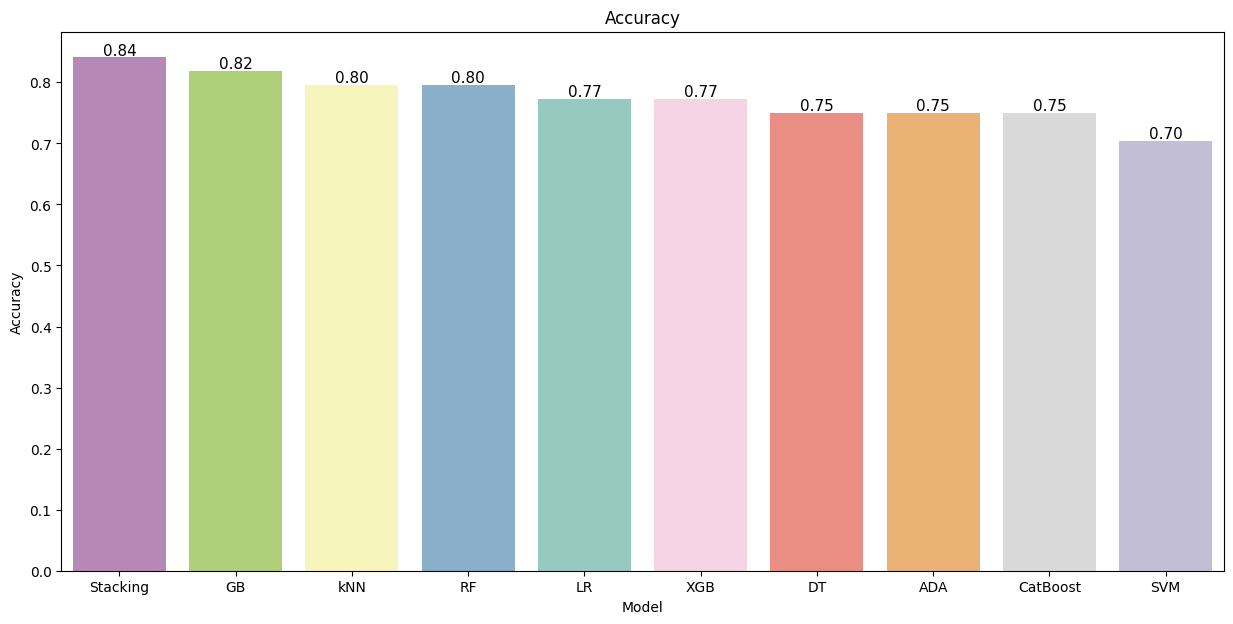

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

##F1 Score

In [ ]:
models = ['LR', 'kNN', 'SVM', 'DT', 'RF', 'ADA', 'GB', 'XGB', 'CatBoost', 'Stacking']
f1_scores = [lr_random_test_f1, knn_random_test_f1, svc_random_test_f1, dtc_random_test_f1, rfc_random_test_f1, ada_random_test_f1, gb_random_test_f1, xgb_random_test_f1, cat_random_test_f1, stack_random_test_f1]

models = pd.DataFrame({'Model': models, 'Score': f1_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
9  Stacking  0.862745
6        GB  0.846154
1       kNN  0.823529
4        RF  0.823529
7       XGB  0.807692
3        DT  0.784314
5       ADA  0.784314
0        LR  0.782609
8  CatBoost  0.775510
2       SVM  0.754717

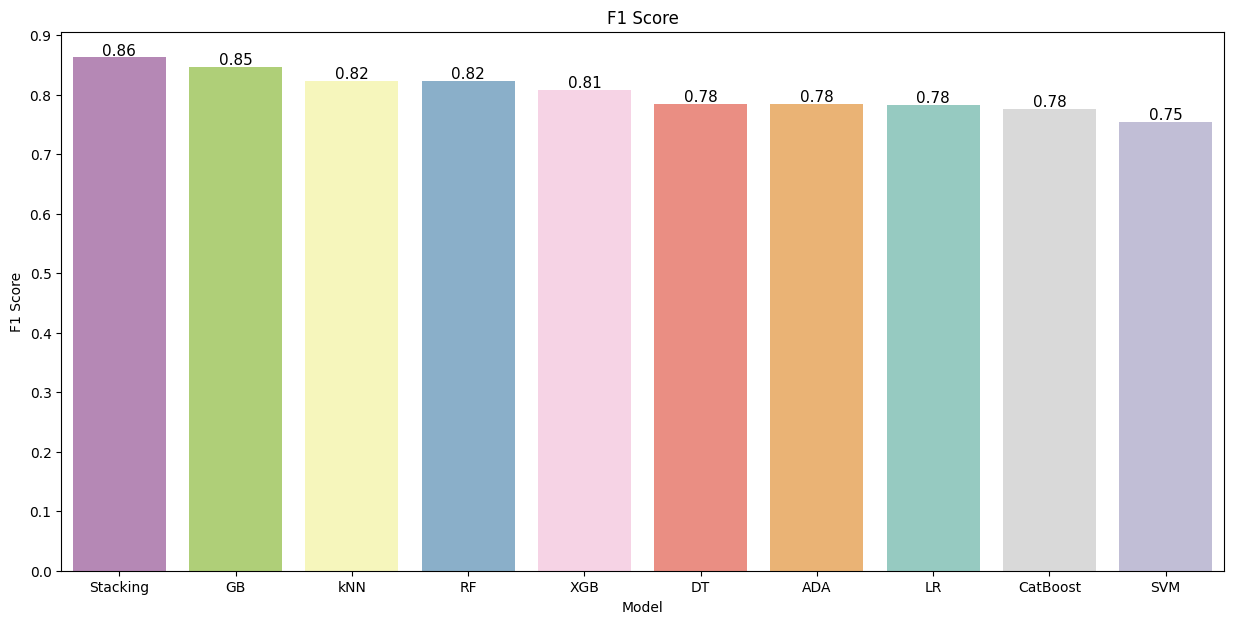

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.show()

##Recall Score

In [ ]:
models = ['LR', 'kNN', 'SVM', 'DT', 'RF', 'ADA', 'GB', 'XGB', 'CatBoost', 'Stacking']
recall_scores = [lr_random_test_rec, knn_random_test_rec, svc_random_test_rec, dtc_random_test_rec, rfc_random_test_rec, ada_random_test_rec, gb_random_test_rec, xgb_random_test_rec, cat_random_test_rec, stack_random_test_rec]

models = pd.DataFrame({'Model': models, 'Score': recall_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
6        GB  0.916667
9  Stacking  0.916667
1       kNN  0.875000
4        RF  0.875000
7       XGB  0.875000
2       SVM  0.833333
3        DT  0.833333
5       ADA  0.833333
8  CatBoost  0.791667
0        LR  0.750000

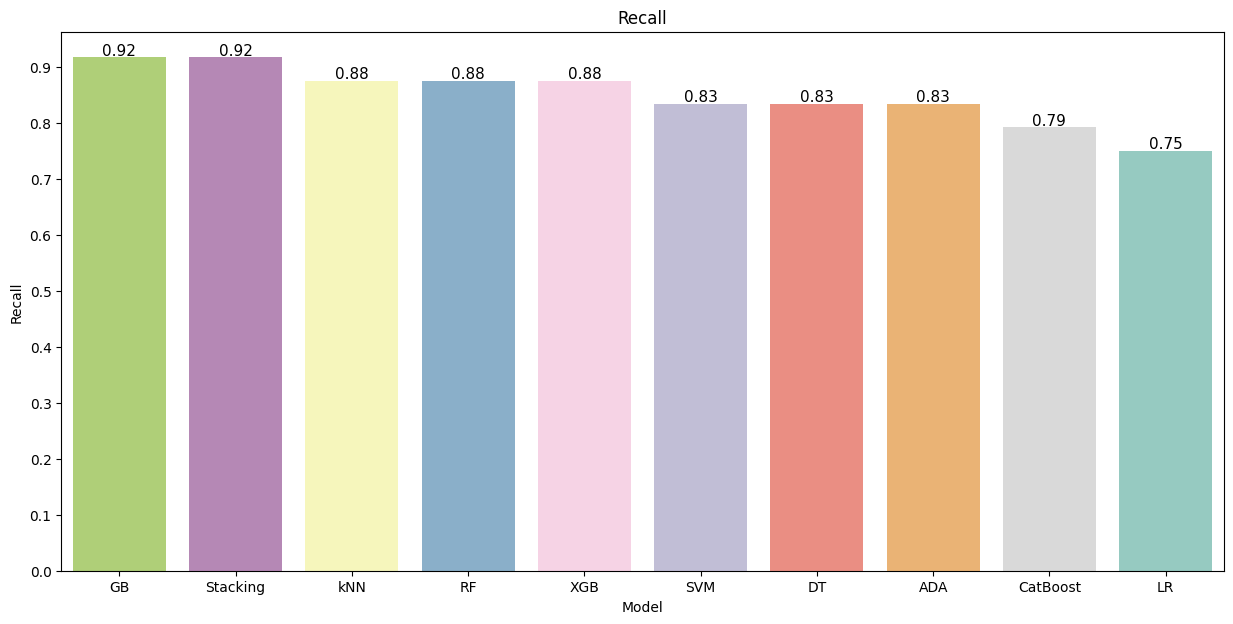

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall')
plt.show()

##Precision Score

In [ ]:
models = ['LR', 'kNN', 'SVM', 'DT', 'RF', 'ADA', 'GB', 'XGB', 'CatBoost', 'Stacking']
precision_scores = [lr_random_test_prec, knn_random_test_prec, svc_random_test_prec, dtc_random_test_prec, rfc_random_test_prec, ada_random_test_prec, gb_random_test_prec, xgb_random_test_prec, cat_random_test_prec, stack_random_test_prec]

models = pd.DataFrame({'Model': models, 'Score': precision_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
0        LR  0.818182
9  Stacking  0.814815
6        GB  0.785714
1       kNN  0.777778
4        RF  0.777778
8  CatBoost  0.760000
7       XGB  0.750000
3        DT  0.740741
5       ADA  0.740741
2       SVM  0.689655

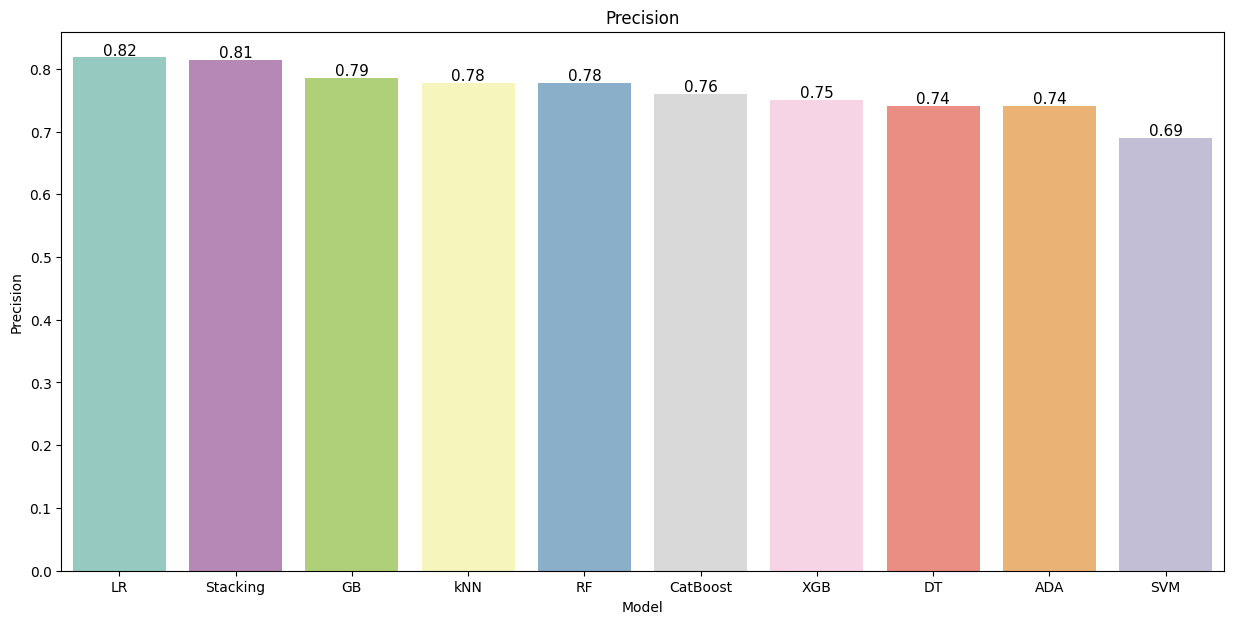

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision')
plt.show()

##Confusion matrix

In [ ]:
models = ['Logistic Regression', 'kNN', 'SVM', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost', 'Cat Boost', 'Stacking']
conf_mat = [lr_random_conf_matrix, knn_random_conf_matrix, svc_random_conf_matrix, dtc_random_conf_matrix, rfc_random_conf_matrix, ada_random_conf_matrix, gb_random_conf_matrix, xgb_random_conf_matrix, cat_random_conf_matrix, stack_random_conf_matrix]

scores = [sum(sum(matrix)) for matrix in conf_mat]

models = pd.DataFrame({'Model': models, 'Score': scores})

models.sort_values(by = 'Score', ascending = False)

Model  Score
0  Logistic Regression     44
1                  kNN     44
2                  SVM     44
3        Decision Tree     44
4        Random Forest     44
5            Ada Boost     44
6    Gradient Boosting     44
7              XGBoost     44
8            Cat Boost     44
9             Stacking     44

In [ ]:
conf_mat = {
      'Logistic Regression': [lr_random_conf_matrix],
      'kNN': [knn_random_conf_matrix],
      'SVM': [svc_random_conf_matrix],
      'Decision Tree': [dtc_random_conf_matrix],
      'Random Forest': [rfc_random_conf_matrix],
      'Ada Boost': [ada_random_conf_matrix],
      'Gradient Boosting': [gb_random_conf_matrix],
      'XGBoost': [xgb_random_conf_matrix],
      'Cat Boost': [cat_random_conf_matrix],
      'Stacking': [stack_random_conf_matrix]
}

df_conf_mat = pd.DataFrame(conf_mat)
df_conf_mat

Logistic Regression                 kNN                 SVM  \
0  [[16, 4], [6, 18]]  [[14, 6], [3, 21]]  [[11, 9], [4, 20]]   

        Decision Tree       Random Forest           Ada Boost  \
0  [[13, 7], [4, 20]]  [[14, 6], [3, 21]]  [[13, 7], [4, 20]]   

    Gradient Boosting             XGBoost           Cat Boost  \
0  [[14, 6], [2, 22]]  [[13, 7], [3, 21]]  [[14, 6], [5, 19]]   

             Stacking  
0  [[15, 5], [2, 22]]

# Grid Search

## Accuracy

In [ ]:
models = ['LR', 'kNN', 'SVM', 'DT', 'RF', 'ADA', 'GB', 'XGB', 'CatBoost', 'Stacking']
acc_scores = [lr_grid_train_acc, knn_grid_train_acc, svc_grid_train_acc, dtc_grid_train_acc, rfc_grid_train_acc, ada_grid_train_acc, gb_grid_train_acc, xgb_grid_train_acc, cat_grid_train_acc, stack_grid_train_acc]

models = pd.DataFrame({'Model': models, 'Score': acc_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
1       kNN  1.000000
3        DT  1.000000
9  Stacking  1.000000
4        RF  1.000000
8  CatBoost  1.000000
6        GB  1.000000
5       ADA  0.835227
2       SVM  0.826705
0        LR  0.758523
7       XGB  0.519886

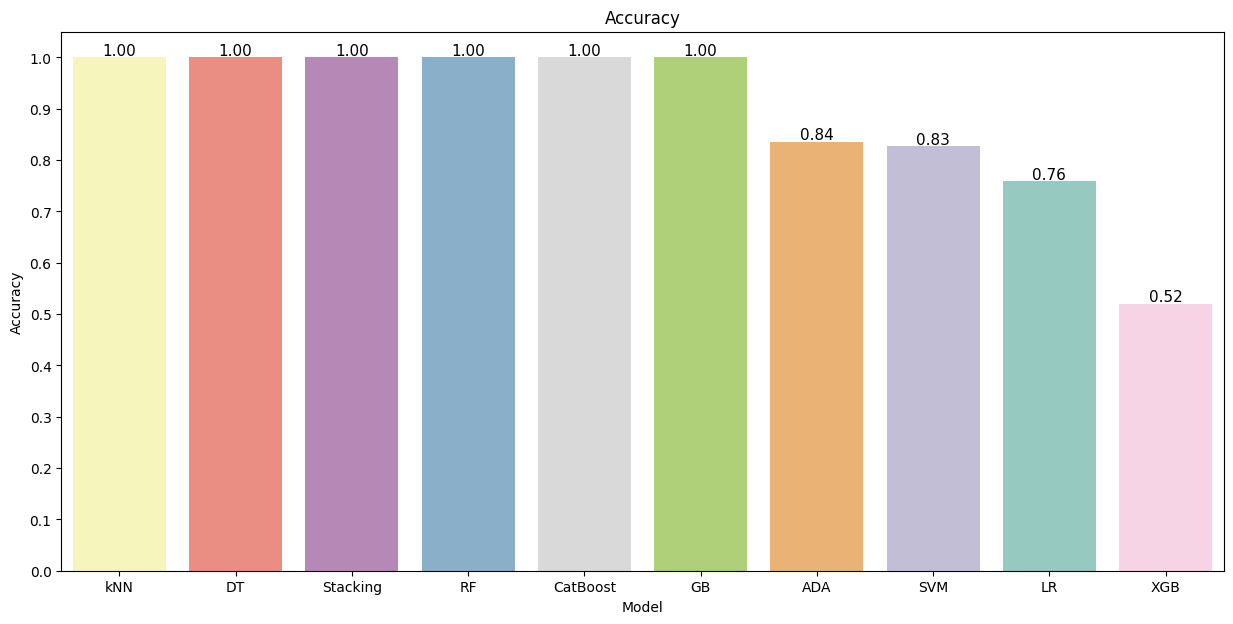

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

##F1 Score

In [ ]:
models = ['LR', 'kNN', 'SVM', 'DT', 'RF', 'ADA', 'GB', 'XGB', 'CatBoost', 'Stacking']
f1_scores = [lr_grid_train_f1, knn_grid_train_f1, svc_grid_train_f1, dtc_grid_train_f1, rfc_grid_train_f1, ada_grid_train_f1, gb_grid_train_f1, xgb_grid_train_f1, cat_grid_train_f1, stack_grid_train_f1]

models = pd.DataFrame({'Model': models, 'Score': f1_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
1       kNN  1.000000
3        DT  1.000000
9  Stacking  1.000000
4        RF  1.000000
8  CatBoost  1.000000
6        GB  1.000000
5       ADA  0.843243
2       SVM  0.836461
0        LR  0.769648
7       XGB  0.684112

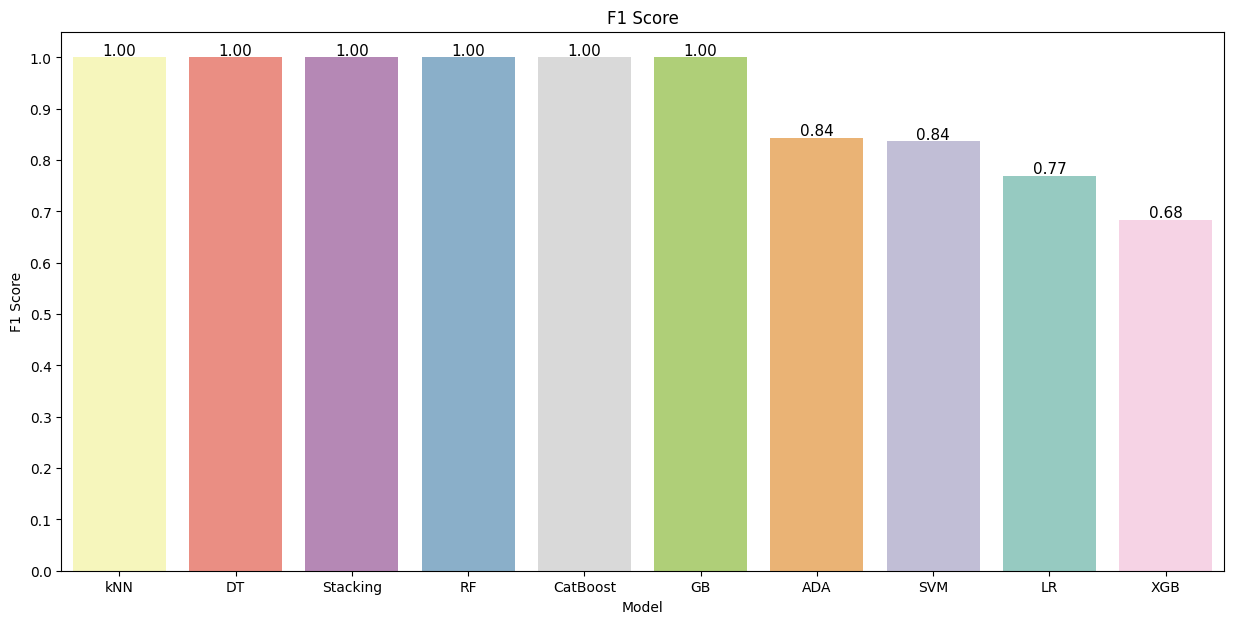

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.show()

##Recall Score

In [ ]:
models = ['LR', 'kNN', 'SVM', 'DT', 'RF', 'ADA', 'GB', 'XGB', 'CatBoost', 'Stacking']
recall_scores = [lr_grid_train_rec, knn_grid_train_rec, svc_grid_train_rec, dtc_grid_train_rec, rfc_grid_train_rec, ada_grid_train_rec, gb_grid_train_rec, xgb_grid_train_rec, cat_grid_train_rec, stack_grid_train_rec]

models = pd.DataFrame({'Model': models, 'Score': recall_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
1       kNN  1.000000
3        DT  1.000000
8  CatBoost  1.000000
4        RF  1.000000
7       XGB  1.000000
6        GB  1.000000
9  Stacking  1.000000
5       ADA  0.852459
2       SVM  0.852459
0        LR  0.775956

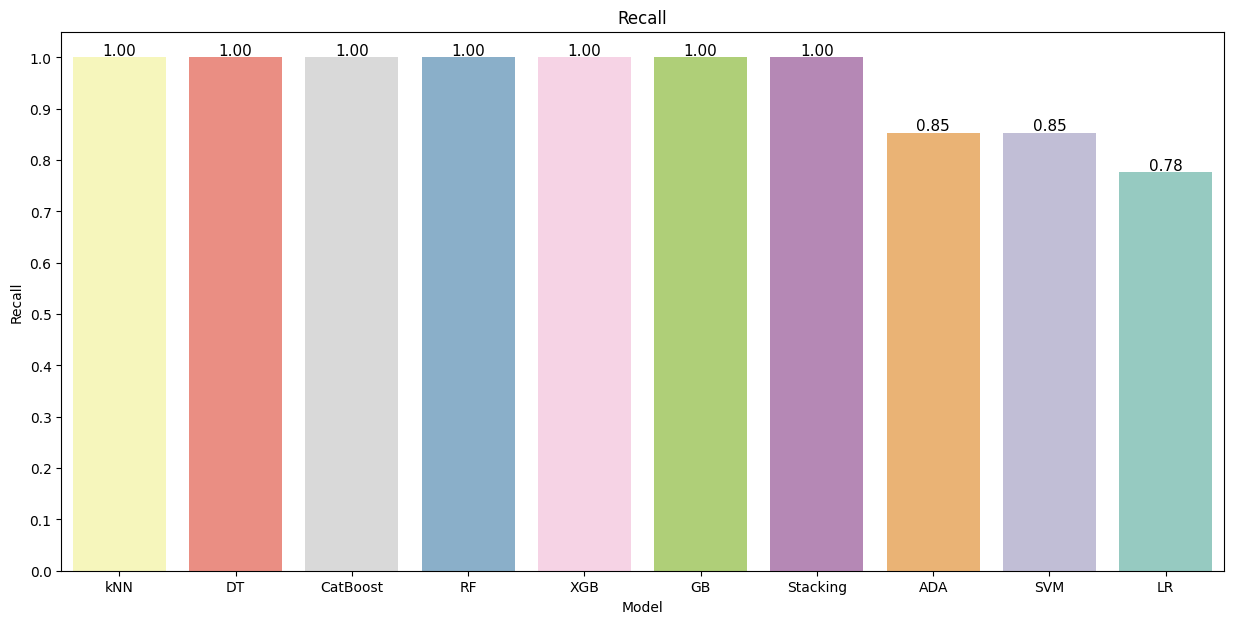

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall')
plt.show()

##Precision Score

In [ ]:
models = ['LR', 'kNN', 'SVM', 'DT', 'RF', 'ADA', 'GB', 'XGB', 'CatBoost', 'Stacking']
precision_scores = [lr_grid_train_prec, knn_grid_train_prec, svc_grid_train_prec, dtc_grid_train_prec, rfc_grid_train_prec, ada_grid_train_prec, gb_grid_train_prec, xgb_grid_train_prec, cat_grid_train_prec, stack_grid_train_prec]

models = pd.DataFrame({'Model': models, 'Score': precision_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
1       kNN  1.000000
3        DT  1.000000
9  Stacking  1.000000
4        RF  1.000000
8  CatBoost  1.000000
6        GB  1.000000
5       ADA  0.834225
2       SVM  0.821053
0        LR  0.763441
7       XGB  0.519886

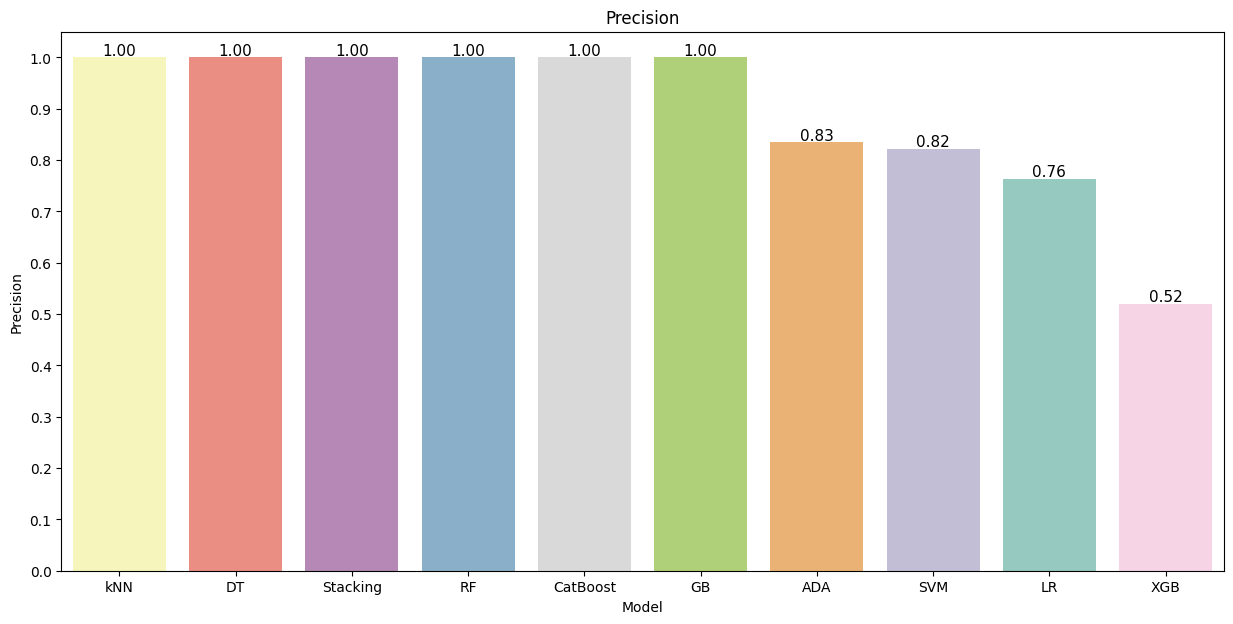

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision')
plt.show()

# Selected Model

## Accuracy


In [ ]:
models = ['kNN','RF','XGB','GB', 'Stacking']
acc_scores = [knn_random_test_acc, rfc_random_test_acc, xgb_random_test_acc, gb_random_test_acc, stack_random_test_acc]

models = pd.DataFrame({'Model': models, 'Score': acc_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Stacking  0.840909
3        GB  0.818182
0       kNN  0.795455
1        RF  0.795455
2       XGB  0.772727

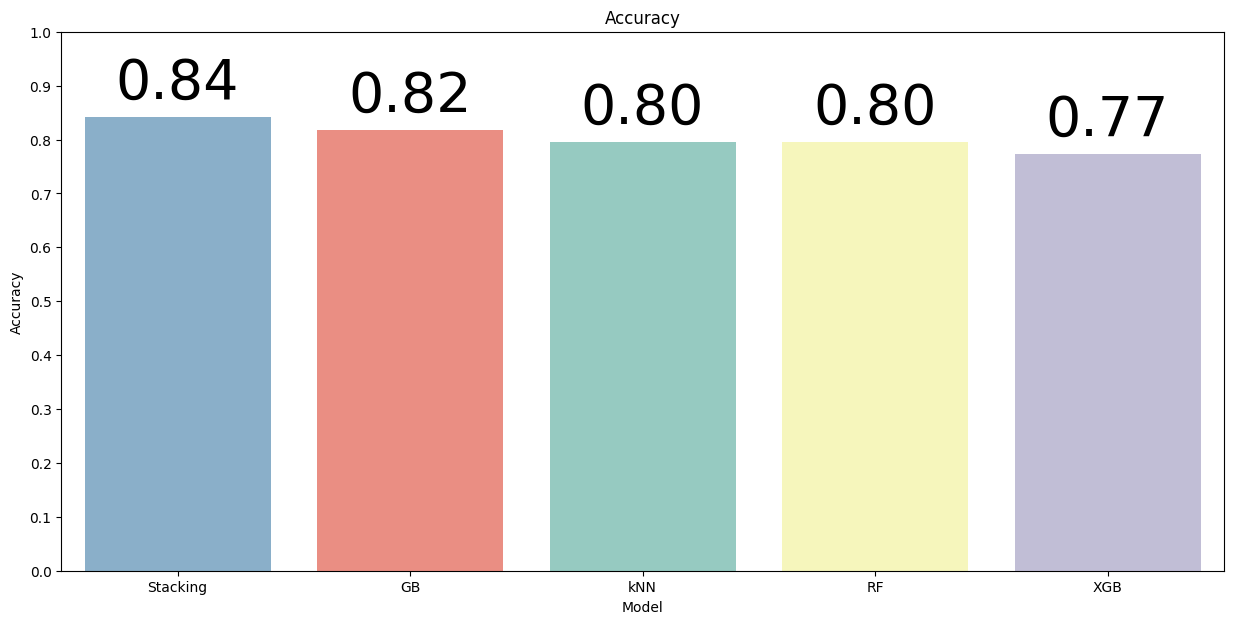

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', fontsize = 40, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_ylim(0, 1.0)

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

##F1 Score

In [ ]:
models = ['kNN','RF',  'XGB', 'GB', 'Stacking']
f1_scores = [knn_random_test_f1, rfc_random_test_f1, xgb_random_test_f1, gb_random_test_f1, stack_random_test_f1]

models = pd.DataFrame({'Model': models, 'Score': f1_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Stacking  0.867925
3        GB  0.846154
0       kNN  0.823529
1        RF  0.823529
2       XGB  0.807692

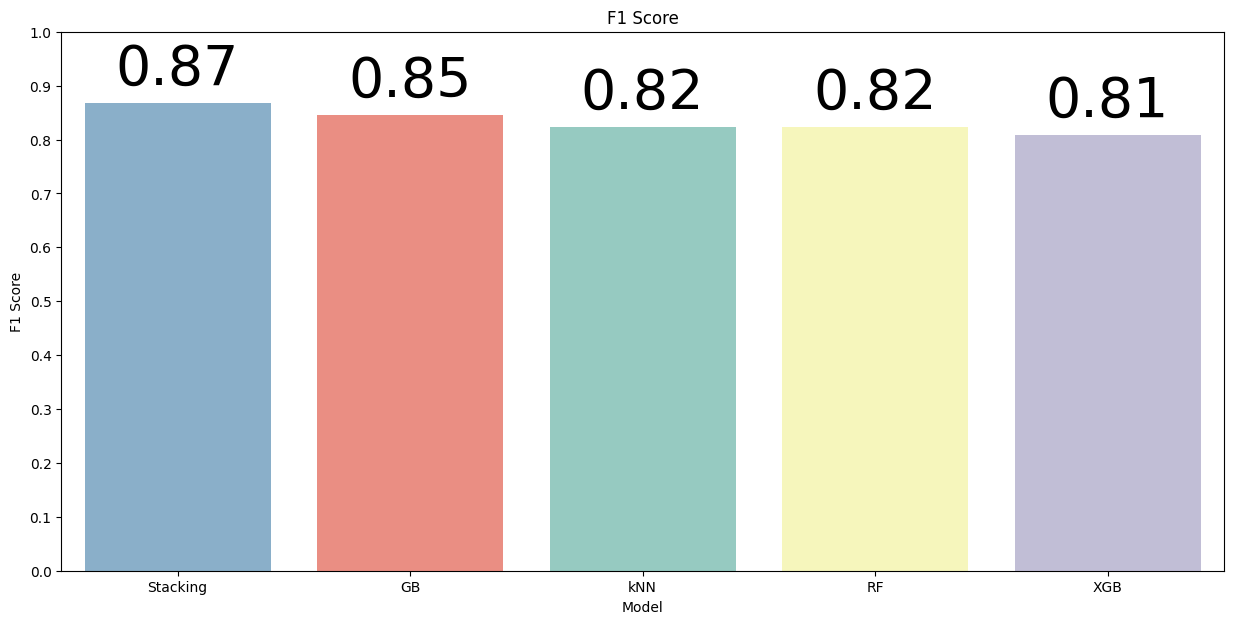

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', fontsize = 40, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_ylim(0, 1.0)

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.show()

##Recall Score

In [ ]:
models = ['kNN','RF','XGB', 'GB', 'Stacking']
recall_scores = [knn_random_test_rec,rfc_random_test_rec, xgb_random_test_rec, gb_random_test_rec, stack_random_test_rec]

models = pd.DataFrame({'Model': models, 'Score': recall_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Stacking  0.958333
3        GB  0.916667
0       kNN  0.875000
1        RF  0.875000
2       XGB  0.875000

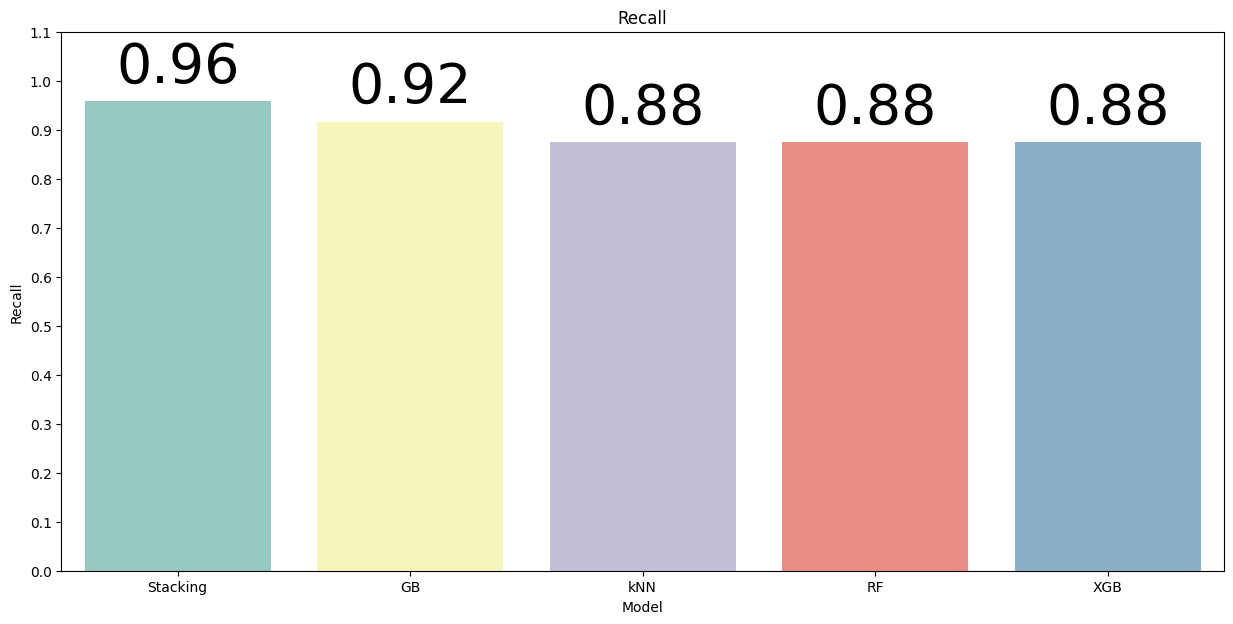

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', fontsize = 40, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_ylim(0, 1.1)

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall')
plt.show()

##Precision Score

In [ ]:
models = ['kNN', 'RF', 'XGB', 'GB', 'Stacking']
precision_scores = [knn_random_test_prec, rfc_random_test_prec, xgb_random_test_prec, gb_random_test_prec, stack_random_test_prec]

models = pd.DataFrame({'Model': models, 'Score': precision_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Stacking  0.793103
3        GB  0.785714
0       kNN  0.777778
1        RF  0.777778
2       XGB  0.750000

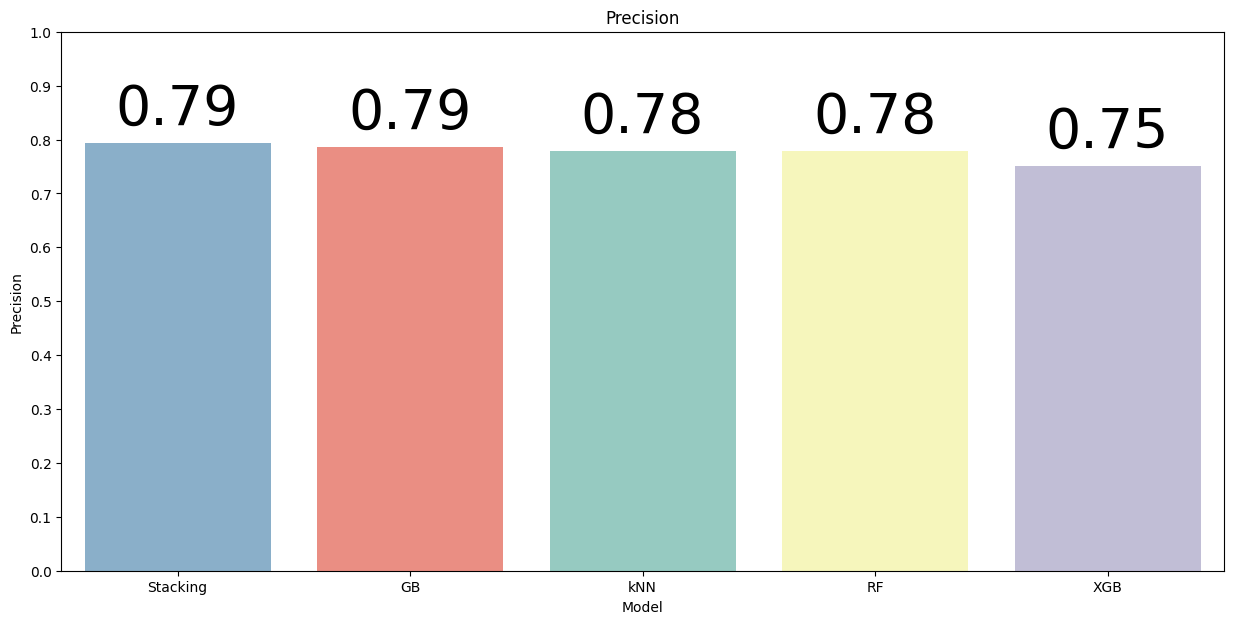

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', fontsize = 40, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_ylim(0, 1.0)

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision')
plt.show()

# Encryption

In [ ]:
!pip install phe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import phe

In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[677 rows x 9 columns]

In [ ]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0      35.000000  79.799479  33.6   
1            1     85.0           66.0      29.000000  79.799479  26.6   
2            8    183.0           64.0      20.536458  79.799479  23.3   
3            1     89.0           66.0      23.000000  94.000000  28.1   
5            5    116.0           74.0      20.536458  79.799479  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  


In [ ]:
pubkey, privkey = phe.generate_paillier_keypair()

In [ ]:
def encrypt_data(data, pubkey):
  return[pubkey.encrypt(x) for x in data]

In [ ]:
X_train_encrypted = [encrypt_data(row.tolist(), pubkey) for row in X_train]
y_train_encrypted = encrypt_data(y_train, pubkey)
X_val_encrypted = [encrypt_data(row.tolist(), pubkey) for row in X_val]
y_val_encrypted = encrypt_data(y_val, pubkey)
X_test_encrypted = [encrypt_data(row.tolist(), pubkey) for row in X_test]
y_test_encrypted = encrypt_data(y_test, pubkey)

In [ ]:
#X_encrypted = [encrypt_data(row.tolist(), pubkey) for _, row in X_rus.iterrows()]
#y_encrypted = encrypt_data(y_rus, pubkey)

In [ ]:
#X_train, X_temp, y_train, y_temp = train_test_split(X_encrypted, y_encrypted, test_size = 0.2, random_state = 42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
len(X_train_encrypted), len(X_val_encrypted), len(X_test_encrypted), len(y_train_encrypted), len(y_val_encrypted), len(y_test_encrypted)

(352, 44, 44, 352, 44, 44)

In [ ]:
X_train_encrypted[0], y_train_encrypted[0], X_val_encrypted[0], y_val_encrypted[0], X_test_encrypted[0], y_test_encrypted[0]

([<phe.paillier.EncryptedNumber at 0x7b306a3c6140>,
 <phe.paillier.EncryptedNumber at 0x7b306a343160>)

In [ ]:
def decrypt_data(data_list, privkey):
  decrypted_data = []
  for encrypted_number in data_list:
    if isinstance(encrypted_number, list):
      decrypted_data.append([privkey.decrypt(enc_num) for enc_num in encrypted_number])
    else:
      decrypted_data.append(privkey.decrypt(encrypted_number))
  return decrypted_data

In [ ]:
X_train_decrypted = decrypt_data(X_train_encrypted, privkey)
y_train_decrypted = decrypt_data(y_train_encrypted, privkey)
#y_train_decrypted = [item for sublist in y_train_decrypted for item in sublist]

In [ ]:
X_val_decrypted = decrypt_data(X_val_encrypted, privkey)
y_val_decrypted = decrypt_data(y_val_encrypted, privkey)
#y_val_decrypted = [item for sublist in y_val_decrypted for item in sublist]

In [ ]:
X_test_decrypted = decrypt_data(X_test_encrypted, privkey)
y_test_decrypted = decrypt_data(y_test_encrypted, privkey)
#y_test_decrypted = [item for sublist in y_test_decrypted for item in sublist]

In [ ]:
X_train_decrypted[0], y_train_decrypted[0], X_val_decrypted[0], y_val_decrypted[0], X_test_decrypted[0], y_test_decrypted[0]

([0.679642292517968,
  0.31253248054722416,
  -0.1665949237240549,
  -0.3669695304580076,
  0.5219914464907817,
  0.454513230854639,
  0.2509385118177471,
  -0.3893397391328159],
 1,
 [-0.8921979635025623,
  -0.24991414894198966,
  1.412556369246229,
  -0.25388077516192176,
  0.8221336970693833,
  0.3099225974612808,
  -0.21399330832079907,
  0.6347930529339394],
 1,
 [0.36527424131386194,
  -0.41533962820352316,
  -0.5175174332730069,
  -0.6455683911613859,
  -0.4824950403848617,
  0.8400882532369278,
  -0.6889596281745657,
  0.7278960340309172],
 1)

In [ ]:
X_train[:1], y_train[:1], X_val[:1], y_val[:1], X_test[:1], y_test[:1]

(array([[ 0.67964229,  0.31253248, -0.16659492, -0.36696953,  0.52199145,
          0.45451323,  0.25093851, -0.38933974]]),
 266    1
 Name: Outcome, dtype: int64,
 array([[-0.89219796, -0.24991415,  1.41255637, -0.25388078,  0.8221337 ,
          0.3099226 , -0.21399331,  0.63479305]]),
 255    1
 Name: Outcome, dtype: int64,
 array([[ 0.36527424, -0.41533963, -0.51751743, -0.64556839, -0.48249504,
          0.84008825, -0.68895963,  0.72789603]]),
 284    1
 Name: Outcome, dtype: int64)

In [ ]:
X_rus[:15]

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0             3    111.0           90.0      12.000000   78.000000  28.4   
1             0    141.0           84.0      26.000000   79.799479  32.4   
2             6    109.0           60.0      27.000000   79.799479  25.0   
3             0    137.0           70.0      38.000000   79.799479  33.2   
4             6     85.0           78.0      20.536458   79.799479  31.2   
5             6    111.0           64.0      39.000000   79.799479  34.2   
6             0    165.0           76.0      43.000000  255.000000  47.9   
7             7    159.0           64.0      20.536458   79.799479  27.4   
8             3    111.0           90.0      12.000000   78.000000  28.4   
9             6    103.0           72.0      32.000000  190.000000  37.7   
10            1     87.0           60.0      37.000000   75.000000  37.2   
11            1     97.0           70.0      40.000000   79.799479  38.1   
12            2    106.0           64.0      35.000000  119.000000  30.5   
13            0     94.0           70.0      27.000000  115.000000  43.5   
14            3    148.0           66.0      25.000000   79.799479  32.5   

    DiabetesPedigreeFunction  Age  
0                      0.495   29  
1                      0.433   22  
2                      0.206   27  
3                      0.170   22  
4                      0.382   42  
5                      0.260   24  
6                      0.259   26  
7                      0.294   40  
8                      0.495   29  
9                      0.324   55  
10                     0.509   22  
11                     0.218   30  
12                     1.400   34  
13                     0.347   21  
14                     0.256   22

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

gb_decrypted_model = GradientBoostingClassifier(learning_rate = 0.004,
                                             max_depth = 83,
                                             max_features = 'log2',
                                             min_samples_leaf = 4,
                                             min_samples_split = 10,
                                             n_estimators = 300)
gb_decrypted_model = gb_decrypted_model.fit(X_train_decrypted, y_train_decrypted)
y_pred = gb_decrypted_model.predict(X_test_decrypted)

gb_decrypted_train_acc = accuracy_score(y_train_decrypted, gb_decrypted_model.predict(X_train_decrypted))
gb_decrypted_test_acc = accuracy_score(y_test_decrypted, y_pred)
gb_decrypted_train_prec = precision_score(y_train_decrypted, gb_decrypted_model.predict(X_train_decrypted))
gb_decrypted_test_prec = precision_score(y_test_decrypted, y_pred)
gb_decrypted_train_rec = recall_score(y_train_decrypted, gb_decrypted_model.predict(X_train_decrypted))
gb_decrypted_test_rec = recall_score(y_test_decrypted, y_pred)
gb_decrypted_train_f1 = f1_score(y_train_decrypted, gb_decrypted_model.predict(X_train_decrypted))
gb_decrypted_test_f1 = f1_score(y_test_decrypted, y_pred)

gb_decrypted_conf_matrix = confusion_matrix(y_test_decrypted, y_pred)
gb_decrypted_patient_accuracies_decrypted = gb_decrypted_conf_matrix.diagonal() / gb_decrypted_conf_matrix.sum(axis = 1)
for i, acc in enumerate(gb_decrypted_patient_accuracies_decrypted):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

gb_decrypted_average_patient_accuracy = gb_decrypted_patient_accuracies_decrypted.mean()
print(f'Average Patient-Level Accuracy: {gb_decrypted_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test_decrypted, y_pred))
print(f'Training acc: {gb_decrypted_train_acc:.2%} | Testing acc: {gb_decrypted_test_acc:.2%}')
print(f'Training precision: {gb_decrypted_train_prec:.2%} | Testing precision: {gb_decrypted_test_prec:.2%}')
print(f'Training recall: {gb_decrypted_train_rec:.2%} | Testing recall: {gb_decrypted_test_rec:.2%}')
print(f'Training F1 score: {gb_decrypted_train_f1:.2%} | Testing F1 score: {gb_decrypted_test_f1:.2%}')
confusion_matrix(y_test_decrypted, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 91.67%
Average Patient-Level Accuracy: 80.83%

               precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.79      0.92      0.85        24

    accuracy                           0.82        44
   macro avg       0.83      0.81      0.81        44
weighted avg       0.83      0.82      0.82        44

Training acc: 99.72% | Testing acc: 81.82%
Training precision: 100.00% | Testing precision: 78.57%
Training recall: 99.45% | Testing recall: 91.67%
Training F1 score: 99.73% | Testing F1 score: 84.62%


array([[14,  6],
       [ 2, 22]])

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_decrypted_model = KNeighborsClassifier(metric = 'euclidean',
                                        n_neighbors = 10,
                                        weights = 'distance')
knn_decrypted_model = knn_decrypted_model.fit(X_train_decrypted, y_train_decrypted)
y_pred = knn_decrypted_model.predict(X_test_decrypted)

knn_decrypted_train_acc = accuracy_score(y_train_decrypted, knn_decrypted_model.predict(X_train_decrypted))
knn_decrypted_test_acc = accuracy_score(y_test_decrypted, y_pred)
knn_decrypted_train_prec = precision_score(y_train_decrypted, knn_decrypted_model.predict(X_train_decrypted))
knn_decrypted_test_prec = precision_score(y_test_decrypted, y_pred)
knn_decrypted_train_rec = recall_score(y_train_decrypted, knn_decrypted_model.predict(X_train_decrypted))
knn_decrypted_test_rec = recall_score(y_test_decrypted, y_pred)
knn_decrypted_train_f1 = f1_score(y_train_decrypted, knn_decrypted_model.predict(X_train_decrypted))
knn_decrypted_test_f1 = f1_score(y_test_decrypted, y_pred)

knn_decrypted_conf_matrix = confusion_matrix(y_test_decrypted, y_pred)
knn_decrypted_patient_accuracies = knn_decrypted_conf_matrix.diagonal() / knn_decrypted_conf_matrix.sum(axis = 1)
for i, acc in enumerate(knn_decrypted_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

knn_decrypted_average_patient_accuracy = knn_decrypted_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {knn_decrypted_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test_decrypted, y_pred))
print(f'Training acc: {knn_decrypted_train_acc:.2%} | Testing acc: {knn_decrypted_test_acc:.2%}')
print(f'Training precision: {knn_decrypted_train_prec:.2%} | Testing precision: {knn_decrypted_test_prec:.2%}')
print(f'Training recall: {knn_decrypted_train_rec:.2%} | Testing recall: {knn_decrypted_test_rec:.2%}')
print(f'Training F1 score: {knn_decrypted_train_f1:.2%} | Testing F1 score: {knn_decrypted_test_f1:.2%}')
confusion_matrix(y_test_decrypted, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 78.75%

               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.78      0.88      0.82        24

    accuracy                           0.80        44
   macro avg       0.80      0.79      0.79        44
weighted avg       0.80      0.80      0.79        44

Training acc: 100.00% | Testing acc: 79.55%
Training precision: 100.00% | Testing precision: 77.78%
Training recall: 100.00% | Testing recall: 87.50%
Training F1 score: 100.00% | Testing F1 score: 82.35%


array([[14,  6],
       [ 3, 21]])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_decrypted_model = RandomForestClassifier(bootstrap = True,
                                          max_depth = 70,
                                          max_features = 'auto',
                                          min_samples_leaf = 1,
                                          min_samples_split = 5,
                                          n_estimators = 1200)
rfc_decrypted_model = rfc_decrypted_model.fit(X_train_decrypted, y_train_decrypted)
y_pred = rfc_decrypted_model.predict(X_test_decrypted)

rfc_decrypted_train_acc = accuracy_score(y_train_decrypted, rfc_decrypted_model.predict(X_train_decrypted))
rfc_decrypted_test_acc = accuracy_score(y_test_decrypted, y_pred)
rfc_decrypted_train_prec = precision_score(y_train_decrypted, rfc_decrypted_model.predict(X_train_decrypted))
rfc_decrypted_test_prec = precision_score(y_test_decrypted, y_pred)
rfc_decrypted_train_rec = recall_score(y_train_decrypted, rfc_decrypted_model.predict(X_train_decrypted))
rfc_decrypted_test_rec = recall_score(y_test_decrypted, y_pred)
rfc_decrypted_train_f1 = f1_score(y_train_decrypted, rfc_decrypted_model.predict(X_train_decrypted))
rfc_decrypted_test_f1 = f1_score(y_test_decrypted, y_pred)

rfc_decrypted_conf_matrix = confusion_matrix(y_test_decrypted, y_pred)
rfc_decrypted_patient_accuracies_decrypted = rfc_decrypted_conf_matrix.diagonal() / rfc_decrypted_conf_matrix.sum(axis = 1)
for i, acc in enumerate(rfc_decrypted_patient_accuracies_decrypted):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

rfc_decrypted_average_patient_accuracy = rfc_decrypted_patient_accuracies_decrypted.mean()
print(f'Average Patient-Level Accuracy: {rfc_decrypted_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test_decrypted, y_pred))
print(f'Training acc: {rfc_decrypted_train_acc:.2%} | Testing acc: {rfc_decrypted_test_acc:.2%}')
print(f'Training precision: {rfc_decrypted_train_prec:.2%} | Testing precision: {rfc_decrypted_test_prec:.2%}')
print(f'Training recall: {rfc_decrypted_train_rec:.2%} | Testing recall: {rfc_decrypted_test_rec:.2%}')
print(f'Training F1 score: {rfc_decrypted_train_f1:.2%} | Testing F1 score: {rfc_decrypted_test_f1:.2%}')
confusion_matrix(y_test_decrypted, y_pred)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 78.75%

               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.78      0.88      0.82        24

    accuracy                           0.80        44
   macro avg       0.80      0.79      0.79        44
weighted avg       0.80      0.80      0.79        44

Training acc: 99.43% | Testing acc: 79.55%
Training precision: 99.45% | Testing precision: 77.78%
Training recall: 99.45% | Testing recall: 87.50%
Training F1 score: 99.45% | Testing F1 score: 82.35%


array([[14,  6],
       [ 3, 21]])

## Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

xgb_decrypted_model = XGBClassifier(colsample_bytree = 0,
                                 gamma = 2,
                                 learning_rate = 0.035,
                                 max_depth = 4,
                                 min_child_weight = 5,
                                 n_serimators = 100,
                                 subsample = 0.48)
xgb_decrypted_model = xgb_decrypted_model.fit(X_train_decrypted, y_train_decrypted)
y_pred = xgb_decrypted_model.predict(X_test_decrypted)

xgb_decrypted_train_acc = accuracy_score(y_train_decrypted, xgb_decrypted_model.predict(X_train_decrypted))
xgb_decrypted_test_acc = accuracy_score(y_test_decrypted, y_pred)
xgb_decrypted_train_prec = precision_score(y_train_decrypted, xgb_decrypted_model.predict(X_train_decrypted))
xgb_decrypted_test_prec = precision_score(y_test_decrypted, y_pred)
xgb_decrypted_train_rec = recall_score(y_train_decrypted, xgb_decrypted_model.predict(X_train_decrypted))
xgb_decrypted_test_rec = recall_score(y_test_decrypted, y_pred)
xgb_decrypted_train_f1 = f1_score(y_train_decrypted, xgb_decrypted_model.predict(X_train_decrypted))
xgb_decrypted_test_f1 = f1_score(y_test_decrypted, y_pred)

xgb_decrypted_conf_matrix = confusion_matrix(y_test_decrypted, y_pred)
xgb_decrypted_patient_accuracies_decrypted = xgb_decrypted_conf_matrix.diagonal() / xgb_decrypted_conf_matrix.sum(axis = 1)
for i, acc in enumerate(xgb_decrypted_patient_accuracies_decrypted):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

xgb_decrypted_average_patient_accuracy = xgb_decrypted_patient_accuracies_decrypted.mean()
print(f'Average Patient-Level Accuracy: {xgb_decrypted_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test_decrypted, y_pred))
print(f'Training acc: {xgb_decrypted_train_acc:.2%} | Testing acc: {xgb_decrypted_test_acc:.2%}')
print(f'Training precision: {xgb_decrypted_train_prec:.2%} | Testing precision: {xgb_decrypted_test_prec:.2%}')
print(f'Training recall: {xgb_decrypted_train_rec:.2%} | Testing recall: {xgb_decrypted_test_rec:.2%}')
print(f'Training F1 score: {xgb_decrypted_train_f1:.2%} | Testing F1 score: {xgb_decrypted_test_f1:.2%}')
confusion_matrix(y_test_decrypted, y_pred)

Patient 1 Accuracy: 65.00%
Patient 2 Accuracy: 87.50%
Average Patient-Level Accuracy: 76.25%

               precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.75      0.88      0.81        24

    accuracy                           0.77        44
   macro avg       0.78      0.76      0.76        44
weighted avg       0.78      0.77      0.77        44

Training acc: 80.97% | Testing acc: 77.27%
Training precision: 78.43% | Testing precision: 75.00%
Training recall: 87.43% | Testing recall: 87.50%
Training F1 score: 82.69% | Testing F1 score: 80.77%


array([[13,  7],
       [ 3, 21]])

## Stacking

In [ ]:
gb_decrypted_model = GradientBoostingClassifier(learning_rate = 0.004,
                                             max_depth = 83,
                                             max_features = 'log2',
                                             min_samples_leaf = 4,
                                             min_samples_split = 10,
                                             n_estimators = 300)
gb_decrypted_model.fit(X_train_decrypted, y_train_decrypted)

GradientBoostingClassifier(learning_rate=0.004, max_depth=83,
                           max_features='log2', min_samples_leaf=4,
                           min_samples_split=10, n_estimators=300)

In [ ]:
knn_decrypted_model = KNeighborsClassifier(metric = 'euclidean',
                                        n_neighbors = 10,
                                        weights = 'distance')
knn_decrypted_model.fit(X_train_decrypted, y_train_decrypted)

KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [ ]:
random_predict_train1 = gb_decrypted_model.predict(X_train_decrypted)
random_predict_train2 = knn_decrypted_model.predict(X_train_decrypted)
random_predict_train = np.column_stack((random_predict_train1, random_predict_train2))

In [ ]:
random_predict_val1 = gb_decrypted_model.predict(X_val_decrypted)
random_predict_val2 = knn_decrypted_model.predict(X_val_decrypted)
random_predict_val = np.column_stack((random_predict_val1, random_predict_val2))

In [ ]:
random_predict_test1 = gb_decrypted_model.predict(X_test_decrypted)
random_predict_test2 = knn_decrypted_model.predict(X_test_decrypted)
random_predict_test = np.column_stack((random_predict_test1, random_predict_test2))

In [ ]:
from sklearn.metrics import confusion_matrix

stack_decrypted_model = RandomForestClassifier(bootstrap = False,
                                            max_depth = 70,
                                            max_features = 'sqrt',
                                            min_samples_leaf = 1,
                                            min_samples_split = 10,
                                            n_estimators = 1000)
stack_decrypted_model = stack_decrypted_model.fit(random_predict_test, y_test_decrypted)
random_predict_test = stack_decrypted_model.predict(random_predict_test)

stack_decrypted_train_acc = accuracy_score(y_train_decrypted, stack_decrypted_model.predict(random_predict_train))
stack_decrypted_test_acc = accuracy_score(y_test_decrypted, random_predict_test)
stack_decrypted_train_prec = precision_score(y_train_decrypted, stack_decrypted_model.predict(random_predict_train))
stack_decrypted_test_prec = precision_score(y_test_decrypted, random_predict_test)
stack_decrypted_train_rec = recall_score(y_train_decrypted, stack_decrypted_model.predict(random_predict_train))
stack_decrypted_test_rec = recall_score(y_test_decrypted, random_predict_test)
stack_decrypted_train_f1 = f1_score(y_train_decrypted, stack_decrypted_model.predict(random_predict_train))
stack_decrypted_test_f1 = f1_score(y_test_decrypted, random_predict_test)

stack_decrypted_conf_matrix = confusion_matrix(y_test_decrypted, random_predict_test)
stack_decrypted_patient_accuracies = stack_decrypted_conf_matrix.diagonal() / stack_decrypted_conf_matrix.sum(axis = 1)
for i, acc in enumerate(stack_decrypted_patient_accuracies):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

stack_decrypted_average_patient_accuracy = stack_decrypted_patient_accuracies.mean()
print(f'Average Patient-Level Accuracy: {stack_decrypted_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test_decrypted, random_predict_test))
print(f'Training acc: {stack_decrypted_train_acc:.2%} | Testing acc: {stack_decrypted_test_acc:.2%}')
print(f'Training precision: {stack_decrypted_train_prec:.2%} | Testing precision: {stack_decrypted_test_prec:.2%}')
print(f'Training recall: {stack_decrypted_train_rec:.2%} | Testing recall: {stack_decrypted_test_rec:.2%}')
print(f'Training F1 score: {stack_decrypted_train_f1:.2%} | Testing F1 score: {stack_decrypted_test_f1:.2%}')
confusion_matrix(y_test_decrypted, random_predict_test)

Patient 1 Accuracy: 70.00%
Patient 2 Accuracy: 95.83%
Average Patient-Level Accuracy: 82.92%

               precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.79      0.96      0.87        24

    accuracy                           0.84        44
   macro avg       0.86      0.83      0.83        44
weighted avg       0.86      0.84      0.84        44

Training acc: 99.72% | Testing acc: 84.09%
Training precision: 99.46% | Testing precision: 79.31%
Training recall: 100.00% | Testing recall: 95.83%
Training F1 score: 99.73% | Testing F1 score: 86.79%


array([[14,  6],
       [ 1, 23]])

# Comparison between models after encryption

## Accuracy

In [ ]:
models = ['kNN', 'RF', 'XGB', 'GB', 'Stacking']
acc_scores = [knn_decrypted_test_acc, rfc_decrypted_test_acc, xgb_decrypted_test_acc, gb_decrypted_test_acc, stack_decrypted_test_acc]

models = pd.DataFrame({'Model': models, 'Score': acc_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Stacking  0.840909
3        GB  0.818182
0       kNN  0.795455
1        RF  0.795455
2       XGB  0.772727

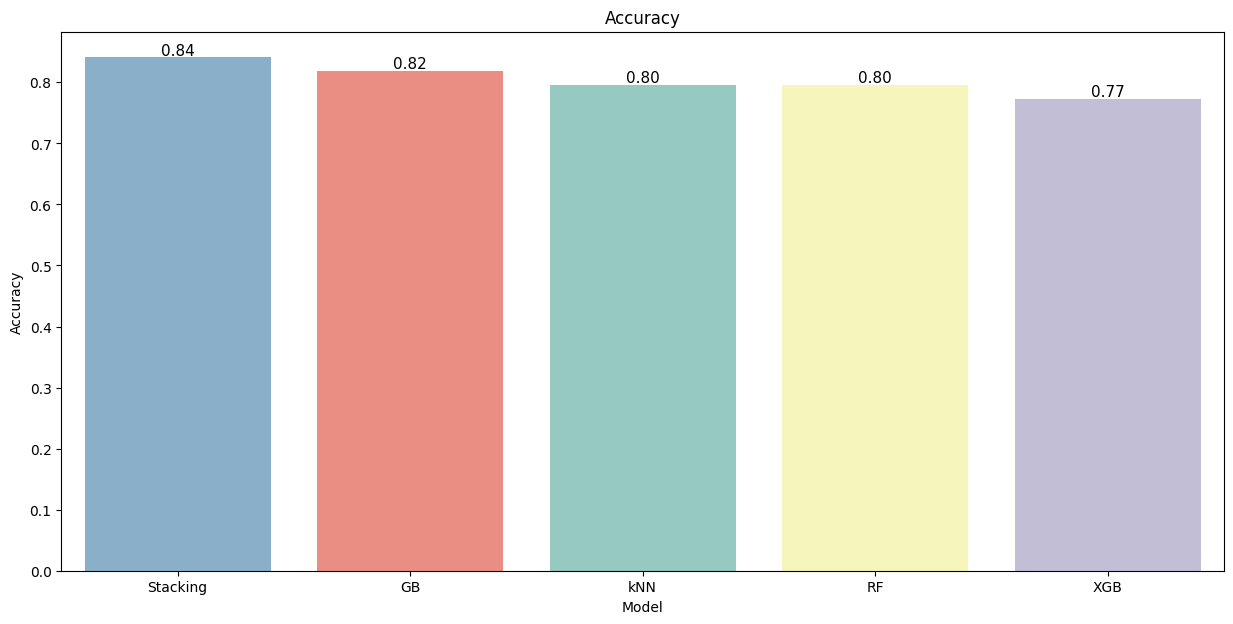

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

## F1 Score

In [ ]:
models = ['kNN', 'RF', 'XGB', 'GB', 'Stacking']
f1_scores = [knn_decrypted_test_f1, rfc_decrypted_test_f1, xgb_decrypted_test_f1, gb_decrypted_test_f1, stack_decrypted_test_f1]

models = pd.DataFrame({'Model': models, 'Score': f1_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Stacking  0.867925
3        GB  0.846154
0       kNN  0.823529
1        RF  0.823529
2       XGB  0.807692

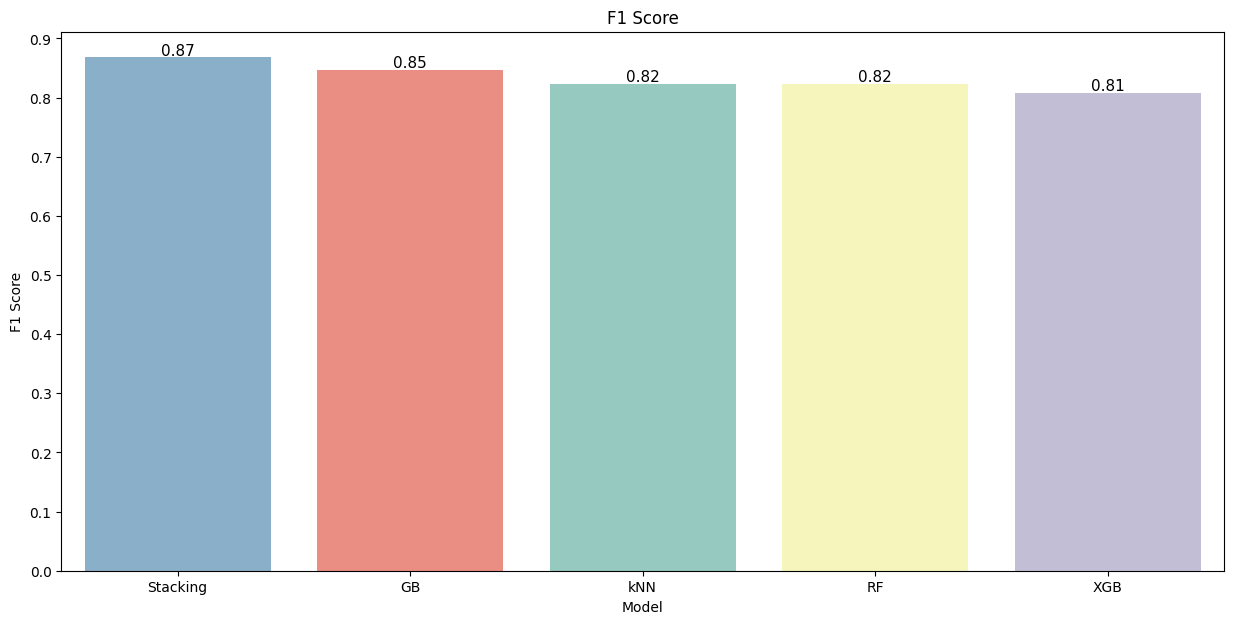

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.show()

## Recall Score

In [ ]:
models = ['kNN', 'RF', 'XGB', 'GB', 'Stacking']
recall_scores = [knn_decrypted_test_rec, rfc_decrypted_test_rec, xgb_decrypted_test_rec, gb_decrypted_test_rec, stack_decrypted_test_rec]

models = pd.DataFrame({'Model': models, 'Score': recall_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Stacking  0.958333
3        GB  0.916667
0       kNN  0.875000
1        RF  0.875000
2       XGB  0.875000

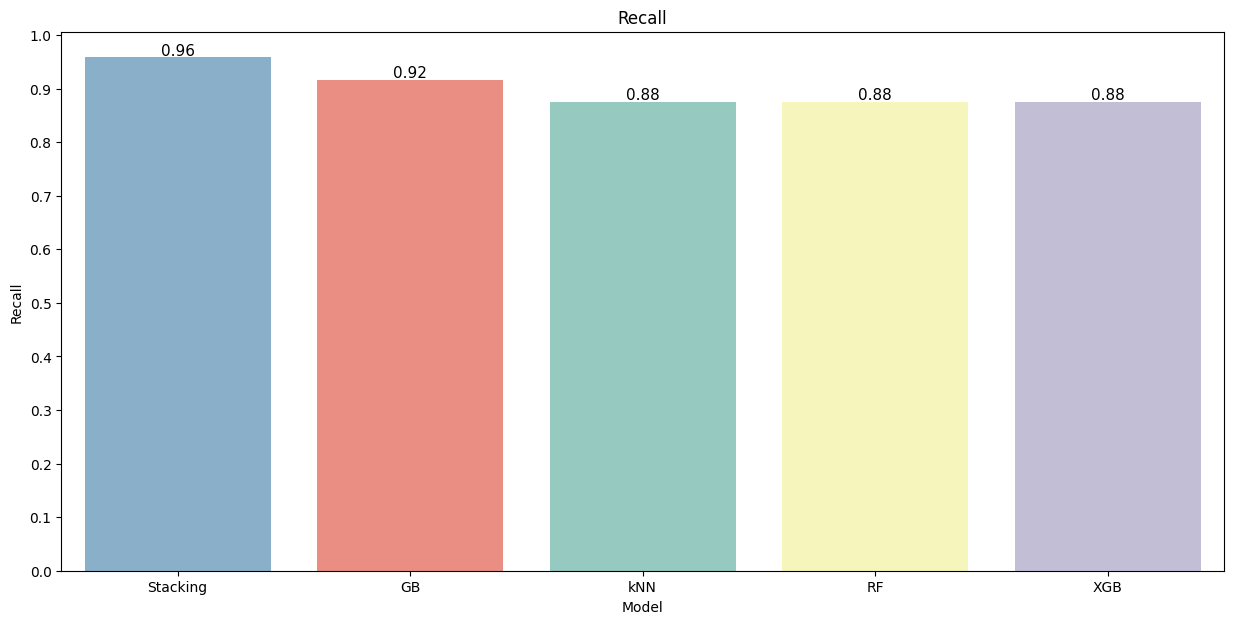

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

ax.set_yticks([i * 0.1 for i in range(int(ax.get_ylim()[1]/0.1) + 1)])

plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall')
plt.show()

## Precision Score

In [ ]:
models = ['kNN', 'RF', 'XGB', 'GB', 'Stacking']
prec_scores = [knn_decrypted_test_prec, rfc_decrypted_test_prec, xgb_decrypted_test_prec, gb_decrypted_test_prec, stack_decrypted_test_prec]

models = pd.DataFrame({'Model': models, 'Score': prec_scores})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Stacking  0.793103
3        GB  0.785714
0       kNN  0.777778
1        RF  0.777778
2       XGB  0.750000

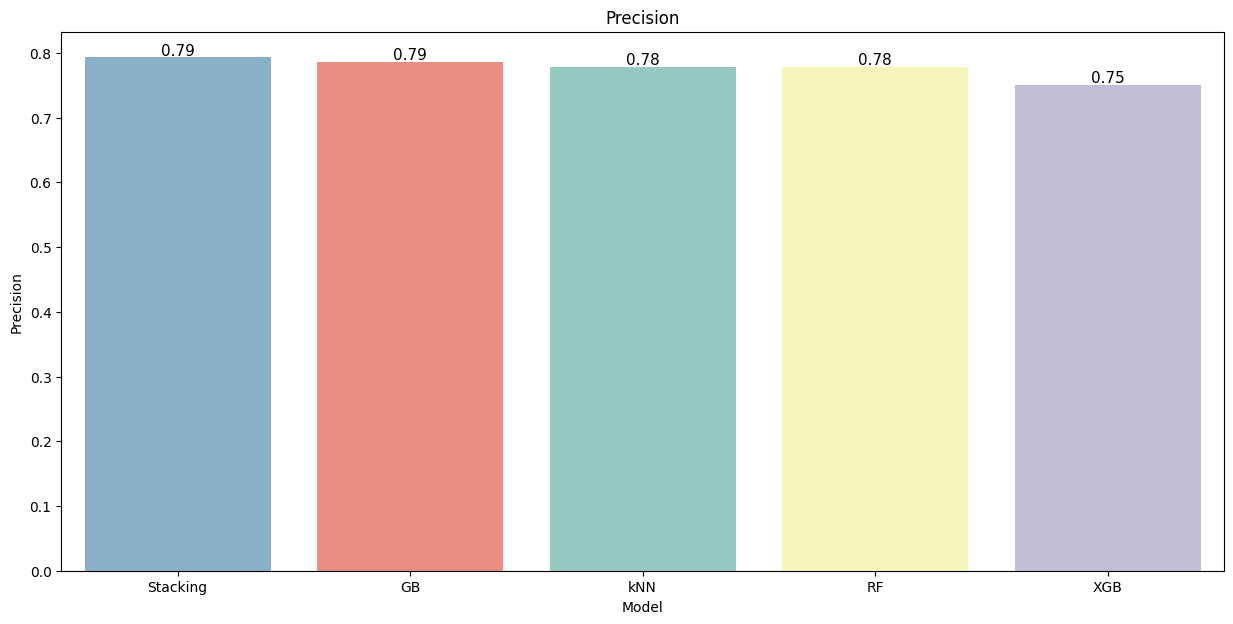

In [ ]:
plt.figure(figsize = (15, 7))

colors = sns.color_palette('Set3', n_colors = len(models))
models['Color'] = colors

models = models.sort_values(by = 'Score', ascending = False)

ax = sns.barplot(x = 'Model', y = 'Score', data = models, palette = models['Color'].tolist())

for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 11, color = 'black', xytext = (0, 5), textcoords = 'offset points')

plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision')
plt.show()

## Confusion Matrix

In [ ]:
conf_mat = {
      'kNN': [knn_decrypted_conf_matrix],
      'Random Forest': [rfc_decrypted_conf_matrix],
      'Gradient Boosting': [gb_decrypted_conf_matrix],
      'XGBoost': [xgb_decrypted_conf_matrix],
      'Stacking': [stack_decrypted_conf_matrix]
}

df_conf_mat = pd.DataFrame(conf_mat)
df_conf_mat

kNN       Random Forest   Gradient Boosting  \
0  [[14, 6], [3, 21]]  [[14, 6], [3, 21]]  [[14, 6], [2, 22]]   

              XGBoost            Stacking  
0  [[13, 7], [3, 21]]  [[15, 5], [2, 22]]

In [ ]:
!pip install tenseal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 14.4 MB/s eta 0:00:00


In [ ]:
import tenseal as ts
import numpy as np

def encrypt_data(data, context):
  encrypted_data = [ts.CKKSVector(context, np.array(row), scale = 2**40) for row in data]
  return encrypted_data

In [ ]:
context = ts.Context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree = 8192,
    coeff_mod_bit_sizes = [60, 40, 40 , 60]
)

In [ ]:
y_train_array = y_train.to_numpy().reshape(-1, 1)
y_val_array = y_val.to_numpy().reshape(-1, 1)
y_test_array = y_test.to_numpy().reshape(-1, 1)

In [ ]:
X_train_encrypted = encrypt_data(X_train.tolist(), context)
y_train_encrypted = encrypt_data(y_train_array.tolist(), context)
X_val_encrypted = encrypt_data(X_val.tolist(), context)
y_val_encrypted = encrypt_data(y_val_array.tolist(), context)
X_test_encrypted = encrypt_data(X_test.tolist(), context)
y_test_encrypted = encrypt_data(y_test_array.tolist(), context)

In [ ]:
X_train_encrypted[0]

In [ ]:
X_train_plain = np.array([vec.decrypt() for vec in X_train_encrypted])
y_train_plain = np.array([vec.decrypt() for vec in y_train_encrypted])

In [ ]:
X_train_plain[0]

array([ 0.67964229,  0.31253248, -0.16659492, -0.36696953,  0.52199145,
        0.45451323,  0.25093851, -0.38933974])

In [ ]:
y_train_discrete = np.round(y_train_plain)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

gb_encrypted_model = GradientBoostingClassifier(learning_rate = 0.004,
                                             max_depth = 83,
                                             max_features = 'log2',
                                             min_samples_leaf = 4,
                                             min_samples_split = 10,
                                             n_estimators = 300)
gb_encrypted_model = gb_encrypted_model.fit(X_train_plain, y_train_discrete)
y_pred = gb_encrypted_model.predict(X_test_encrypted)

gb_encrypted_train_acc = accuracy_score(y_train_encrypted, gb_encrypted_model.predict(X_train_encrypted))
gb_encrypted_test_acc = accuracy_score(y_test_encrypted, y_pred)
gb_encrypted_train_prec = precision_score(y_train_encrypted, gb_encrypted_model.predict(X_train_encrypted))
gb_encrypted_test_prec = precision_score(y_test_encrypted, y_pred)
gb_encrypted_train_rec = recall_score(y_train_encrypted, gb_encrypted_model.predict(X_train_encrypted))
gb_encrypted_test_rec = recall_score(y_test_encrypted, y_pred)
gb_encrypted_train_f1 = f1_score(y_train_encrypted, gb_encrypted_model.predict(X_train_encrypted))
gb_encrypted_test_f1 = f1_score(y_test_encrypted, y_pred)

gb_encrypted_conf_matrix = confusion_matrix(y_test_encrypted, y_pred)
gb_encrypted_patient_accuracies_encrypted = gb_encrypted_conf_matrix.diagonal() / gb_encrypted_conf_matrix.sum(axis = 1)
for i, acc in enumerate(gb_encrypted_patient_accuracies_encrypted):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

gb_encrypted_average_patient_accuracy = gb_encrypted_patient_accuracies_encrypted.mean()
print(f'Average Patient-Level Accuracy: {gb_encrypted_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test_encrypted, y_pred))
print(f'Training acc: {gb_encrypted_train_acc:.2%} | Testing acc: {gb_encrypted_test_acc:.2%}')
print(f'Training precision: {gb_encrypted_train_prec:.2%} | Testing precision: {gb_encrypted_test_prec:.2%}')
print(f'Training recall: {gb_encrypted_train_rec:.2%} | Testing recall: {gb_encrypted_test_rec:.2%}')
print(f'Training F1 score: {gb_encrypted_train_f1:.2%} | Testing F1 score: {gb_encrypted_test_f1:.2%}')
confusion_matrix(y_test_encrypted, y_pred)

TypeError: float() argument must be a string or a real number, not 'CKKSVector'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_encrypted_model = RandomForestClassifier(bootstrap = True,
                                          max_depth = 70,
                                          max_features = 'auto',
                                          min_samples_leaf = 1,
                                          min_samples_split = 5,
                                          n_estimators = 1200)
rfc_encrypted_model = rfc_encrypted_model.fit(X_train_encrypted, y_train_encrypted)
y_pred = rfc_encrypted_model.predict(X_test_encrypted)

rfc_encrypted_train_acc = accuracy_score(y_train_encrypted, rfc_encrypted_model.predict(X_train_decrypted))
rfc_encrypted_test_acc = accuracy_score(y_test_encrypted, y_pred)
rfc_encrypted_train_prec = precision_score(y_train_encrypted, rfc_encrypted_model.predict(X_train_decrypted))
rfc_encrypted_test_prec = precision_score(y_test_encrypted, y_pred)
rfc_encrypted_train_rec = recall_score(y_train_encrypted, rfc_encrypted_model.predict(X_train_decrypted))
rfc_encrypted_test_rec = recall_score(y_test_encrypted, y_pred)
rfc_encrypted_train_f1 = f1_score(y_train_encrypted, rfc_encrypted_model.predict(X_train_decrypted))
rfc_encrypted_test_f1 = f1_score(y_test_encrypted, y_pred)

rfc_encrypted_conf_matrix = confusion_matrix(y_test_encrypted, y_pred)
rfc_encrypted_patient_accuracies_decrypted = rfc_encrypted_conf_matrix.diagonal() / rfc_decrypted_conf_matrix.sum(axis = 1)
for i, acc in enumerate(rfc_encrypted_patient_accuracies_encrypted):
  print(f'Patient {i+1} Accuracy: {acc:.2%}')

rfc_encrypted_average_patient_accuracy = rfc_encrypted_patient_accuracies_encrypted.mean()
print(f'Average Patient-Level Accuracy: {rfc_encrypted_average_patient_accuracy:.2%}')

print('\n',classification_report(y_test_encrypted, y_pred))
print(f'Training acc: {rfc_encrypted_train_acc:.2%} | Testing acc: {rfc_encrypted_test_acc:.2%}')
print(f'Training precision: {rfc_encrypted_train_prec:.2%} | Testing precision: {rfc_encrypted_test_prec:.2%}')
print(f'Training recall: {rfc_encrypted_train_rec:.2%} | Testing recall: {rfc_encrypted_test_rec:.2%}')
print(f'Training F1 score: {rfc_encrypted_train_f1:.2%} | Testing F1 score: {rfc_encrypted_test_f1:.2%}')
confusion_matrix(y_test_encrypted, y_pred)

TypeError: float() argument must be a string or a real number, not 'CKKSVector'